In [1]:
import os
from os import listdir
from os.path import isfile, join
import warnings

import numpy
import pandas as pd
import pandas as SignalTraces_pd
import pandas as Trial_Type_pd
import pandas as Summary_Trial_pd
import pandas as Summary_Cells_pd
import pandas as Perm_Table_pd
import pandas as Perm_Table_Count_pd
import pandas as Motion_pd

from collections import defaultdict
from collections import OrderedDict

# TimeStamps
import matplotlib.pyplot as plt_perievent_traces
import matplotlib.pyplot as plt_trial
import matplotlib.pyplot as plt_Check_Alighnment 
import matplotlib.pyplot as plt

# neurons
import matplotlib.pyplot as plt_raw
import matplotlib.pyplot as plt_norm_raw
import matplotlib.pyplot as plt_norm_deconv
import matplotlib.pyplot as plt_scaled
import matplotlib.pyplot as plt_Binary
import matplotlib.pyplot as plt_Heat_raw
import matplotlib.pyplot as plt_Heat_scaled
import matplotlib.pyplot as plt_Heat_Binary

import matplotlib.pyplot as plt_Perievent_One
import matplotlib.pyplot as plt_perievent_traces
from mpl_toolkits.axes_grid1 import make_axes_locatable
import dataframe_image as dfi #. save table 

import numpy as np
import statistics
import colorsys

from mlxtend.evaluate import permutation_test

In [2]:
##################
#Global_Bin_size = 20
Global_Bin_size = 2
##################


File_Path =  '/Users/kang/Desktop/P5_5_Water_Sucrose/filtered_cells_water/filtered_behav_added-DS12-P5_5-S6-Water'
Save_Path = '/Users/kang/Desktop/P5_5_Water_Sucrose/filtered_cells_water/filtered_behav_added-DS12-P5_5-S6-Water'
File_Name = 'filtered_behav_added-DS12-P5_5-S6-Water.csv'
Motion_File_Name ='5_2022-10-08_13-37-08-Ka-DS12-P5_5-S6-Water_Completed_For_Imaging_Align_w_Whole_Step4.csv'

# File_Path =  '/Users/kang/Desktop/filtered_cells_water/filtered_behav_added-DS16-P5_5-S11-Water'
# Save_Path = '/Users/kang/Desktop/filtered_cells_water/filtered_behav_added-DS16-P5_5-S11-Water'
# File_Name = 'filtered_behav_added-DS16-P5_5-S11-Water.csv'
# Motion_File_Name ='5_2022-10-18_16-24-22-Ka-DS16-P5_5-S11-Water_Completed_For_Imaging_Align_w_Whole_Step4.csv'

# File_Path =  '/Users/kang/Desktop/filtered_cells_water/filtered_behav_added-DS18-P5_5-S6-Water'
# Save_Path = '/Users/kang/Desktop/filtered_cells_water/filtered_behav_added-DS18-P5_5-S6-Water'
# File_Name = 'filtered_behav_added-DS18-P5_5-S6-Water.csv'
# Motion_File_Name ='5_2022-10-02_16-04-24-Ka-DS18-P5_5-S6-Water_Completed_For_Imaging_Align_w_Whole_Step4.csv'

Temp_Motion_df = Motion_pd.read_csv((File_Path+'/'+ Motion_File_Name), low_memory=False)
print(Temp_Motion_df)

            Motion  Light_1  Light_2  Light_3  \
0       920.440104        1        1        0   
1      1818.070544        1        1        0   
2      1873.616725        1        1        0   
3      2295.901276        1        1        0   
4      2429.440029        1        1        0   
...            ...      ...      ...      ...   
47996     0.000000        1        0        0   
47997     0.003295        1        0        0   
47998     0.000000        1        0        0   
47999     0.000000        1        0        0   
48000     0.005662        1        0        0   

      original_video_coor, cropped_video_coor, cropped_video_area,  x0, x1, y0, y1 (crop coordinate)  \
0                                             (360, 640)                                               
1                                             (143, 237)                                               
2                                                  33891                                           

In [3]:
df = pd.read_csv((File_Path+'/'+File_Name), index_col=0, low_memory=False)

NumofCell_raw = 0
CellList_raw = []
for x in range(len(df.columns)):
    if((df.columns[x]).isnumeric()):     #. Detects cell by number heading (raw calcium trace)
        NumofCell_raw = NumofCell_raw+1
        CellList_raw.append(df.columns[x])
print('NumofCell_raw = ',NumofCell_raw )
print('CellList_raw =', CellList_raw)
print('\n')



NumofCell_deconv = 0
CellList_deconv = []
for x in range(len(df.columns)):
    if('deconv_' in (df.columns[x])):     #. Detects cell by containing string (deconvoluted calcium spike)
        NumofCell_deconv = NumofCell_deconv+1
        CellList_deconv.append(df.columns[x])
print('NumofCell_deconv = ',NumofCell_deconv )
print('CellList_deconv =', CellList_deconv)

NumofCell_raw =  29
CellList_raw = ['3', '5', '6', '7', '8', '9', '10', '27', '29', '32', '33', '35', '36', '37', '38', '39', '41', '43', '44', '45', '47', '49', '60', '62', '63', '65', '67', '68', '69']


NumofCell_deconv =  29
CellList_deconv = ['deconv_3', 'deconv_5', 'deconv_6', 'deconv_7', 'deconv_8', 'deconv_9', 'deconv_10', 'deconv_27', 'deconv_29', 'deconv_32', 'deconv_33', 'deconv_35', 'deconv_36', 'deconv_37', 'deconv_38', 'deconv_39', 'deconv_41', 'deconv_43', 'deconv_44', 'deconv_45', 'deconv_47', 'deconv_49', 'deconv_60', 'deconv_62', 'deconv_63', 'deconv_65', 'deconv_67', 'deconv_68', 'deconv_69']


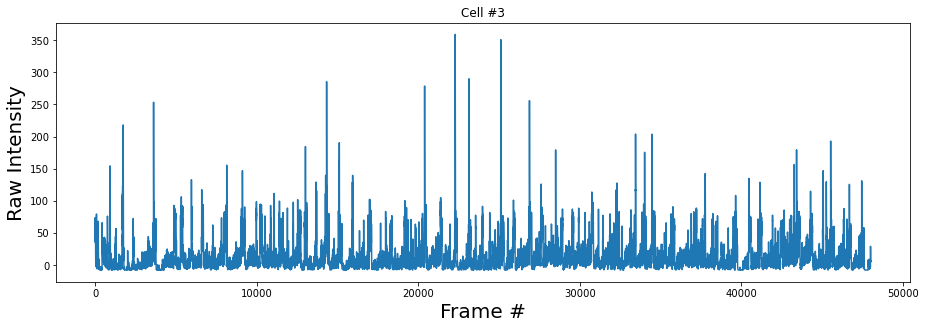

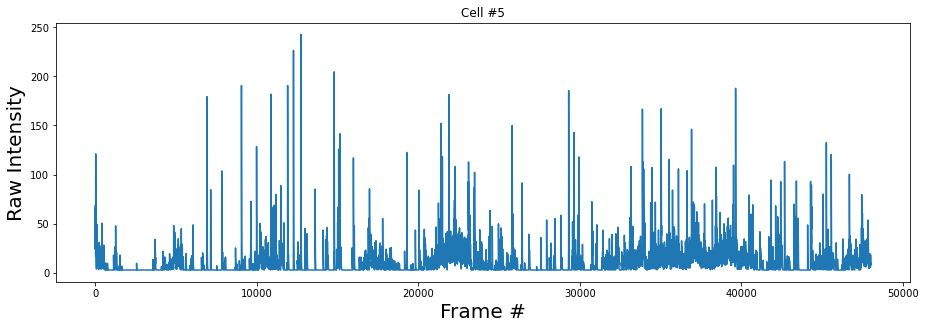

In [4]:
# Plot Individual Traces 

#for x in range(NumofCell_raw):
for x in range(2):
    plt_raw.plot(df[CellList_raw[x]])
    plt_raw.subplots_adjust(bottom=0.1, right=2.1, top=1)
    plt_raw.ylabel('Raw Intensity', size = 20)
    plt_raw.xlabel('Frame #', size = 20)
    plt_raw.title(('Cell #' + CellList_raw[x]), fontdict=None, loc='center')
    plt_raw.show()


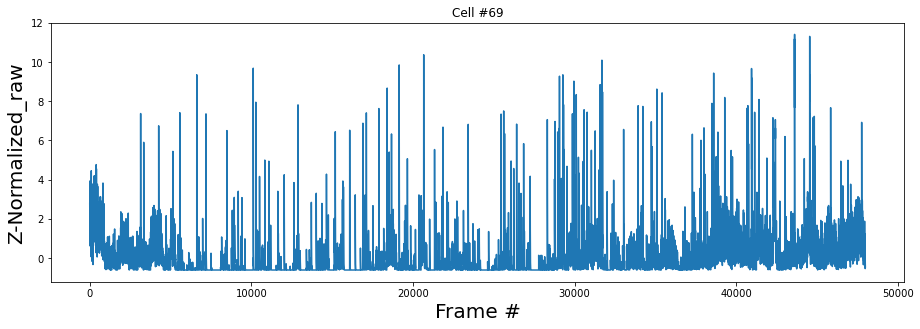

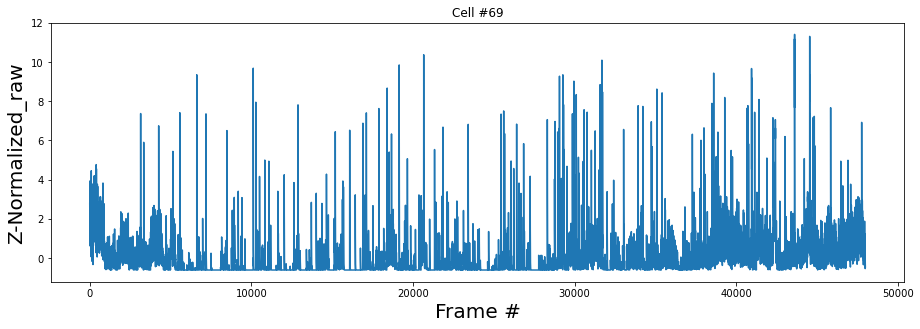

In [5]:
# Z-Normalized_raw Traces
# Individual Waveform
zNormalized_raw = df.copy()
for x in range(NumofCell_raw):
    zNormalized_raw[CellList_raw[x]] = (df[CellList_raw[x]]-np.mean(df[CellList_raw[x]]))/statistics.stdev(df[CellList_raw[x]])
#for x in range(NumofCell_raw):
for i in range(2):
    plt_norm_raw.plot(zNormalized_raw[CellList_raw[x]])
    plt_norm_raw.subplots_adjust(bottom=0.1, right=2.1, top=1)
    plt_norm_raw.ylabel('Z-Normalized_raw', size = 20)
    plt_norm_raw.xlabel('Frame #', size = 20)
    plt_norm_raw.title(('Cell #' + CellList_raw[x]), fontdict=None, loc='center')
    plt_norm_raw.show()
    
for x in range(NumofCell_raw):
    df[('zNormalized_raw_Cell_'+ CellList_raw[x])]= zNormalized_raw[CellList_raw[x]]    # Export this to df dataframe

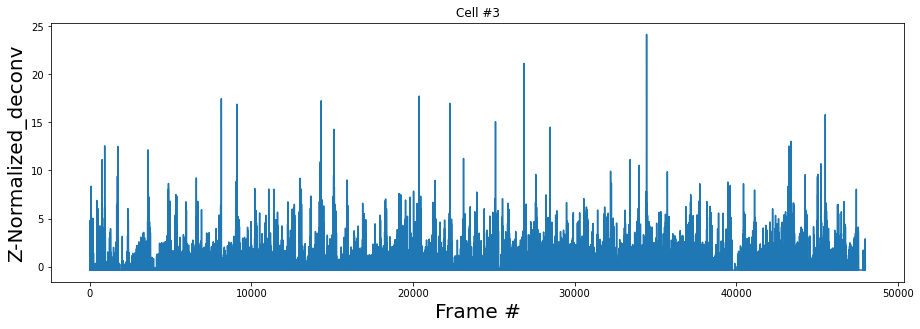

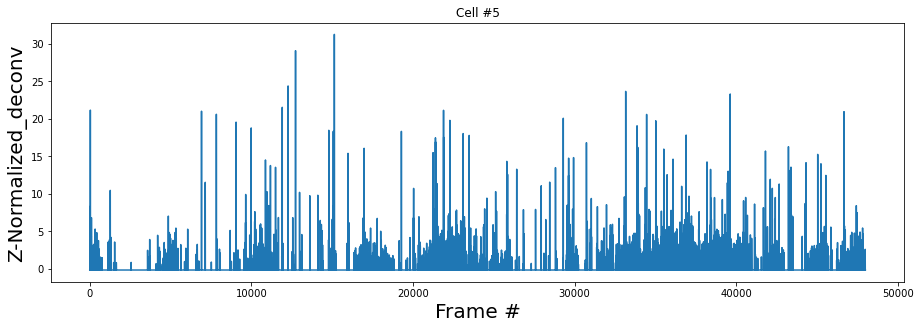

In [6]:
# Z-Normalized_deconv Traces
# Individual Waveform
zNormalized_deconv = df.copy()
for x in range(NumofCell_deconv):
    zNormalized_deconv[CellList_deconv[x]] = (df[CellList_deconv[x]]-np.mean(df[CellList_deconv[x]]))/statistics.stdev(df[CellList_deconv[x]])
#for x in range(NumofCell_deconv):
for x in range(2):
    plt_norm_deconv.plot(zNormalized_deconv[CellList_deconv[x]])
    plt_norm_deconv.subplots_adjust(bottom=0.1, right=2.1, top=1)
    plt_norm_deconv.ylabel('Z-Normalized_deconv', size = 20)
    plt_norm_deconv.xlabel('Frame #', size = 20)
    plt_norm_deconv.title(('Cell #' + CellList_raw[x]), fontdict=None, loc='center')
    plt_norm_deconv.show()
    
for x in range(NumofCell_deconv):
    df[('zNormalized_deconv_Cell_'+ CellList_deconv[x])]= zNormalized_deconv[CellList_deconv[x]]    # Export this to df dataframe
    

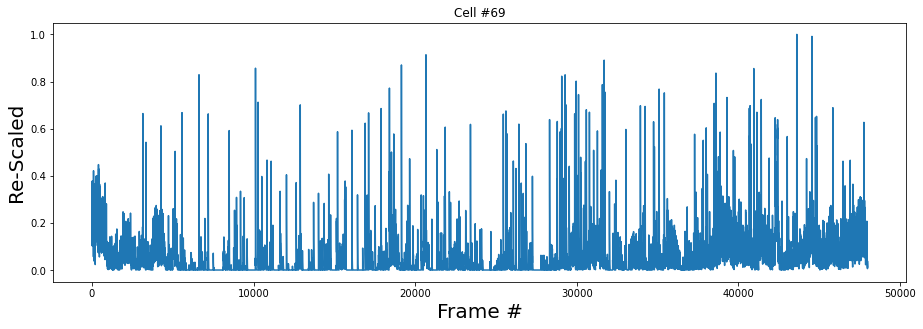

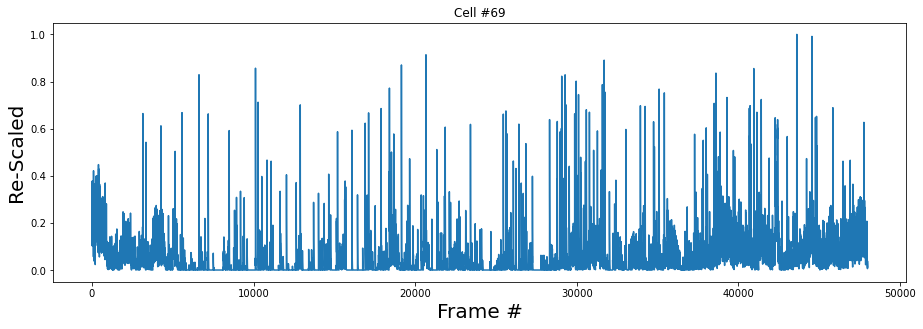

In [7]:
# Re-Scale Traces so it ranges from 0 to 1 based on maximum amplitude of each trace
# Individual Waveform
#ReScaled = df.copy()
ReScaled =pd.DataFrame()

for x in range(NumofCell_raw):
    #ReScaled[CellList[x]] = (df[CellList[x]]/np.max(df[CellList[x]]))    #delete me, incorrect
    ReScaled[CellList_raw[x]] = (df[CellList_raw[x]]-np.min(df[CellList_raw[x]]))/(np.max(df[CellList_raw[x]]) - np.min(df[CellList_raw[x]]))
#for x in range(NumofCell_raw):
for i in range(2):
    plt_scaled.plot(ReScaled[CellList_raw[x]])
    plt_scaled.subplots_adjust(bottom=0.1, right=2.1, top=1)
    plt_scaled.ylabel('Re-Scaled', size = 20)
    plt_scaled.xlabel('Frame #', size = 20)
    plt_scaled.title(('Cell #' + CellList_raw[x]), fontdict=None, loc='center')
    plt_scaled.show()

    
# print(np.max(ReScaled))
# print(np.min(ReScaled))

for x in range(NumofCell_raw):
    df[('ReScaled_Cell_'+ CellList_raw[x])]= ReScaled[CellList_raw[x]]    # Export this to df dataframe

##################################
# Calculates mean across cell 

Mean_of_All_Cells_Rescaled_df = ReScaled.iloc[:,0:NumofCell_raw].mean(axis=1)  
df['Mean_of_All_Cells_Rescaled_df']= Mean_of_All_Cells_Rescaled_df    # Export this to df dataframe

##################################
# Calculates median across cell 
Median_of_All_Cells_Rescaled_df = ReScaled.iloc[:,0:NumofCell_raw].median(axis=1)  
df['Median_of_All_Cells_Rescaled_df']= Median_of_All_Cells_Rescaled_df    # Export this to df dataframe





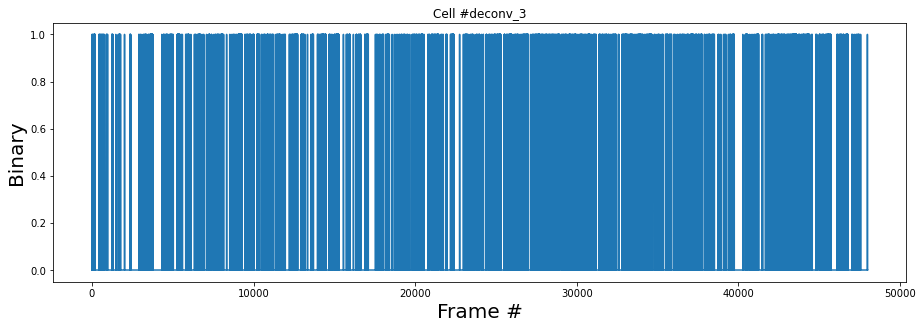

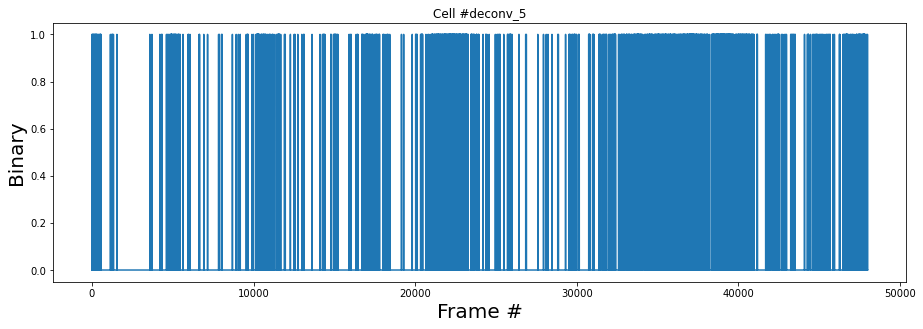

Bin                                48000.000000
time                                2400.000000
3                                    359.053440
5                                    242.700290
6                                    247.405750
                                       ...     
ReScaled_Cell_67                       1.000000
ReScaled_Cell_68                       1.000000
ReScaled_Cell_69                       1.000000
Mean_of_All_Cells_Rescaled_df          0.319017
Median_of_All_Cells_Rescaled_df        0.250527
Length: 160, dtype: float64
Bin                                0.000000
time                               0.000000
3                                 -7.802822
5                                  2.837336
6                                  0.902668
                                     ...   
ReScaled_Cell_67                   0.000000
ReScaled_Cell_68                   0.000000
ReScaled_Cell_69                   0.000000
Mean_of_All_Cells_Rescaled_df      0.005434
Medi

/Users/kang/opt/anaconda3/envs/Ca_Imaging/lib/python3.8/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)
/var/folders/2c/qcjtsn_j1xngx_g__j1y_rn00000gn/T/ipykernel_19478/1215431849.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[('Binary_Cell_'+ CellList_deconv[x])]= Binary[CellList_deconv[x]]    # Export this to df dataframe


In [8]:
# Binary Traces so it is either 0 or 1 
# Individual Waveform
Binary = df.copy()
# New lab convention to use 2 std as a threshold for event detection (based on overall event rate)
Binary_Threshold = 2  # anything larger than 2 will be coded as one, anything else is coded as 0.  

########## This approach takes too long to run
# for x in range(NumofCell):
#     for i in range(len(Binary[CellList[x]])):
#         if(df[CellList[x]][i] > 0):
#             Binary[CellList[x]][i] = 1
#         else:
#             Binary[CellList[x]][i] = 0


for x in range(NumofCell_deconv):
    #Binary[CellList_deconv[x]] = np.where(Binary[CellList_deconv[x]] > Binary_Threshold, 1, 0)
    Binary[CellList_deconv[x]] = np.where(zNormalized_deconv[CellList_deconv[x]] >= Binary_Threshold, 1, 0)

#for x in range(NumofCell_deconv):
for x in range(2):
    plt_Binary.plot(Binary[CellList_deconv[x]])
    plt_Binary.subplots_adjust(bottom=0.1, right=2.1, top=1)
    plt_Binary.ylabel('Binary', size = 20)
    plt_Binary.xlabel('Frame #', size = 20)
    plt_Binary.title(('Cell #' + CellList_deconv[x]), fontdict=None, loc='center')
    plt_Binary.show()

    
print(np.max(Binary))
print(np.min(Binary))

for x in range(NumofCell_deconv):
    df[('Binary_Cell_'+ CellList_deconv[x])]= Binary[CellList_deconv[x]]    # Export this to df dataframe
 

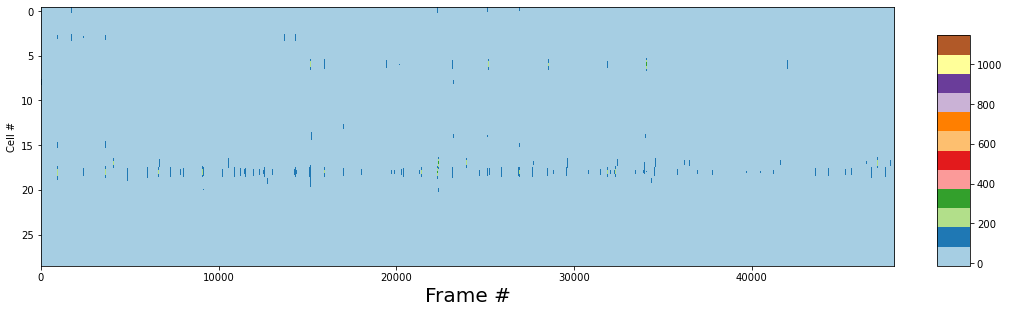

In [9]:
# Plot Raw Traces 

TransRawTraces = np.transpose(df.loc[0:len(df), CellList_raw])
plt_Heat_raw.imshow(TransRawTraces, cmap=plt_Heat_raw.cm.Paired, aspect = 'auto')
plt_Heat_raw.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_Heat_raw.xlabel('Frame #', size = 20)
plt_Heat_raw.ylabel(('Cell #'), fontdict=None, loc='center')

# Color axis
cax = plt_Heat_raw.axes([2.2, 0.1, 0.075, 0.8])
plt_Heat_raw.colorbar(cax=cax)

plt_Heat_raw.show()


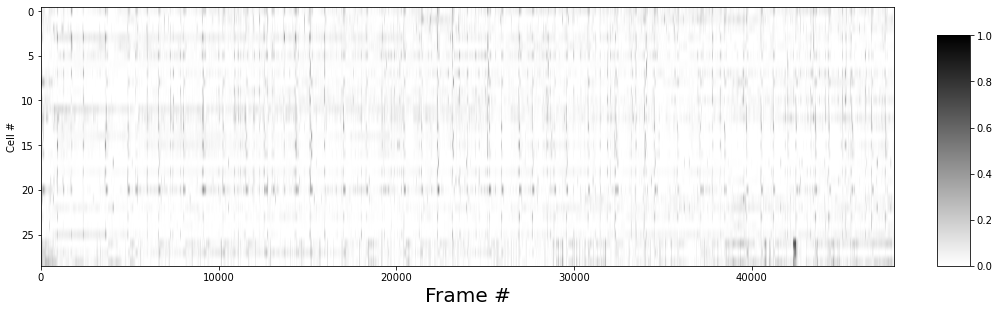

In [10]:
# Plot Scaled Traces,  Full Range (0 to 1)
TransScaledTraces = np.transpose(ReScaled.loc[0:len(ReScaled), CellList_raw])
plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_yarg, aspect = 'auto')
#plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_rainbow_r, aspect = 'auto')
plt_Heat_scaled.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_Heat_scaled.xlabel('Frame #', size = 20)
plt_Heat_scaled.ylabel(('Cell #'), fontdict=None, loc='center')
# Color axis
cax = plt_Heat_scaled.axes([2.2, 0.1, 0.075, 0.8])
plt_Heat_scaled.colorbar(cax=cax)
plt_Heat_scaled.show()

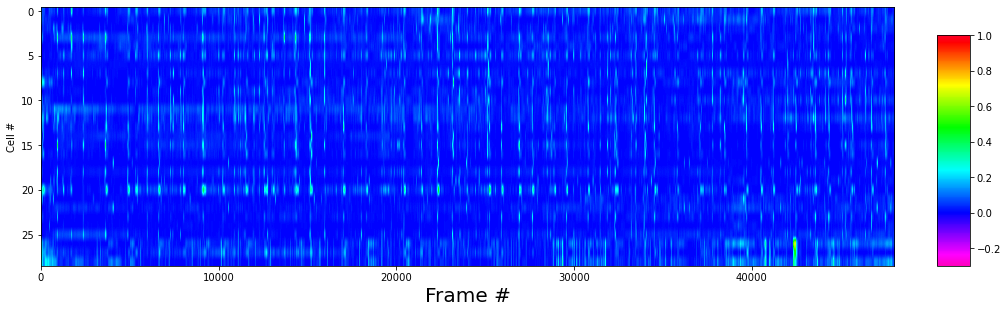

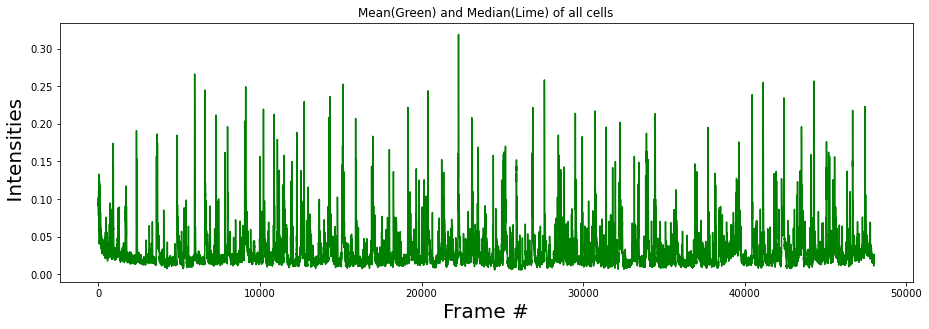

In [11]:
# Plot Scaled Traces,  Full Range (0 to 1), log scale
TransScaledTraces = np.transpose(ReScaled.loc[0:len(ReScaled), CellList_raw])
#plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_yarg, aspect = 'auto')
plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_rainbow_r, aspect = 'auto')
plt_Heat_scaled.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_Heat_scaled.xlabel('Frame #', size = 20)
plt_Heat_scaled.ylabel(('Cell #'), fontdict=None, loc='center')
# Color axis
cax = plt_Heat_scaled.axes([2.2, 0.1, 0.075, 0.8])
#plt_Heat_scaled.yscale('log')
plt_Heat_scaled.clim(-0.3, 1)###############################################################  Set Range for Color
plt_Heat_scaled.colorbar(cax=cax)
plt_Heat_scaled.show()

#. Plot Re-Scaled traces that are averages and median of all cells
plt_scaled.plot(df['Mean_of_All_Cells_Rescaled_df'],'g')
#plt_scaled.plot(df['Median_of_All_Cells_Rescaled_df'],'lime')
plt_scaled.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_scaled.ylabel(' Intensities', size = 20)
plt_scaled.xlabel('Frame #', size = 20)
plt_scaled.title('Mean(Green) and Median(Lime) of all cells', fontdict=None, loc='center')
plt_scaled.show()

    
# # print(np.max(ReScaled))
# # print(np.min(ReScaled))

# for x in range(NumofCell_raw):
#     df[('ReScaled_Cell_'+ CellList_raw[x])]= ReScaled[CellList_raw[x]]    # Export this to df dataframe

# ##################################


/var/folders/2c/qcjtsn_j1xngx_g__j1y_rn00000gn/T/ipykernel_19478/3920712148.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ReScaled_Mean_of_All_Cells_Rescaled_df'] = df['Mean_of_All_Cells_Rescaled_df']/max(df['Mean_of_All_Cells_Rescaled_df'])
/var/folders/2c/qcjtsn_j1xngx_g__j1y_rn00000gn/T/ipykernel_19478/3920712148.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ReScaled_Median_of_All_Cells_Rescaled_df'] = df['Median_of_All_Cells_Rescaled_df']/max(df['Median_of_All_Cells_Rescaled_df'])


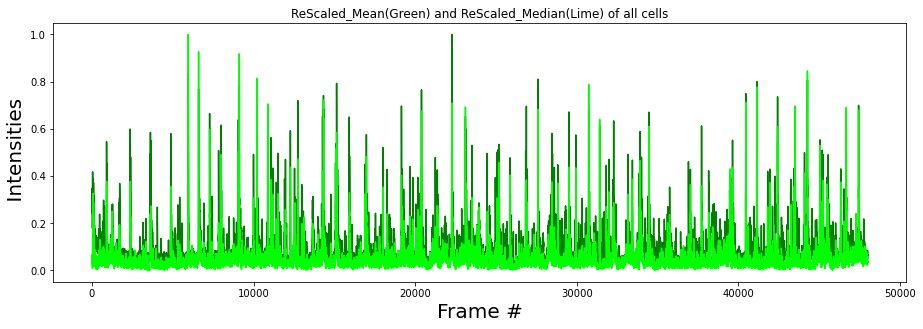

In [12]:
df['ReScaled_Mean_of_All_Cells_Rescaled_df'] = df['Mean_of_All_Cells_Rescaled_df']/max(df['Mean_of_All_Cells_Rescaled_df'])
df['ReScaled_Median_of_All_Cells_Rescaled_df'] = df['Median_of_All_Cells_Rescaled_df']/max(df['Median_of_All_Cells_Rescaled_df'])

plt_scaled.plot(df['ReScaled_Mean_of_All_Cells_Rescaled_df'],'g')
plt_scaled.plot(df['ReScaled_Median_of_All_Cells_Rescaled_df'], 'lime')
plt_scaled.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_scaled.ylabel(' Intensities', size = 20)
plt_scaled.xlabel('Frame #', size = 20)
plt_scaled.title('ReScaled_Mean(Green) and ReScaled_Median(Lime) of all cells', fontdict=None, loc='center')
plt_scaled.show()

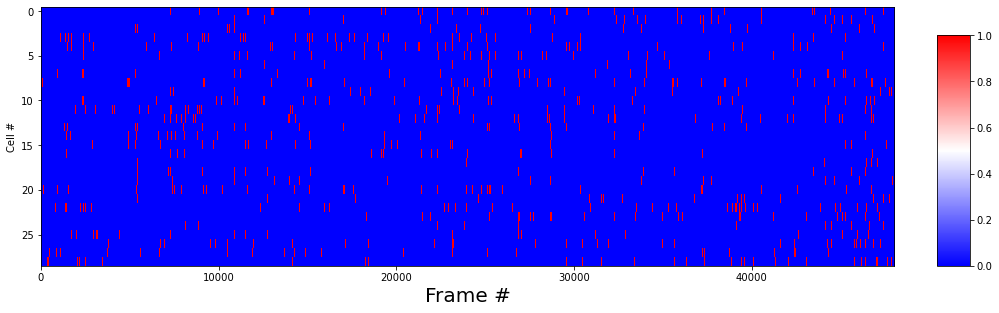

In [13]:
# Plot Binary Traces,  Full Range (0 to 1), log scale
TransBinaryTraces = np.transpose(Binary.loc[0:len(Binary), CellList_deconv])

#plt_Heat_Binary.imshow(TransBinaryTraces, cmap=plt_Heat_scaled.cm.gist_rainbow_r, aspect = 'auto')
plt_Heat_Binary.imshow(TransBinaryTraces, interpolation = 'none', cmap=plt_Heat_scaled.cm.bwr, aspect = 'auto')
#plt_Heat_Binary.xlim(0, 100)

plt_Heat_Binary.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_Heat_Binary.xlabel('Frame #', size = 20)
plt_Heat_Binary.ylabel(('Cell #'), fontdict=None, loc='center')
# Color axis
cax = plt_Heat_Binary.axes([2.2, 0.1, 0.075, 0.8])
#plt_Heat_scaled.yscale('log')
plt_Heat_Binary.clim(0, 1)###############################################################  Set Range for Color
plt_Heat_Binary.colorbar(cax=cax)


plt_Heat_Binary.show()

Deconv_Rate_Thrsld_0:  [2.1314498476684034]


Avg_z-Norm_Rate [1.9130923278178829, 0.9620345553145804, 0.5065555387136331, 0.29002269349273607, 0.18505361598070158, 0.12864674514683241, 0.09550088396146918, 0.07519958276731303, 0.06081769848185633, 0.04963977043581707, 0.040918687757223446]


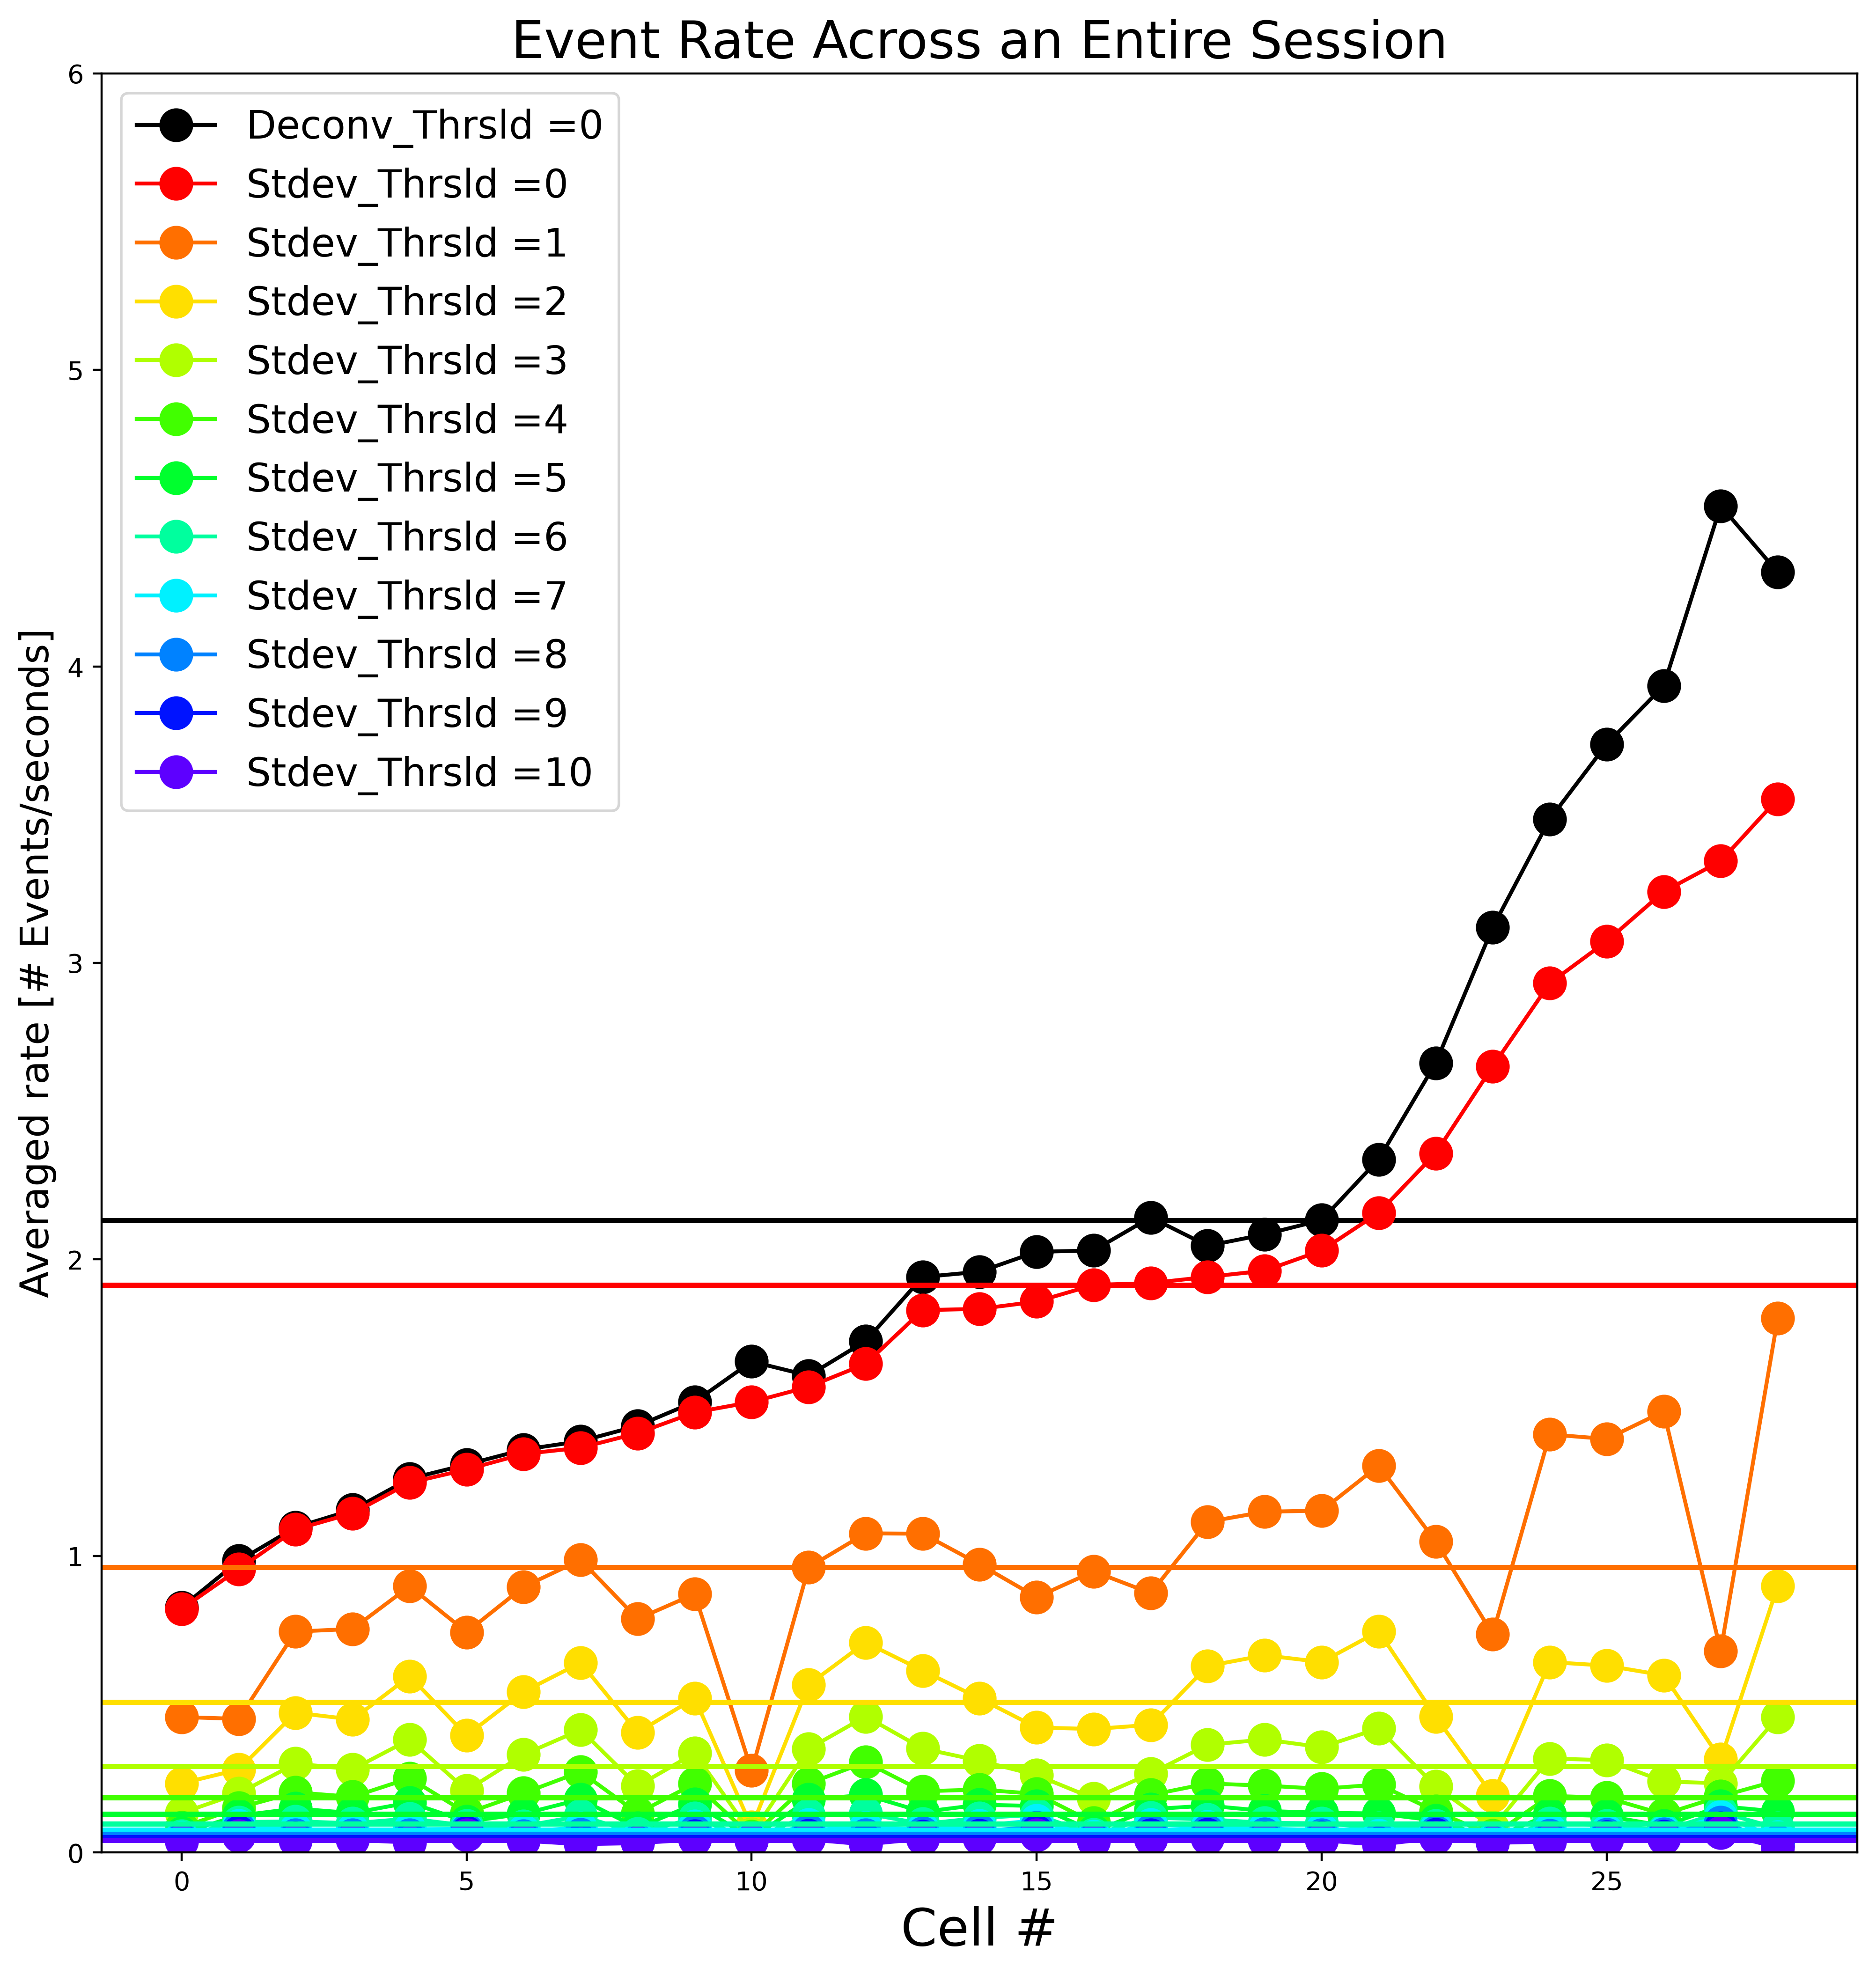

In [14]:
#.  Event Rate as with respect with different standard deviation threshold (after zNormalizing Deconvoluted signal )


#####################################################################################################
#. Re-order cell list to asending orders of event rate at stdev = 0 
Cell_Event_Total_at_stdev_zero =  defaultdict(list)

for ii in range(NumofCell_deconv):
    count_Event_cell = len(zNormalized_deconv[zNormalized_deconv[CellList_deconv[ii]]  > 0 ]) 
    Cell_Event_Total_at_stdev_zero[CellList_deconv[ii]].append(count_Event_cell)

ReOrdered_Cell_Event_Total_at_stdev_zero = dict(sorted(Cell_Event_Total_at_stdev_zero.items(), key=lambda item: item[1]))

CellList_ReOrdered_Cell_Event_Total_at_stdev_zero = list(ReOrdered_Cell_Event_Total_at_stdev_zero.keys())



# verify that deconv at zero threshold is same as z-normalized at zero threshold
temp_deconv_sum = 0
temp_znorm_sum = 0

temp_deconv_Rate = defaultdict(list)
temp_znorm_Rate = defaultdict(list)

#deconv at zero threshold 
for ii in range(NumofCell_deconv):

    len_cell = len(df[CellList_deconv[ii]] )
    count_Event_cell = len(df[df[CellList_deconv[ii]]  > 0 ]) # count # of items > 4 

    temp_deconv_sum = temp_deconv_sum +(count_Event_cell/(len_cell/20))    #. 20 is sample rate per second, sum the event count for all cells in each stdev_threshold

    temp_deconv_Rate[CellList_deconv[ii]].append(count_Event_cell/(len_cell/20))   #20 is sample rate per second

temp_deconv_Rate['Avg'].append(temp_deconv_sum/NumofCell_deconv)


#z-normalize threshold zero
for ii in range(NumofCell_deconv):

    len_cell = len(zNormalized_deconv[CellList_deconv[ii]] )
    count_Event_cell = len(zNormalized_deconv[zNormalized_deconv[CellList_deconv[ii]]  > 0 ]) # count # of items > 4 

    temp_znorm_sum = temp_znorm_sum +(count_Event_cell/(len_cell/20))    #. 20 is sample rate per second, sum the event count for all cells in each stdev_threshold

    temp_znorm_Rate[CellList_deconv[ii]].append(count_Event_cell/(len_cell/20))   #20 is sample rate per second
    
temp_znorm_Rate['Avg'].append(temp_znorm_sum/NumofCell_deconv)
    

y_deconv_Rate =[]
y_znorm_Rate =[]

for ii in range(NumofCell_deconv):
    #y_One_values.append(Overall_Rate[CellList_deconv[ii]][i])   # Original Cell order
    y_deconv_Rate.append(temp_deconv_Rate[CellList_ReOrdered_Cell_Event_Total_at_stdev_zero[ii]][0])  # Asending order
    
for ii in range(NumofCell_deconv):
    y_znorm_Rate.append(temp_znorm_Rate[CellList_ReOrdered_Cell_Event_Total_at_stdev_zero[ii]][0])  # Asending order    


#####################################################################################################
#. Calculate overall event rates for individual cells at different threshold of standard deviations
Stdev_Threshold = [0,1,2,3,4,5,6,7,8,9,10]
Overall_Rate = defaultdict(list)

for i in range(len(Stdev_Threshold)):
    temp_sum = 0
    
    for ii in range(NumofCell_deconv):
       
        len_cell = len(zNormalized_deconv[CellList_deconv[ii]] )
        count_Event_cell = len(zNormalized_deconv[zNormalized_deconv[CellList_deconv[ii]]  > Stdev_Threshold[i] ]) # count # of items > 4 
     
        temp_sum = temp_sum +(count_Event_cell/(len_cell/20))    #. 20 is sample rate per second, sum the event count for all cells in each stdev_threshold
        
        Overall_Rate[CellList_deconv[ii]].append(count_Event_cell/(len_cell/20))   #20 is sample rate per second


    #print(Stdev_Threshold[i])
    Overall_Rate['Threshold'].append(i)
    Overall_Rate['Avg'].append(temp_sum/NumofCell_deconv)
    
#print(Overall_Rate.keys())

#print(Overall_Rate)
# print(Overall_Rate[CellList_deconv[0]])
# print(Overall_Rate[CellList_deconv[0]][2])

#####################################################################################################
#. Plot overall event rates for individual cells at different threshold of standard deviations



x_values = list(range(0,NumofCell_deconv))

fig = plt_raw.figure(figsize =(5, 5), dpi = 400.0)
# plot deconvoluted event rate (not z normalized) at threshold zero  
plt_raw.plot(x_values, y_deconv_Rate, color = 'black', marker='o', markerfacecolor='black' , markersize=12, label = ('Deconv_Thrsld ='+str(0)))
plt_raw.axhline(y=temp_deconv_Rate['Avg'][0], c = 'black', lw=2)


for i in range(len(Stdev_Threshold)):

    y_One_values =[]

    for ii in range(NumofCell_deconv):
        #y_One_values.append(Overall_Rate[CellList_deconv[ii]][i])   # Original Cell order
        y_One_values.append(Overall_Rate[CellList_ReOrdered_Cell_Event_Total_at_stdev_zero[ii]][i])  # Asending order
    
    temp_c = colorsys.hsv_to_rgb(0.8/len(Stdev_Threshold)*i, 1, 1)#. 0 to 0.8 for rainbow color
    plt_raw.plot(x_values, y_One_values, color = temp_c, marker='o', markerfacecolor=temp_c , markersize=12, label = ('Stdev_Thrsld ='+str(i)))



for i in range(len(Stdev_Threshold)):
    temp_c = colorsys.hsv_to_rgb(0.8/len(Stdev_Threshold)*i, 1, 1)#. 0 to 0.8 for rainbow color
    plt_raw.axhline(y=Overall_Rate['Avg'][i], c=temp_c, lw=2)



plt_raw.legend(loc ="upper left", fontsize = 15)
plt_raw.subplots_adjust(bottom=0.1, right=2, top=2)
plt_raw.ylabel('Averaged rate [# Events/seconds]', size = 15)
plt_raw.xlabel('Cell #', size = 20)
plt_raw.title('Event Rate Across an Entire Session', size = 20 )
#plt_raw.xlim(0,5)
plt_raw.ylim(0,6)


print('Deconv_Rate_Thrsld_0: ',temp_deconv_Rate['Avg'])
print('\n')
print('Avg_z-Norm_Rate',Overall_Rate['Avg'])

# print(x)
# print(len(x))

filename =  File_Name.split(".")[0] +'_'+ 'Event_Rate' + '.jpg'
savefilename = os.path.join(Save_Path, filename)
plt_raw.savefig(savefilename, bbox_inches='tight')
    
plt_raw.show()
    

In [15]:
event_code_dict = {
                   '5521' :'Trial_Window_Start', '5520' :'Trial_Window_End', 
                   '4521' :'Trial_Start', '4520' :'Trial_End',
                   '3521' :'Reward_Win_Start', '3520' :'Reward_Win_End',
                   '2521' :'ITI_Start', '2520' :'ITI_End',
                   '0000' : "Trial_Type",
                   '0001' : "Session_Start",
                   '0002' : "Session_End",
                   
                   '0114' :'File_END',
                   
                   '7171': 'L_led_Valid_ON', '7170': 'L_led_Valid_OFF',
                   '8171': 'M_led_Valid_ON', '8170': 'M_led_Valid_OFF',
                   '9171': 'R_led_Valid_ON', '9170': 'R_led_Valid_OFF', 
                   
                   '7271': 'L_sol_Valid_ON', '7270': 'L_sol_Valid_OFF',
                   '8271': 'M_sol_Valid_ON', '8270': 'M_sol_Valid_OFF',
                   '9271': 'R_sol_Valid_ON', '9270': 'R_sol_Valid_OFF',
                   
                   
                   
                   
                   '7071': 'L_Poke_Valid_IN', '7070': 'L_Poke_Valid_OUT',
                   '8071': 'M_Poke_Valid_IN', '8070': 'M_Poke_Valid_OUT',
                   '9071': 'R_Poke_Valid_IN', '9070': 'R_Poke_Valid_OUT', 


                   '7540' :'Left Omission', '8540' :'Middle Omission', '9540' :'Right Omission',
    
    
#                    '5530' :'Poke_In_Delayed_Window_Punishmnet',
#                    '5531' :'No_Poke_In_Delayed_Window_OK',
                   
                   
#                     '7160': 'L_led_Invalid_OFF',
#                     '8160': 'M_led_Invalid_OFF',
#                     '9160': 'R_led_Invalid_OFF',

                   # '7519': 'L_iw',  '7529': 'L_tw',  '7539': 'L_vw', '7559': 'L_delay_w',
                   # '8519': 'M_iw',  '8529': 'M_tw',  '8539': 'M_vw', '8559': 'M_delay_w',
                   # '9519': 'R_iw',  '9529': 'R_tw',  '9539': 'R_vw', '9559': 'R_delay_w',

                   }

In [16]:
# Extract Events from (event_1, event_2, event_3, event_4, event_5)

# Identify Events based on "event_"    
NumofEventColumn = 0
EvenColumnList = []
for xx in range(len(df.columns)):
    if(('event_' in df.columns[xx])):
        NumofEventColumn = NumofEventColumn +1
        EvenColumnList.append(df.columns[xx])
print('NumofEventColumn = ',NumofEventColumn )
print('EvenColumnList =', EvenColumnList)
    

    
    
    
    
##  Counts different kinds of events (Event_Count),  
##. then sorts timestamps with respects to differnet kinds of events (Event_Count_TimeStamps)   
Event_Count_temp = {}
Event_Count = {}  
Event_Count_TimeStamps = defaultdict(list)


########. OPTION 1.  Create Event_Count purly on timestamps found in data###########
######### But Y-axis label looks messy because it's random order ###################################################
# for i in range(NumofEventColumn):  # Goes through all event columns (5 for now)
#     for ii in range (len(df)):
#         Event_Count_temp[list(df[EvenColumnList[i]])[ii]]= 0
        
# # Orders dictionary items, so it is easier to read later on        
# OrderedDict(sorted(Event_Count_temp.items(), key=lambda t: t[1]))        
# Event_Count = Event_Count_temp




####### OPTION 2.  Create Event_Count by using pre-ordered code dictionary######
#########. Y-axis looks cleaner################################################

for i in range (len(event_code_dict)):
        Event_Count[ list(event_code_dict.values())[i] ]= 0

for i in range(NumofEventColumn):  # Goes through all event columns (5 for now)
    for ii in range (len(df)):

        match = 0   
        for iii in range (len(event_code_dict)):
            if(df[EvenColumnList[0]][ii] == list(event_code_dict.values())[iii]):
                match  = 1
        if(match == 0):
            Event_Count[list(df[EvenColumnList[i]])[ii]]= 0
#############################################################################

# initalized Event_Count_TimeStamps so it's the same order as Event_Count,  'None' is addeded as a place holder, will be remove in next few lines
for iii in range(len(Event_Count)):
    Event_Count_TimeStamps[(list(Event_Count.keys())[iii])].append(None)     

#  Count number of Events , and sorting timestamps into Event_Count_Timestamps
for i in range(NumofEventColumn):  # Goes through all event columns (5 for now)
    for ii in range(len(df)):
        for iii in range (len(Event_Count)):
            if(df[EvenColumnList[i]][ii] == list(Event_Count.keys())[iii]):
                Event_Count[list(Event_Count.keys())[iii]] += 1  # add one  to count num of events
                Event_Count_TimeStamps[list(Event_Count.keys())[iii]].append([ii]) 
                
#  Remove 'None' place holder for Event_Count_TimeStamp, whihc is the first value
for i in range(len(Event_Count)):
    del Event_Count_TimeStamps[list(Event_Count_TimeStamps.keys())[i]][0]

    

# go through each Event_Count_Timestamps to sort timestamps from smallest to largest 
for iii in range(len(Event_Count)):
    (Event_Count_TimeStamps[(list(Event_Count.keys())[iii])]).sort()      
    
    
    
# print('\n')
# print(Event_Count)
# print('\n')
# print(Event_Count_TimeStamps)

    


NumofEventColumn =  5
EvenColumnList = ['event_1', 'event_2', 'event_3', 'event_4', 'event_5']


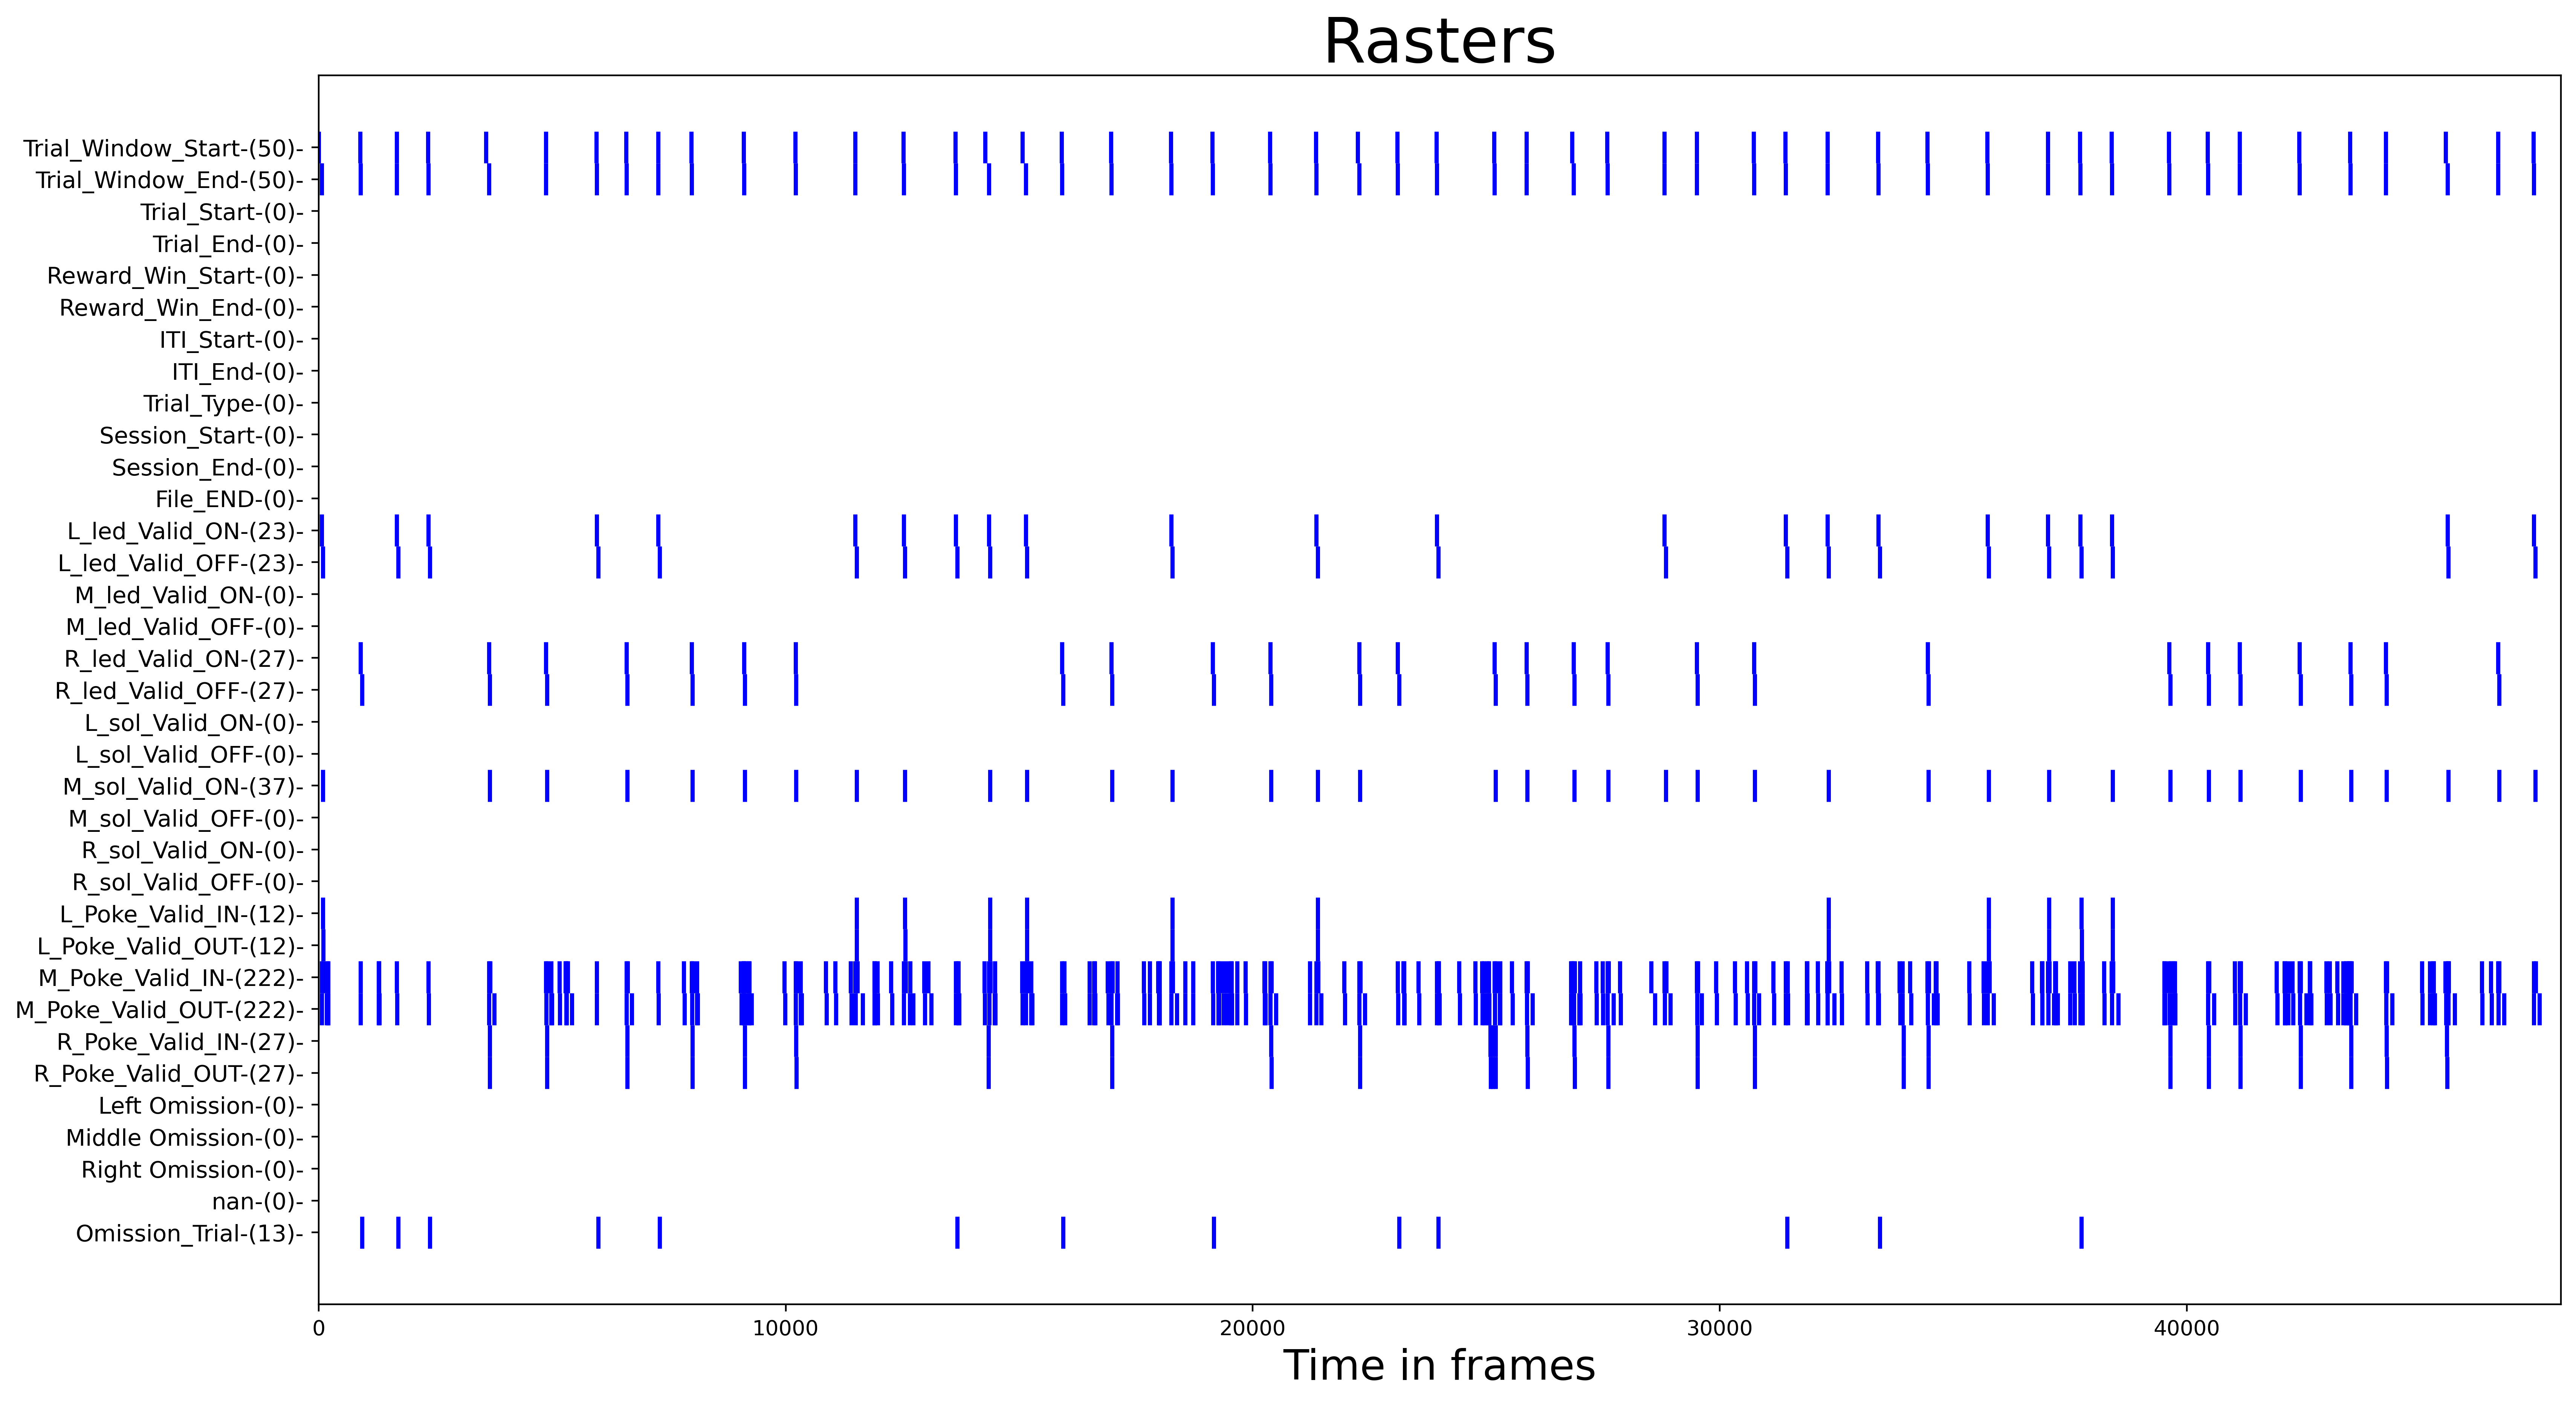

In [17]:
#################  raster for Events
# calling the label
#list(Event_Count_TimeStamps.keys())[3]


# calling the timestamps within label 
#Event_Count_TimeStamps[list(Event_Count_TimeStamps.keys())[3]][1]

# same ylabel as previous figure on timestamp count 
ylabel = []
for i in range(len(Event_Count)):
    ylabel.append(str(list(Event_Count.keys())[i]) + '-(' + str(list(Event_Count.values())[i]) + ')-')

#xlabel = np.arange(int(max(Selected_Data['timestamp']))+ 2)   #  use last timestamp from SelectedData
#xlabel = np.arange(int(Selected_Data['timestamp'][len(Selected_Data)-1])+ 2)   #  use last timestamp from SelectedData
xlabel = np.arange(0, len(df)+10)

fig, b = plt.subplots(figsize =(19.2, 10.8), dpi = 400.0)
#  turn timestamp into traces 
for i in range(len(Event_Count_TimeStamps)):                
    for ii in range(len(Event_Count_TimeStamps[list(Event_Count_TimeStamps.keys())[i]])):
        #if(str(Event_Count_TimeStamps[list(Event_Count_TimeStamps.keys())[i]][ii]).isnumeric()):  #  do not plot 'NAN', only plot if it is a number
        if((str(Event_Count_TimeStamps[list(Event_Count_TimeStamps.keys())[i]][ii]).replace('[', '')).replace(']', '').isnumeric()):  #  do not plot 'NAN', only plot if it is a number
            #t_stamp = (str(Event_Count_TimeStamps[list(Event_Count_TimeStamps.keys())[i]][ii]).replace('[', '')).replace(']', '')
            t_stamp = int((str(Event_Count_TimeStamps[list(Event_Count_TimeStamps.keys())[i]][ii]).replace('[', '')).replace(']', ''))
            b.vlines(x= t_stamp, ymin=(i-1)+0.5, ymax=(i)+0.5, colors='blue', lw=2, label='vline_single - partial height')
            
b.invert_yaxis()  # labels read top-to-bottom    
b.set_yticks(np.arange(len((Event_Count.keys()))))
b.set_yticklabels(ylabel, size = 11)
#b.set_xticks(xlabel)
#b.set_xticklabels(xlabel, size = 20)
b.set_xlabel('Time in frames', size = 20)
b.set_title('Rasters', size = 30)
#filename = 'Rasters-COM-' + ''.join(file_info['Box Number']).replace(' ', '') + '-' + ''.join(file_info['Paradigm']).replace(' ', '')  + \
#'-'+ ((Timelist[currentblock]).replace(':', '_')).replace('/', '_') + '.png'
plt.xlim([0, len(df)+10])
plt.show()

#savefilename = os.path.join(Save_Path, filename)
#fig.savefig(savefilename)

In [18]:
#. Create Timestamps by copying other timestamps

#Reward_Win_Begining
NewTimeStampLabel = 'Reward_Win_Begining'
TimeStampsToCopy = 'M_sol_Valid_ON'
Event_Count_TimeStamps[NewTimeStampLabel] = Event_Count_TimeStamps[TimeStampsToCopy]
Event_Count[NewTimeStampLabel] = Event_Count[TimeStampsToCopy]  # add one  to count num of events

#Pre_Trial_Baseline_End
NewTimeStampLabel = 'Pre_Trial_Baseline_End'
TimeStampsToCopy = 'Trial_Window_Start'
Event_Count_TimeStamps[NewTimeStampLabel] = Event_Count_TimeStamps[TimeStampsToCopy]
Event_Count[NewTimeStampLabel] = Event_Count[TimeStampsToCopy]  # add one  to count num of events



#######################################################
# Create Timestamps by shifting other timestamps (Part I)

#Reward_Win_Ending
NewTimeStampLabel = 'Reward_Win_Ending'
TimeStampsToShift = 'Reward_Win_Begining'
Shift_Duration = 3*20
temp=[[]]*Event_Count[TimeStampsToShift]
for i in range(Event_Count[TimeStampsToShift]):
    tempa = Event_Count_TimeStamps[TimeStampsToShift][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = tempa +Shift_Duration
    temp[i]= [tempb]
Event_Count_TimeStamps.update({NewTimeStampLabel : temp })
Event_Count[NewTimeStampLabel] = Event_Count[TimeStampsToShift]
    
#Pre_Trial_Baseline_Start
NewTimeStampLabel = 'Pre_Trial_Baseline_Start'
TimeStampsToShift = 'Pre_Trial_Baseline_End'
Shift_Duration = -6*20   # 6 seconds of pre-trial baseline
temp=[[]]*Event_Count[TimeStampsToShift]
for i in range(Event_Count[TimeStampsToShift]):
    tempa = Event_Count_TimeStamps[TimeStampsToShift][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = tempa +Shift_Duration
    temp[i]= [tempb]
Event_Count_TimeStamps.update({NewTimeStampLabel : temp })
Event_Count[NewTimeStampLabel] = Event_Count[TimeStampsToShift]




In [19]:
#  Create Traces for Trial_Window_Available_Trace, Left_IR_Trace,  Middle_IR_Trace,  Right_IR_Trace,  ALL_IR_Trace 

#Trial_Window_Available_Trace
Reference_Begin = 'Trial_Window_Start'
Reference_End = 'Trial_Window_End'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Trial_Window_Available_Trace = np.asarray( [0]*signal_Length)

#Check to make sure # of begin and end timestamps are same
if(Event_Count[Reference_Begin] > Event_Count[Reference_End]):
    Event_Count[Reference_Begin] = Event_Count[Reference_Begin] -1    #remove excess timestamp, happens when trial gets interrupted by session end 
for i in range(Event_Count[Reference_Begin]):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i]
    tempb = int(tempb[0])   # Convert to Integer
    Trial_Window_Available_Trace[tempa:tempb] = [1]
    
#Left_IR_Trace   
Reference_Begin = 'L_Poke_Valid_IN'
Reference_End = 'L_Poke_Valid_OUT'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Left_IR_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]-1):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i+0]
    tempb = int(tempb[0])   # Convert to Integer
    Left_IR_Trace[tempa:tempb] = [1]

#Middle_IR_Trace
Reference_Begin = 'M_Poke_Valid_IN'
Reference_End = 'M_Poke_Valid_OUT'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Middle_IR_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]-1):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i+0]
    tempb = int(tempb[0])   # Convert to Integer
    Middle_IR_Trace[tempa:tempb] = [1]

#Right_IR_Trace
Reference_Begin = 'R_Poke_Valid_IN'
Reference_End = 'R_Poke_Valid_OUT'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Right_IR_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]-1):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i+0]
    tempb = int(tempb[0])   # Convert to Integer
    Right_IR_Trace[tempa:tempb] = [1]

# #Middle_SOL_Trace
# Reference_Begin = 'M_sol_Valid_ON'
# Reference_End = 'M_sol_Valid_OFF'
# signal_Length = len(df)
# x_axis = np.arange(0,signal_Length) 
# Middle_SOL_Trace = np.asarray( [0]*signal_Length)
# for i in range(Event_Count[Reference_Begin]):
#     tempa = Event_Count_TimeStamps[Reference_Begin][i]
#     tempa = int(tempa[0])   # Convert to Integer
#     tempb = Event_Count_TimeStamps[Reference_End][i]
#     tempb = int(tempb[0])   # Convert to Integer
#     Middle_SOL_Trace[tempa:tempb] = [1]

#Middle_SOL_Trace
Reference_Begin = 'M_sol_Valid_ON'
# Reference_End = 'M_sol_Valid_OFF'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Middle_SOL_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_Begin][i]
    tempb = int(tempb[0])+20      # Convert to Integer,  20 bins is 1 second for visualization purpose
    Middle_SOL_Trace[tempa:tempb] = [1]
    
    
#ALL_IR_Trace
Reference_Begin = 'L_Poke_Valid_IN'
Reference_End = 'L_Poke_Valid_OUT'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
ALL_IR_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]-1):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i+0]
    tempb = int(tempb[0])   # Convert to Integer
    ALL_IR_Trace[tempa:tempb] = [1]
    
Reference_Begin = 'M_Poke_Valid_IN'
Reference_End = 'M_Poke_Valid_OUT'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
#ALL_IR_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]-1):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i+0]
    tempb = int(tempb[0])   # Convert to Integer
    ALL_IR_Trace[tempa:tempb] = [1]

Reference_Begin = 'R_Poke_Valid_IN'
Reference_End = 'R_Poke_Valid_OUT'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
#ALL_IR_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]-1):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i+0]
    tempb = int(tempb[0])   # Convert to Integer
    ALL_IR_Trace[tempa:tempb] = [1]

       
        
#Left_LED_Trace   
Reference_Begin = 'L_led_Valid_ON'
Reference_End = 'L_led_Valid_ON'   #. OFF TimeStamp missing , so added 1 second duration for visualization purpose 
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Left_LED_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i]
    tempb = int(tempb[0])   # Convert to Integer
    Left_LED_Trace[tempa:(tempb+ 2)] = [1]   #. OFF TimeStamp missing , so added 0.1 second (which is 2 frames) duration for visualization purpose 
    
#Right_LED_Trace   
Reference_Begin = 'R_led_Valid_ON'
Reference_End = 'R_led_Valid_ON'   #. OFF TimeStamp missing , so added 1 second duration for visualization purpose 
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Right_LED_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i]
    tempb = int(tempb[0])   # Convert to Integer
    Right_LED_Trace[tempa:(tempb+ 2)] = [1]   #. OFF TimeStamp missing , so added 0.1 second (which is 2 frames) duration for visualization purpose 
     
# Reward_Window_Trace
Window_Begin = 'M_sol_Valid_ON'
Window_End_Offset = 3*20     #  20 frames per second, reward windows last for 3 seconds after reward delivery
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Reward_Window_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Window_Begin]):
    tempa = Event_Count_TimeStamps[Window_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Window_Begin][i]
    tempb = int(tempb[0]) + Window_End_Offset   # Convert to Integer, then add the offset value
    Reward_Window_Trace[tempa:tempb] = [1]

    
        
#Pre_Trial_Baseline
Reference_Begin = 'Pre_Trial_Baseline_Start'
Reference_End = 'Pre_Trial_Baseline_End'
signal_Length = len(df)
x_axis = np.arange(0,signal_Length) 
Pre_Trial_Baseline_Trace = np.asarray( [0]*signal_Length)
for i in range(Event_Count[Reference_Begin]):
    tempa = Event_Count_TimeStamps[Reference_Begin][i]
    tempa = int(tempa[0])   # Convert to Integer
    tempb = Event_Count_TimeStamps[Reference_End][i]
    tempb = int(tempb[0])   # Convert to Integer
    Pre_Trial_Baseline_Trace[tempa:tempb] = [1]
    
    
    
# Convert dictionary to pandas data frame 
temp = SignalTraces_pd.DataFrame(Trial_Window_Available_Trace)
Trial_Window_Available_Trace_panda = temp.squeeze()  ################    Trial_Window_Available_Trace_panda
df['Trial_Window_Available_Trace_panda']  = Trial_Window_Available_Trace_panda  # add this back to existing dataframe 


temp = SignalTraces_pd.DataFrame(Left_IR_Trace)
Left_IR_Traces_panda = temp.squeeze()               #################     Left_IR_Traces_panda
df['Left_IR_Traces_panda']  = Left_IR_Traces_panda  # add this back to existing dataframe


temp = SignalTraces_pd.DataFrame(Middle_IR_Trace)
Middle_IR_Traces_panda = temp.squeeze()             #################     Middle_IR_Traces_panda
df['Middle_IR_Traces_panda']  = Middle_IR_Traces_panda  # add this back to existing dataframe

temp = SignalTraces_pd.DataFrame(Right_IR_Trace)
Right_IR_Traces_panda = temp.squeeze()              #################     Right_IR_Traces_panda
df['Right_IR_Traces_panda']  = Right_IR_Traces_panda  # add this back to existing dataframe

temp = SignalTraces_pd.DataFrame(ALL_IR_Trace)
ALL_IR_Traces_panda = temp.squeeze()                #################      ALL_IR_Traces_panda
df['ALL_IR_Traces_panda']  = ALL_IR_Traces_panda  # add this back to existing dataframe

temp = SignalTraces_pd.DataFrame(Middle_SOL_Trace)
Middle_SOL_Trace_panda = temp.squeeze()              #################     Middle_SOL_Trace_panda
df['Middle_SOL_Trace_panda']  = Middle_SOL_Trace_panda  # add this back to existing dataframe

temp = SignalTraces_pd.DataFrame(Left_LED_Trace)
Left_LED_Traces_panda = temp.squeeze()               #################     Left_LED_Traces_panda
df['Left_LED_Traces_panda']  = Left_LED_Traces_panda  # add this back to existing dataframe

temp = SignalTraces_pd.DataFrame(Right_LED_Trace)
Right_LED_Traces_panda = temp.squeeze()               #################     Left_LED_Traces_panda
df['Right_LED_Traces_panda']  = Right_LED_Traces_panda  # add this back to existing dataframe

temp = SignalTraces_pd.DataFrame(Reward_Window_Trace)
Reward_Window_Trace_panda = temp.squeeze()                #################      Reward_Window_Trace_panda
df['Reward_Window_Trace_panda']  = Reward_Window_Trace_panda  # add this back to existing dataframe

temp = SignalTraces_pd.DataFrame(Pre_Trial_Baseline_Trace)
Pre_Trial_Baseline_Trace_panda = temp.squeeze()                #################      Reward_Window_Trace_panda
df['Pre_Trial_Baseline_Trace_panda']  = Pre_Trial_Baseline_Trace_panda  # add this back to existing dataframe

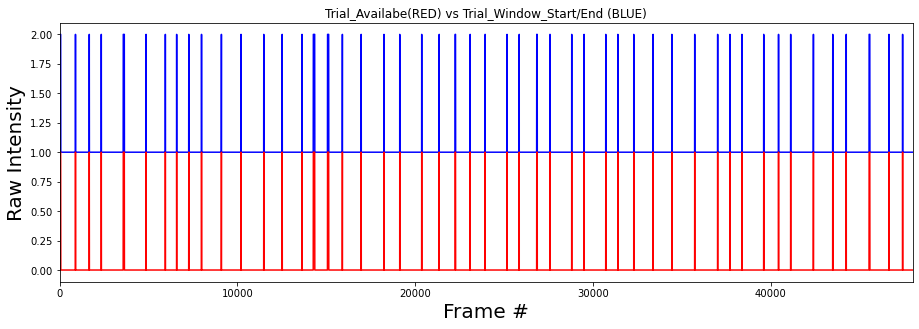

In [20]:
#  Verify extracted timestamp match up with sgianl 
#(so "Trial_Window" (timestamp) should be equal to "Trial_Available" (trace))

#plt_Check_Alighnment.plot(x_axis,(Trial_Window_Available_Trace_panda +1)) 
plt_Check_Alighnment.plot(df['Trial_Window_Available_Trace_panda']+1, color ='b')   # Trial Avalable Trace
plt_Check_Alighnment.plot(df['trial_available'], color ='r')   # Trial Avalable Trace

plt_Check_Alighnment.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_Check_Alighnment.ylabel('Raw Intensity', size = 20)
plt_Check_Alighnment.xlabel('Frame #', size = 20)
plt_Check_Alighnment.title(('Trial_Availabe(RED) vs Trial_Window_Start/End (BLUE)'), fontdict=None, loc='center')
plt_trial.xlim(0, len(df))
#plt_Check_Alighnment.xlim(2310, 2360)  #Example Trial
#plt_Check_Alighnment.ylim(0, 3.5)  #Example Trial

plt_Check_Alighnment.show()

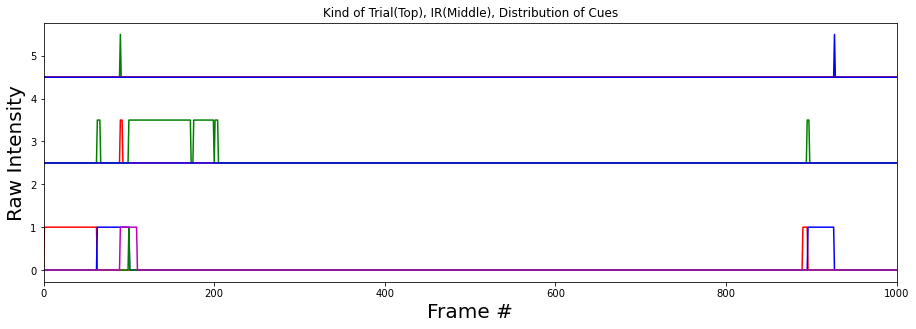

In [21]:
# Plot TimeStamps (Events)

plt_trial.plot(df['trial_available'], color ='r')
plt_trial.plot(df['trial'], color ='b')
plt_trial.plot(df['reward_received'], color ='g')
plt_trial.plot(df['Middle_SOL_Trace_panda'], color ='m')

plt_trial.plot(df['Left_IR_Traces_panda']+2.5, color ='r')
plt_trial.plot(df['Middle_IR_Traces_panda']+2.5, color ='g')
plt_trial.plot(df['Right_IR_Traces_panda']+2.5, color ='b')


plt_trial.plot((df['correct_trial'] +4.5), color ='g')
plt_trial.plot((df['incorrect_trial'] + 4.5), color ='r')
plt_trial.plot((df['omitted']+4.5), color ='b')


plt_trial.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_trial.ylabel('Raw Intensity', size = 20)
plt_trial.xlabel('Frame #', size = 20)
plt_trial.title(('Kind of Trial(Top), IR(Middle), Distribution of Cues'), fontdict=None, loc='center')

plt_trial.xlim(0, len(df))
plt_trial.xlim(0, 1000)
#plt_trial.xlim(2300, 2400)  #Example Trial
#plt_trial.xlim(5000, 7000)  #Example Trial
plt_trial.show()

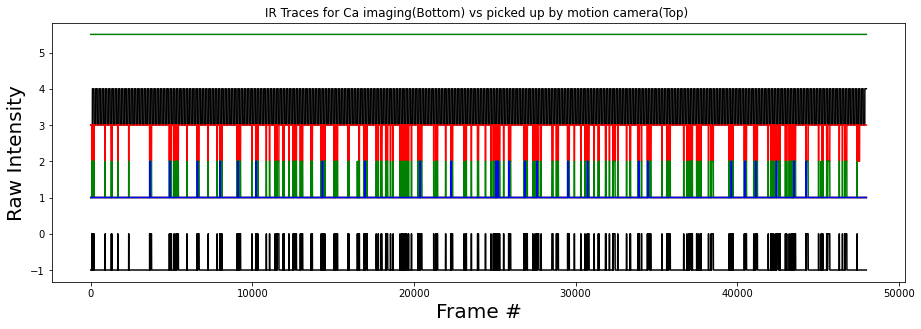

In [22]:
# ############################################
# # Optional for Motion data

#Manual_Shift = -22 +26  #. Additional shifting within the 5 second pulse (necessary to perform manually bc of poential electrical noise in the begining)
#Manual_Shift = -310  #. Additional shifting within the 5 second pulse (necessary to perform manually bc of poential electrical noise in the begining)
#Manual_Shift = -310
###############################################

#if (Motion_data == 1):  #. Running Motion Data from over-head camera is optional. 

# Motion_File_Name = 'Aligned-Ka-DS2-P5_5-S10-Sucrose_Motion.csv'   # phase III, go no go
# Temp_Motion_df = Motion_pd.read_csv((File_Path+'/'+ Motion_File_Name), low_memory=False)
# print(Temp_Motion_df)

# Find Imaging Onset Time in frames using ALL_IR_Traces_panda
# temp = df.ALL_IR_Traces_panda.values.tolist()
# res = list(filter(lambda i: i > 0.5, temp))[0]
# Image_Onset =  temp.index(res)


# #. add rows to all columns, then shift Motion_video based on ImageOnset
#Shift = Image_Onset+ Manual_Shift #. 20 is added manually in addition to the shift detected by the computer.
Shift = 0
#print(Shift)
df2 = pd.DataFrame(index=range(Shift),columns=Temp_Motion_df.columns)
df3 = Temp_Motion_df.append(df2, ignore_index=True)      #. add rows to all columns before shifting 

Shifted_Motion_df = df3.shift(Shift, axis = 0, fill_value=0)

df['Video_Motion_Trace_panda']  = Shifted_Motion_df['Motion_Thresholded']
df['Video_Light1_Trace_panda']  = Shifted_Motion_df['Light_1']
df['Video_Light2_Trace_panda']  = Shifted_Motion_df['Light_2']
df['Video_Light3_Trace_panda']  = Shifted_Motion_df['Light_3']

# #. Optional,  IR Traces for Ca imaging vs picked up by motion camera 
# # Plot TimeStamps (Events)
plt_trial.plot(df['Video_Light1_Trace_panda']+4.5, color ='g')
plt_trial.plot(-df['Video_Light2_Trace_panda']+4, color ='k')
plt_trial.plot(-df['Video_Light3_Trace_panda']+3, color ='r')


#plt_trial.plot(df['ALL_IR_Traces_panda'] 

plt_trial.plot(df['Left_IR_Traces_panda']+1, color ='r')
plt_trial.plot(df['Middle_IR_Traces_panda']+1, color ='g')
plt_trial.plot(df['Right_IR_Traces_panda']+1, color ='b')
plt_trial.plot(df['ALL_IR_Traces_panda']-1, color = 'k' ) 

#plt_trial.vlines(x= Image_Onset, ymin=1, ymax=2, colors='c', lw=5)

#.  Plot non offset data before they get adjusted
# plt_trial.plot(-Temp_Motion_df['Light_2']+9, color ='k')
# plt_trial.plot(-Temp_Motion_df['Light_3']+8, color ='r')

plt_trial.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_trial.ylabel('Raw Intensity', size = 20)
plt_trial.xlabel('Frame #', size = 20)
plt_trial.title(('IR Traces for Ca imaging(Bottom) vs picked up by motion camera(Top) '), fontdict=None, loc='center')


#plt_trial.xlim(0, 48000)  #Example Trial  All TimeStamp
#plt_trial.xlim(0, 800)  #Example Trial  All TimeStamp
#plt_trial.xlim(300, 500)  #Example Trial  All TimeStamp
#plt_trial.xlim(0, 48000)  #Example Trial  All TimeStamp
#plt_trial.xlim(350, 390)  #Example Trial  First TimeStamp (0 shift)
#plt_trial.xlim(5000, 5500)  #Example Trial  First TimeStamp (0 shift)
#plt_trial.xlim(10000, 10500)  #Example Trial  First TimeStamp (0 shift)
#plt_trial.xlim(20000, 20500)  #Example Trial  middle TimeStamp
#plt_trial.xlim(29000, 30000)  #Example Trial  middle TimeStamp
#plt_trial.xlim(44000, 44500)  #Example Trial  Second Last TimeStamp  (+4 manual shift)
#plt_trial.xlim(45000, 48000)  #Example Trial  Last TimeStamp
plt_trial.show()


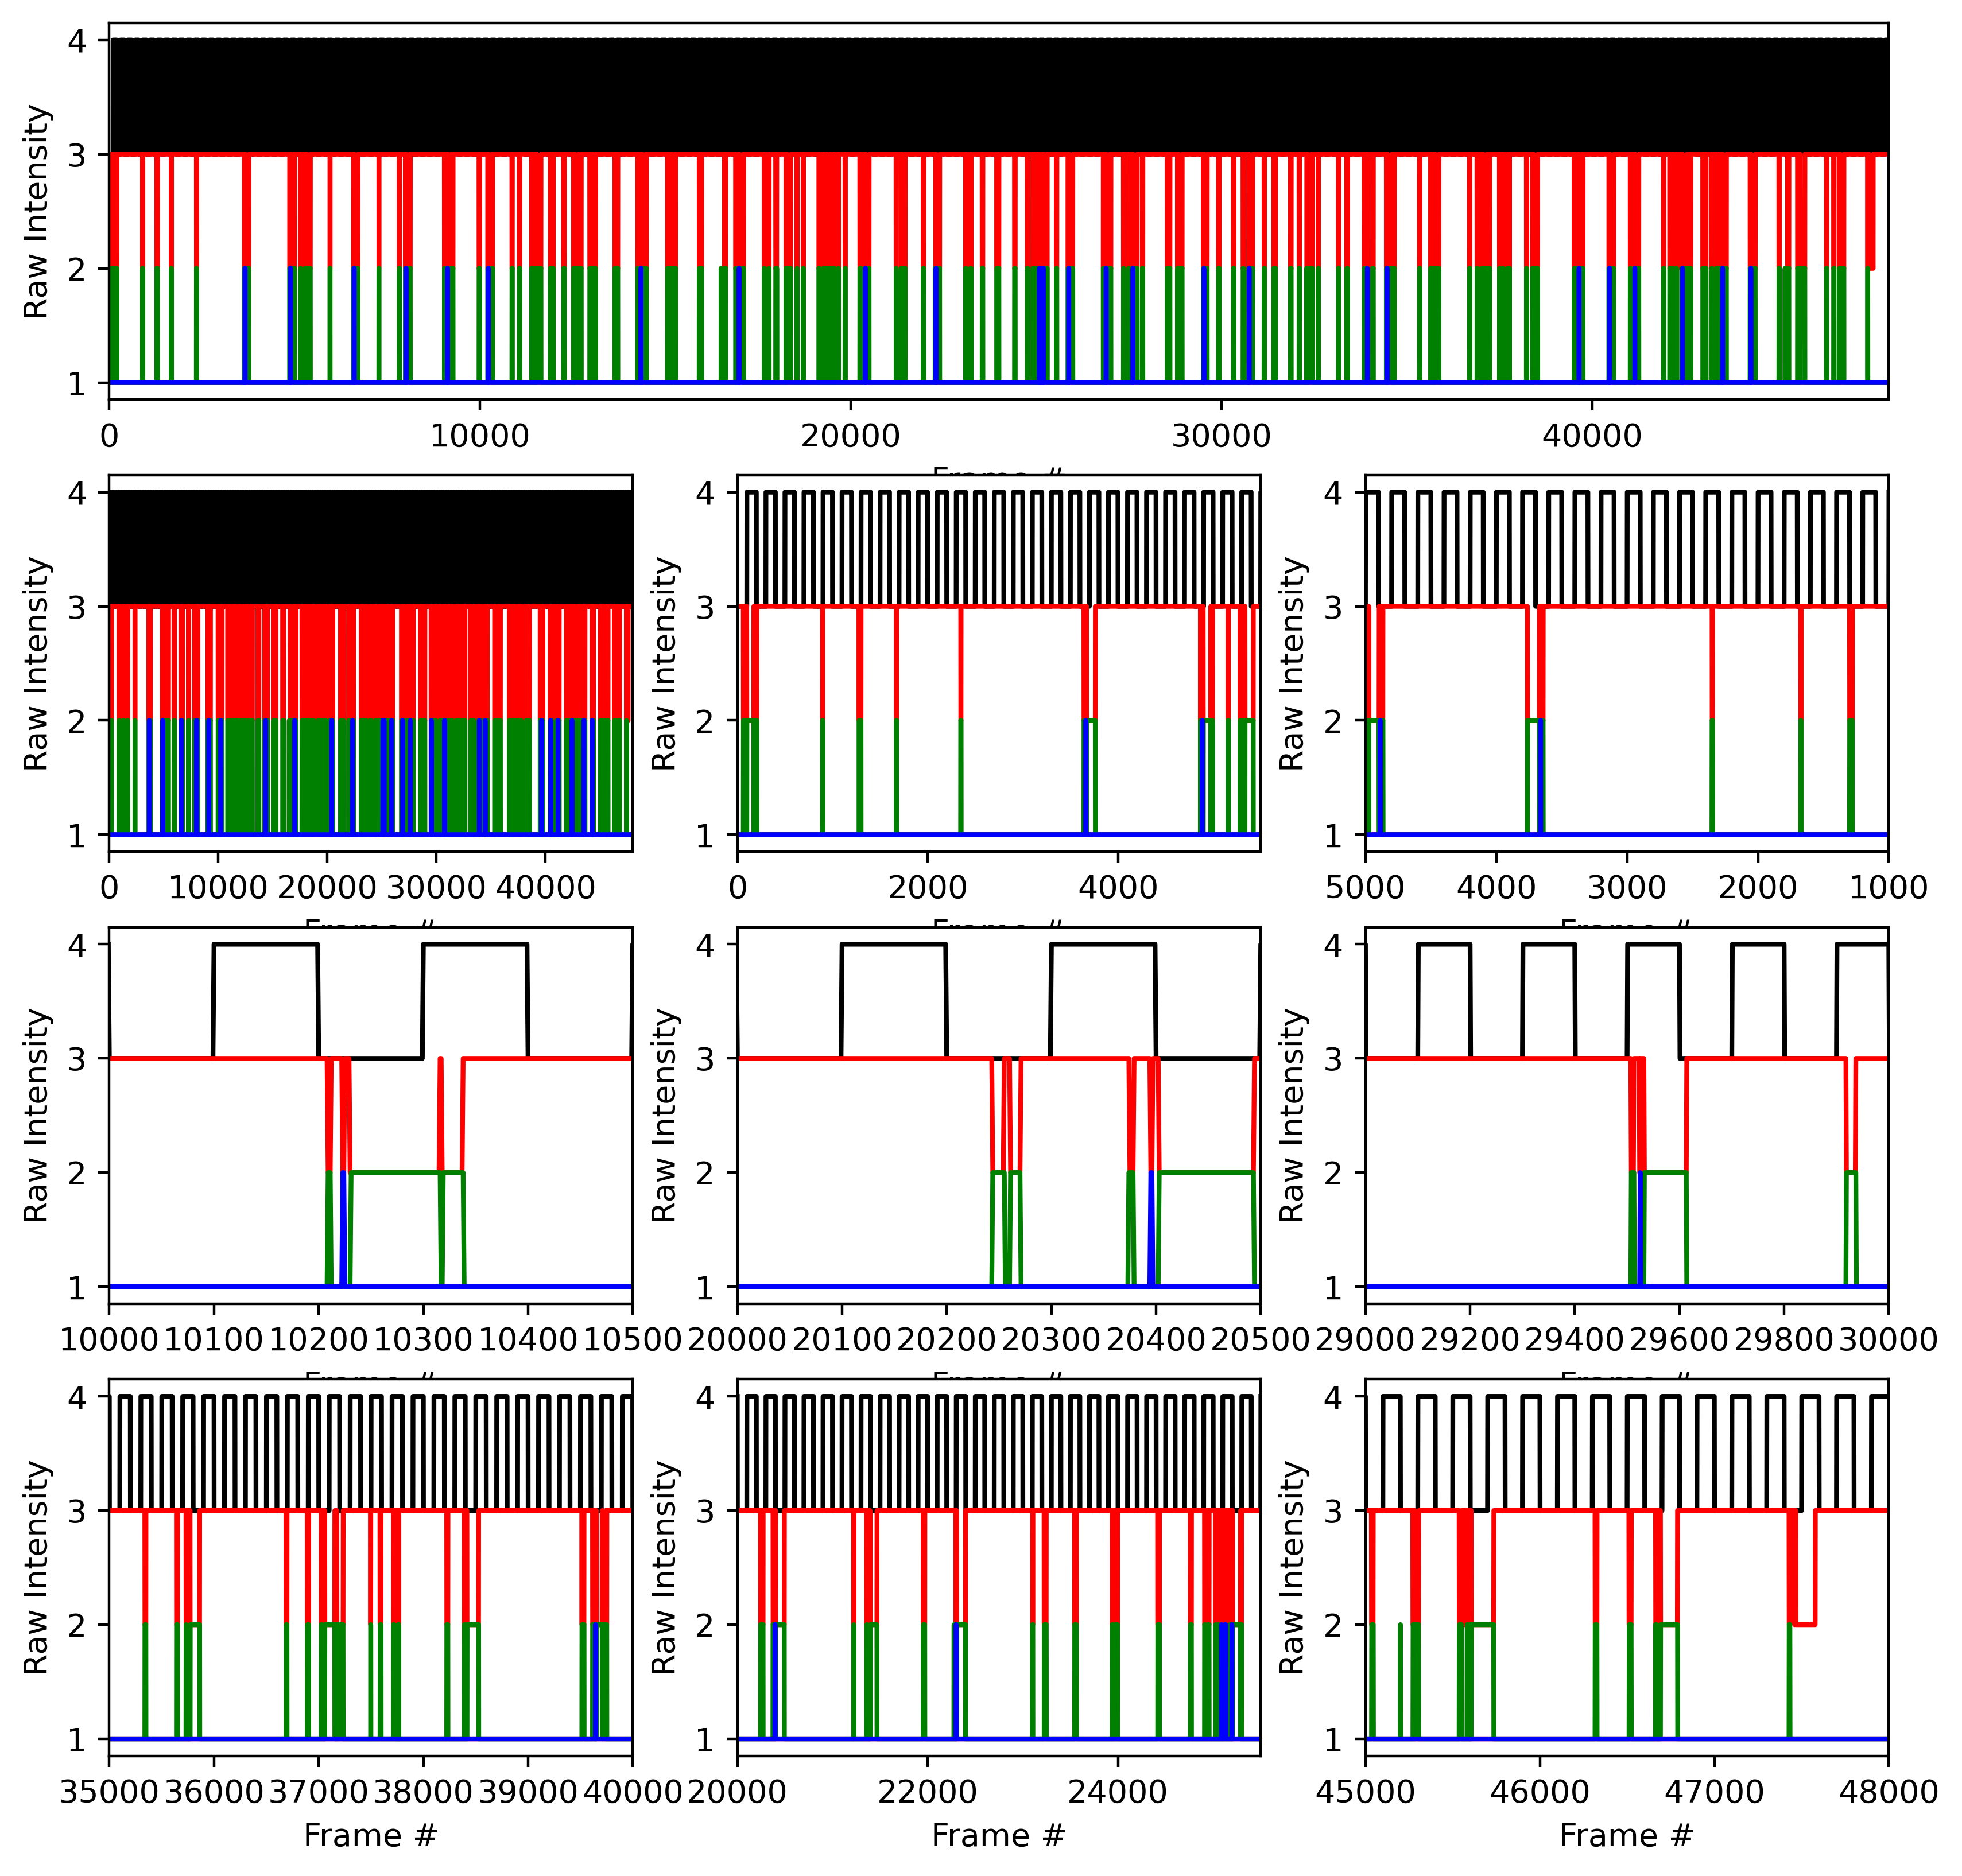

In [23]:

fig = plt_trial.figure(figsize =(10, 10), dpi = 400.0)

ax = fig.add_subplot(4,1 ,1)

plt_trial.plot(-df['Video_Light2_Trace_panda']+4, color ='k')
plt_trial.plot(-df['Video_Light3_Trace_panda']+3, color ='r')

plt_trial.plot(df['Left_IR_Traces_panda']+1, color ='r')
plt_trial.plot(df['Middle_IR_Traces_panda']+1, color ='g')
plt_trial.plot(df['Right_IR_Traces_panda']+1, color ='b')



#plt_trial.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_trial.ylabel('Raw Intensity', size = 10)
plt_trial.xlabel('Frame #', size = 10)

plt_trial.xlim(0, 48000)  #Example Trial  All TimeStamp

    ######################################################################################
for i in range(1,10,1):
    ax = fig.add_subplot(4,3 ,i+3)

    plt_trial.plot(-df['Video_Light2_Trace_panda']+4, color ='k')
    plt_trial.plot(-df['Video_Light3_Trace_panda']+3, color ='r')

    plt_trial.plot(df['Left_IR_Traces_panda']+1, color ='r')
    plt_trial.plot(df['Middle_IR_Traces_panda']+1, color ='g')
    plt_trial.plot(df['Right_IR_Traces_panda']+1, color ='b')



    #plt_trial.subplots_adjust(bottom=0.1, right=2.1, top=1)
    plt_trial.ylabel('Raw Intensity', size = 10)
    plt_trial.xlabel('Frame #', size = 10)
    #plt_trial.title(('IR Traces for Ca imaging vs picked up by motion camera '), fontdict=None, loc='center')

    #plt_trial.xlim(0, 800)  #Example Trial  All TimeStamp
    if(i== 1):
        plt_trial.xlim(0, 48000)  #Example Trial  All TimeStamp
    elif(i ==2):
        plt_trial.xlim(0, 5500)  #Example Trial  First TimeStamp (0 shift)
    elif(i ==3):
        plt_trial.xlim(5000, 1000)  #Example Trial  First TimeStamp (0 shift)
    elif(i ==4):
        plt_trial.xlim(10000, 10500)  #Example Trial  First TimeStamp (0 shift)
    elif(i==5):
        plt_trial.xlim(20000, 20500)  #Example Trial  middle TimeStamp
    elif(i ==8):
        plt_trial.xlim(20000, 25500)  #Example Trial  First TimeStamp (0 shift)
    elif(i==6):
        plt_trial.xlim(29000, 30000)  #Example Trial  middle TimeStamp
    elif(i==7):
        plt_trial.xlim(35000, 40000)  #Example Trial  middle TimeStamp
    elif(i==9):
        plt_trial.xlim(45000, 48000)  #Example Trial  Last TimeStamp


filename =  File_Name.split(".")[0] +'_'+ 'Motion_Alightment_Check' + '.jpg'
savefilename = os.path.join(Save_Path, filename)
plt_trial.savefig(savefilename)


plt_trial.show()



In [24]:

########################### Funcation to export figures##################




######## Plot Perievent#########

fig = plt_perievent_traces.figure(figsize =(19.2, 10.8), dpi = 400.0)
ax = fig.add_subplot(2,1 ,1)
im = plt_perievent_traces.imshow(TransBinaryTraces ,interpolation = 'none', cmap=plt_Perievent_One.cm.gist_rainbow_r, aspect = 'auto')
#im = plt_perievent_traces.imshow(Perievent_Traces, cmap=plt_Perievent_One.cm.gist_rainbow_r, aspect = 'auto')



#plt_perievent_traces.title('Signal: ' + Signal_Label + '\n' + 'Ref:  '+ ReferenceEvent + '\n' + str(WindowBeging) + '_I_' + str(WindowEnd), size = 20)
plt_perievent_traces.xlabel('Time (in Frames)', size = 20)
plt_perievent_traces.ylabel(('Cell #' + '(' + str(NumofCell_raw)+ ')'), size = 20)

# Draw Reference Line and 
#     ax.vlines(x= WindowBeging-0.5, ymin=-1, ymax=len(Event_Count_TimeStamps[ReferenceEvent]), colors='green', lw=10, label='vline_single - partial height')
#     plt_perievent_traces.xticks(np.arange(-1, (WindowBeging +WindowEnd +1), 5))
#     plt_perievent_traces.yticks(np.arange(0, len(Event_Count_TimeStamps[ReferenceEvent]), 5.0))

# Color axis
#cax = plt_perievent_traces.axes([2.2, 0.1, 0.075, 0.8])
#plt_Heat_scaled.yscale('log')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
plt_perievent_traces.clim(-0.3, 1)###############################################################  Set Range for Color
plt_perievent_traces.colorbar(im, cax=cax)





#plt_perievent_traces.colorbar(cax=cax)
#plt_perievent_traces.show()


######### Side view to look at Amplitude########

ax = fig.add_subplot(2,1 ,2)

for i in range(NumofCell_raw):
    plt_perievent_traces.plot(ReScaled[CellList_raw[i]], color ='b')

    
#ax.vlines(x= WindowBeging-0.5, ymin=0, ymax=1, colors='green', lw=10, label='vline_single - partial height')

plt_perievent_traces.ylabel('Intensity', size = 20)
plt_perievent_traces.xlabel('Time (in Frames)', size = 20)
#plt_perievent_traces.title(('Cell #' + CellList[x]), fontdict=None, loc='center')



plt_perievent_traces.subplots_adjust(bottom=0.1, right=0.8, top=0.9)    # Adjust Figure Size
filename =  'Spike_Rasters-' + File_Name.replace(".csv","")  + '.png'
savefilename = os.path.join(Save_Path, filename)
plt_perievent_traces.savefig(savefilename)
#plt_perievent_traces.show()
plt_perievent_traces.close()
print('Figure Exported')



    
# Signal_Label = ('ReScaled_Cell_'+ CellList[15])
# ReferenceEvent = 'Trial_Window_Start'
# ExportRasters(Signal_Label,ReferenceEvent)
    
# ##################################################   
# # Example Cell 


Figure Exported


In [25]:
#. Export Binned Data for calcium events 

#Bin = 20  # Bin size            #(60 seonds *20 frames per second)
Bin = Global_Bin_size

#Bin = 1200  # Bin size            #(60 seonds *20 frames per second)                             
Bin_Data_Binary_df = pd.DataFrame()
Bin_Data_ReScaled_df = pd.DataFrame()
Mean_Bin_Data_df = pd.DataFrame()
Check_Data_df = pd.DataFrame()

for x in range(NumofCell_raw):                      
#for x in range(5):                                          # ******* test

    #  Input data 
    #*******************************Change this for signal type(ReScaled, Binary)
    temp = Binary.loc[0:len(Binary), CellList_deconv[x]]        
    temp_df = pd.DataFrame(temp)

    # Create repeated array to sum across bins 
    temp_ax = np.repeat(np.arange(1,len(temp)//Bin+1,1), Bin)

    # add the residuals for the axis 
    extra_bins = np.repeat(len(temp)//Bin+1, len(temp)%Bin)     
    temp_df['ax'] = np.append(temp_ax, extra_bins)

    Temp_Bin_Data = (temp_df.groupby(temp_df['ax'])[CellList_deconv[x]].sum()).tolist()
    Bin_Data_Binary_df[CellList_deconv[x]] = Temp_Bin_Data
    
    
    #*******************************Change this for signal type(ReScaled, Binary)     
    temp = ReScaled.loc[0:len(ReScaled), CellList_raw[x]]
    temp_df = pd.DataFrame(temp)

    # Create repeated array to sum across bins 
    temp_ax = np.repeat(np.arange(1,len(temp)//Bin+1,1), Bin)

    # add the residuals for the axis 
    extra_bins = np.repeat(len(temp)//Bin+1, len(temp)%Bin)     
    temp_df['ax'] = np.append(temp_ax, extra_bins)

    Temp_Bin_Data = (temp_df.groupby(temp_df['ax'])[CellList_raw[x]].sum()).tolist()
    Bin_Data_ReScaled_df[CellList_raw[x]] = Temp_Bin_Data
    
    

    
#     ######. This is for manual checking 
#     Check_Data_df['ax']= temp_df['ax']
#     Check_Data_df[CellList_raw[x]]= temp
    
Trans_Bin_Data_Binary = np.transpose(Bin_Data_Binary_df.loc[0:len(Bin_Data_Binary_df), CellList_deconv])
Trans_Bin_Data_ReScaled = np.transpose(Bin_Data_ReScaled_df.loc[0:len(Bin_Data_ReScaled_df), CellList_raw])

# Trans_Bin_Data = np.transpose(Bin_Data_df.loc[0:len(Bin_Data_df), CellList_raw])      #***********   Test

# Bin_Data_df.to_csv(os.path.join(Save_Path, 'Export_Binned_Traces.csv'))

#print(Check_Data_df)
#print(Bin_Data_df)
#print(Trans_Bin_Data)

In [26]:
# Bin imaging ALL_IR data
# Bin data to 1 second bins

#df['ALL_IR_Traces_panda']


#ALL_IR_Bin = 20  # Bin size            #(60 seonds *20 frames per second)     
ALL_IR_Bin = Global_Bin_size

#ALL_IR_Bin = 1200  # Bin size            #(60 seonds *20 frames per second)                             
Bin_ALL_IR_Data_df = pd.DataFrame()
Mean_Bin_ALL_IR_Data_df = pd.DataFrame()
Check_ALL_IR_Data_df = pd.DataFrame()


for x in range(1):                      
#for x in range(5):                                          # ******* test

    #  Input data 
    #*******************************Change this for signal type(ReScaled, Binary)
    temp = df.loc[0:len(df), 'ALL_IR_Traces_panda']        
    temp_df = pd.DataFrame(temp)

    # Create repeated array to sum across bins 
    temp_ax = np.repeat(np.arange(1,len(temp)//ALL_IR_Bin+1,1), ALL_IR_Bin)

    # add the residuals for the axis 
    extra_bins = np.repeat(len(temp)//ALL_IR_Bin+1, len(temp)%ALL_IR_Bin)     
    temp_df['ax'] = np.append(temp_ax, extra_bins)

    Temp_Bin_Data = (temp_df.groupby(temp_df['ax'])['ALL_IR_Traces_panda'].sum()).tolist()
    Bin_ALL_IR_Data_df['ALL_IR_Traces_panda'] = Temp_Bin_Data
    




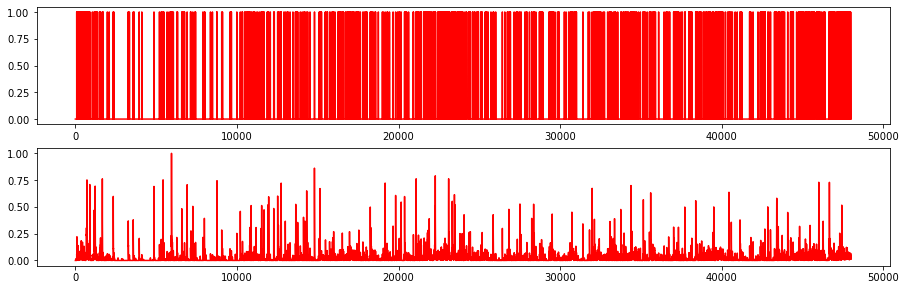

In [27]:
fig = plt_perievent_traces.figure()



plt_perievent_traces.subplots_adjust(bottom=0.1, right=2.1, top=1)

ax = fig.add_subplot(2,1 ,1)
plt_perievent_traces.plot(Binary[CellList_deconv[2]], color ='r')


ax = fig.add_subplot(2,1 ,2)
plt_perievent_traces.plot(ReScaled[CellList_raw[2]], color ='r')

#plt_perievent_traces.xlim(0, len(Bin_Motion_Data_df))
#plt_perievent_traces.xlim(0, 500)  #Example Trial
#plt_perievent_traces.xlim(5000, 7000)  #Example Trial
plt_perievent_traces.show()

In [28]:
# print(CellList_deconv[2])
# print(CellList_raw[2])


print(Binary[CellList_deconv[2]])
print(ReScaled[CellList_raw[2]])

0        0
1        0
2        0
3        0
4        0
        ..
47996    0
47997    0
47998    0
47999    0
48000    0
Name: deconv_6, Length: 48001, dtype: int64
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
47996    0.025481
47997    0.021452
47998    0.018059
47999    0.015203
48000    0.012799
Name: 6, Length: 48001, dtype: float64


In [29]:
########################### Funcation to export figures##################




######## Plot Perievent#########

fig = plt_perievent_traces.figure(figsize =(19.2, 10.8), dpi = 400.0)
ax = fig.add_subplot(3,1 ,1)
im = plt_perievent_traces.imshow(TransBinaryTraces, interpolation = 'none', cmap=plt_Heat_scaled.cm.bwr, aspect = 'auto')
#im = plt_perievent_traces.imshow(Perievent_Traces, cmap=plt_Perievent_One.cm.gist_rainbow_r, aspect = 'auto')



#plt_perievent_traces.title('Signal: ' + Signal_Label + '\n' + 'Ref:  '+ ReferenceEvent + '\n' + str(WindowBeging) + '_I_' + str(WindowEnd), size = 20)
plt_perievent_traces.xlabel('Time (in Frames)', size = 20)
plt_perievent_traces.ylabel(('Cell #' + '(' + str(NumofCell_raw)+ ')'), size = 20)

# Draw Reference Line and 
#     ax.vlines(x= WindowBeging-0.5, ymin=-1, ymax=len(Event_Count_TimeStamps[ReferenceEvent]), colors='green', lw=10, label='vline_single - partial height')
#     plt_perievent_traces.xticks(np.arange(-1, (WindowBeging +WindowEnd +1), 5))
#     plt_perievent_traces.yticks(np.arange(0, len(Event_Count_TimeStamps[ReferenceEvent]), 5.0))

# Color axis
#cax = plt_perievent_traces.axes([2.2, 0.1, 0.075, 0.8])
#plt_Heat_scaled.yscale('log')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
plt_perievent_traces.clim(0, 1)###############################################################  Set Range for Color
plt_perievent_traces.colorbar(im, cax=cax)



######## Plot Perievent#########


ax = fig.add_subplot(3,1 ,2)
im = plt_perievent_traces.imshow(Trans_Bin_Data_ReScaled, interpolation = 'none', cmap=plt_Heat_scaled.cm.hot, aspect = 'auto')
#im = plt_perievent_traces.imshow(Perievent_Traces, cmap=plt_Perievent_One.cm.gist_rainbow_r, aspect = 'auto')



#plt_perievent_traces.title('Binned Data (Count of Events per Bin)', size = 20, y=1.08)
plt_perievent_traces.xlabel('Binned Data (Count of Events per Bin)', size = 20)
plt_perievent_traces.ylabel(('Cell #' + '(' + str(NumofCell_raw)+ ')'), size = 20)

# Draw Reference Line and 
#     ax.vlines(x= WindowBeging-0.5, ymin=-1, ymax=len(Event_Count_TimeStamps[ReferenceEvent]), colors='green', lw=10, label='vline_single - partial height')
#     plt_perievent_traces.xticks(np.arange(-1, (WindowBeging +WindowEnd +1), 5))
#     plt_perievent_traces.yticks(np.arange(0, len(Event_Count_TimeStamps[ReferenceEvent]), 5.0))

# Color axis
#cax = plt_perievent_traces.axes([2.2, 0.1, 0.075, 0.8])
#plt_Heat_scaled.yscale('log')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.05)
#plt_perievent_traces.clim(0, 1)###############################################################  Set Range for Color
plt_perievent_traces.colorbar(im, cax=cax)










#plt_perievent_traces.colorbar(cax=cax)
#plt_perievent_traces.show()


######### Side view to look at Amplitude########

ax = fig.add_subplot(3,1 ,3)

for i in range(NumofCell_raw):
    plt_perievent_traces.plot(Bin_Data_ReScaled_df[CellList_raw[i]], color ='b')

#plt_perievent_traces.plot(Mean_Bin_Data_df, color ='r', linewidth = 3)    ########### Plot Averages of wave
#ax.vlines(x= WindowBeging-0.5, ymin=0, ymax=1, colors='green', lw=10, label='vline_single - partial height')



Mean_Bin_Data_df = Bin_Data_ReScaled_df.iloc[:,0:NumofCell_raw].mean(axis=1)  # Calculates mean of bins across cell #***********   Test
SEM_Bin_Data_df = numpy.std(Bin_Data_ReScaled_df, ddof=1, axis=1) / numpy.sqrt(NumofCell_raw)  # Stardard error of the mean 

plt_perievent_traces.plot(Mean_Bin_Data_df, color ='r', linewidth = 3)    ########### Plot Averages of wave
x = np.arange(0,len(Mean_Bin_Data_df)) 
plt_perievent_traces.plot((Mean_Bin_Data_df +SEM_Bin_Data_df ), color ='g', linewidth = 3)    ########### Plot Averages of wave Error Shading
plt_perievent_traces.plot((Mean_Bin_Data_df -SEM_Bin_Data_df ), color ='g', linewidth = 3)    ########### Plot Averages of wave Error Shading
ax.fill_between(x, (Mean_Bin_Data_df +SEM_Bin_Data_df ), (Mean_Bin_Data_df -SEM_Bin_Data_df ), color='green', alpha=1)







plt_perievent_traces.ylabel('# Events per Bin', size = 20)
plt_perievent_traces.xlabel('Binned Data (Count of Events per Bin)', size = 20)
#plt_perievent_traces.title('Binned Data (Count of Events per Bin)', fontdict=None, loc='center', y=1.08)



plt_perievent_traces.subplots_adjust(bottom=0.1, right=0.8, top=0.9)    # Adjust Figure Size
filename =  'Spike_Rasters-Binned-' + File_Name.replace(".csv","")  + '.png'
savefilename = os.path.join(Save_Path, filename)
plt_perievent_traces.savefig(savefilename)
#plt_perievent_traces.show()
plt_perievent_traces.close()
print('Figure Exported')



    
# Signal_Label = ('ReScaled_Cell_'+ CellList[15])
# ReferenceEvent = 'Trial_Window_Start'
# ExportRasters(Signal_Label,ReferenceEvent)
    
# ##################################################   
# # Example Cell 


Figure Exported


In [30]:
# ############################################
# # Optional for Motion data
# Bin data to 1 second bins


#Motion_Bin = 20  # Bin size            #(60 seonds *20 frames per second)  
Motion_Bin = Global_Bin_size

#Motion_Bin = 1200  # Bin size            #(60 seonds *20 frames per second)                             
Bin_Motion_Data_df = pd.DataFrame()
Mean_Bin_Motion_Data_df = pd.DataFrame()
Check_Motion_Data_df = pd.DataFrame()

print(Shifted_Motion_df.keys()[0:10])   #. ['Motion', 'Light_1', 'Light_2', 'Light_3', 'Motion_Thresholded']

for x in range(8):                      

    #  Input data 
    temp = Shifted_Motion_df.loc[0:len(Shifted_Motion_df), Shifted_Motion_df.keys()[x]]
    temp_df = pd.DataFrame(temp)
    # Create repeated array to sum across bins 
    temp_ax = np.repeat(np.arange(1,len(temp)//Motion_Bin+1,1),Motion_Bin)
    # add the residuals for the axis 
    extra_bins = np.repeat(len(temp)//Motion_Bin+1, len(temp)%Motion_Bin)     
    temp_df['ax'] = np.append(temp_ax, extra_bins)
    Temp_Bin_Data = (temp_df.groupby(temp_df['ax'])[Shifted_Motion_df.keys()[x]].sum()).tolist()
    Bin_Motion_Data_df[Shifted_Motion_df.keys()[x]] = Temp_Bin_Data
    
    
    ######. This is for manual checking 
    Check_Motion_Data_df['ax']= temp_df['ax']
    Check_Motion_Data_df[Shifted_Motion_df.keys()[x]]= temp
    

Trans_Bin_Data = np.transpose(Bin_Motion_Data_df.loc[0:len(Bin_Motion_Data_df), Shifted_Motion_df.keys()[0:5]])      #***********   Test

Bin_Motion_Data_df.to_csv(os.path.join(Save_Path, 'Export_Binned_Motion.csv'))

#print(Check_Data_df)
#print(Bin_Data_df)
#print(Trans_Bin_Data)

Index(['Motion', 'Light_1', 'Light_2', 'Light_3',
       'original_video_coor, cropped_video_coor, cropped_video_area,  x0, x1, y0, y1 (crop coordinate)',
       'Bin', 'Motion_Thresholded', 'Motion_Thresholded_Binary'],
      dtype='object')


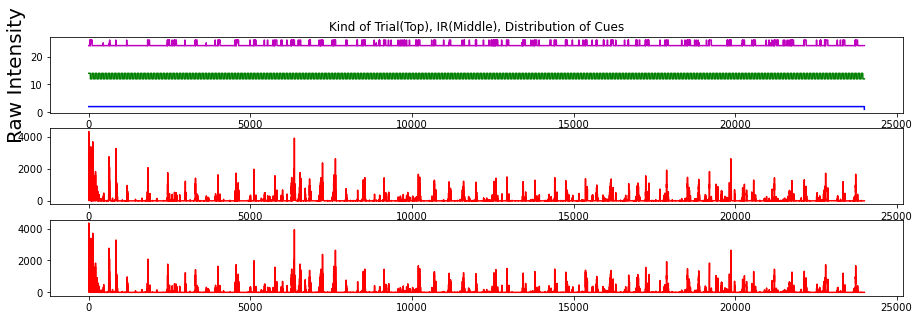

In [31]:
# Plot TimeStamps (Events)


fig = plt_perievent_traces.figure()
ax = fig.add_subplot(3,1 ,1)

plt_perievent_traces.plot(Bin_Motion_Data_df['Light_1']+0, color ='b')
plt_perievent_traces.plot(Bin_Motion_Data_df['Light_2']+10+ 1*Motion_Bin, color ='g')
plt_perievent_traces.plot(Bin_Motion_Data_df['Light_3']+10*2+ 2*Motion_Bin, color ='m')


plt_perievent_traces.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_perievent_traces.ylabel('Raw Intensity', size = 20)
plt_perievent_traces.xlabel('Frame #', size = 20)
plt_perievent_traces.title(('Kind of Trial(Top), IR(Middle), Distribution of Cues'), fontdict=None, loc='center')

ax = fig.add_subplot(3,1 ,2)
plt_perievent_traces.plot(Bin_Motion_Data_df['Motion'], color ='r')

ax = fig.add_subplot(3,1 ,3)
plt_perievent_traces.plot(Bin_Motion_Data_df['Motion_Thresholded'], color ='r')

#plt_perievent_traces.xlim(0, len(Bin_Motion_Data_df))
#plt_perievent_traces.xlim(0, 500)  #Example Trial
#plt_perievent_traces.xlim(5000, 7000)  #Example Trial
plt_perievent_traces.show()


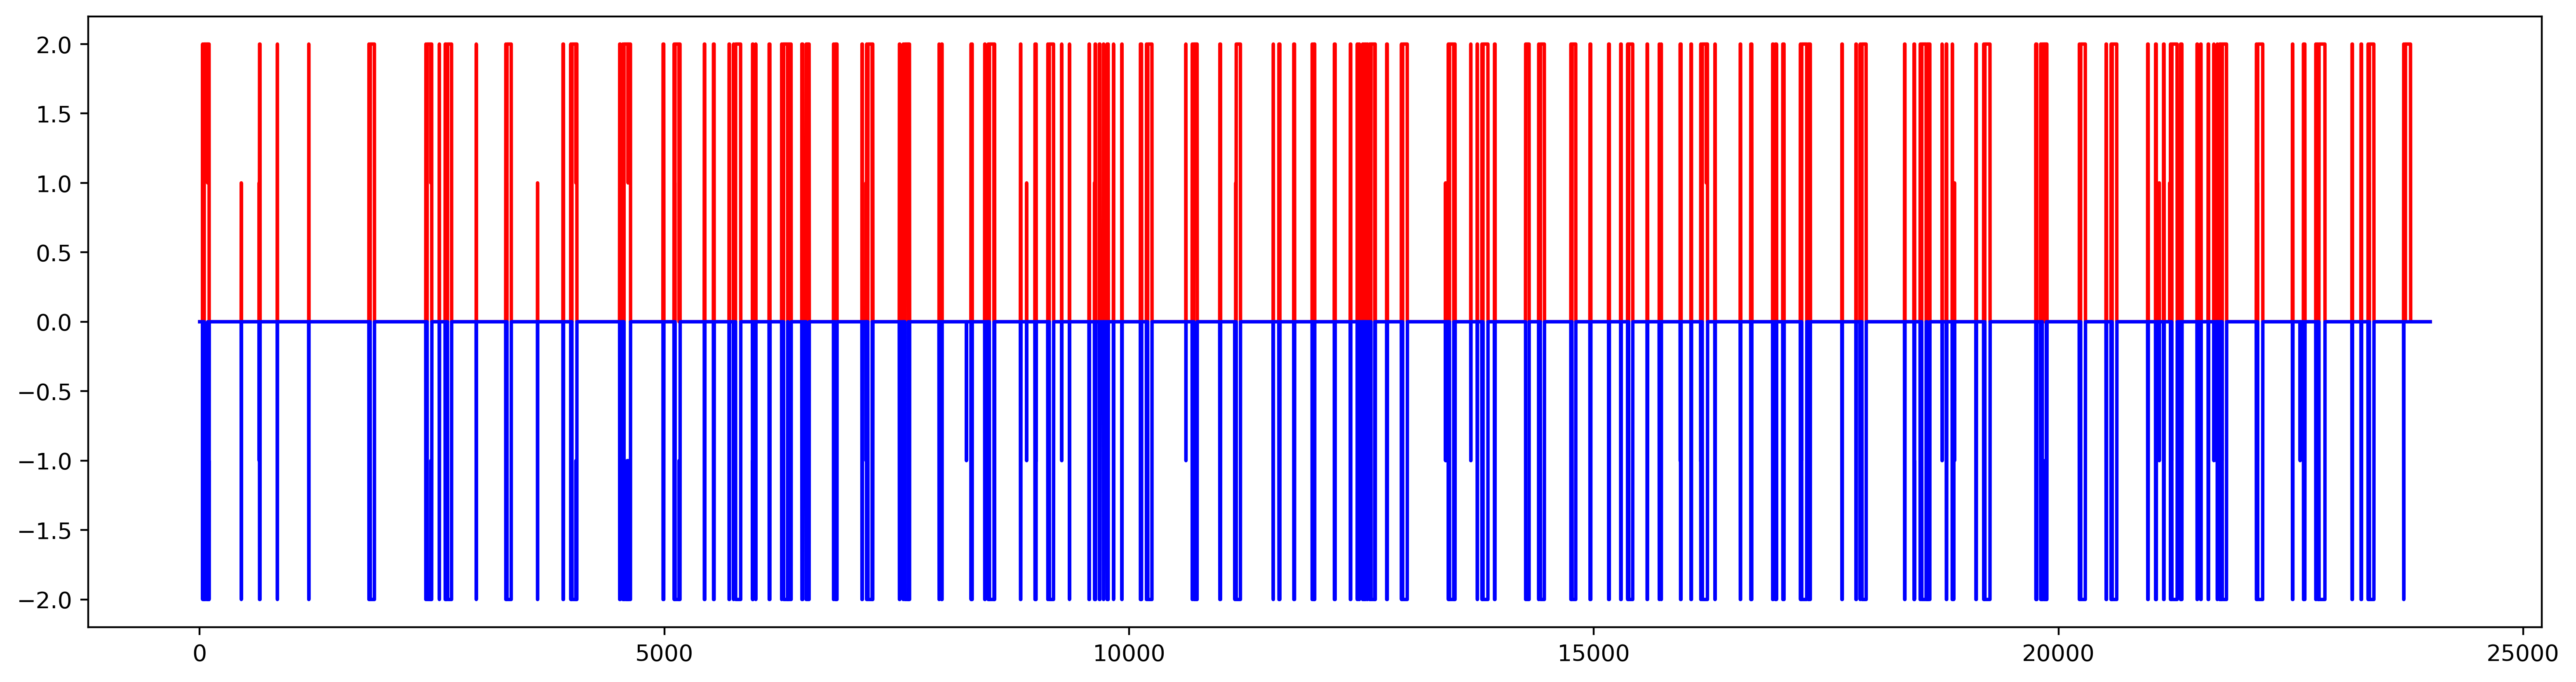

In [32]:
######## Plot Perievent#########

fig = plt_perievent_traces.figure(figsize =(19.2, 10.8), dpi = 400.0) 
ax = fig.add_subplot(2,1 ,1)
plt_perievent_traces.plot(Bin_Motion_Data_df['Light_3'], color ='r')# binned from overhead camera
plt_perievent_traces.plot(Bin_ALL_IR_Data_df*(-1), color ='b')  ## binned from imaging setup 
#plt_perievent_traces.xlim(0,500)
#plt_perievent_traces.title('Binned IR data, (Red = OverHead Camera),  (Blue = Imaging Setup)')
#plt_perievent_traces.xlim(0,100)
#plt_perievent_traces.xlim(2000,2300)
#plt_perievent_traces.xlim(200,600)
#plt_perievent_traces.xlim(1500,2000)

In [33]:
# Calculate Cross Correlation

# Bin_Motion_Data_df['Motion']
# Bin_Motion_Data_df['Motion_Thresholded']

# Bin_Data_ReScaled_df[CellList_raw[0]]

In [34]:
# type(Bin_Motion_Data_df)
# Bin_Motion_Data_df['Motion_Thresholded']

In [35]:
# type(Bin_Data_ReScaled_df)
# Bin_Data_ReScaled_df[CellList_raw[0]]

In [36]:
# cross-correlation
import statsmodels.api as sm
import math

In [37]:
##########################
######. Set 1 of fake data 
from scipy import signal
# Delta Function
length = 100
amp1, amp2 = 1, 1
x = np.arange(0, length)
to = 10
timeshift = 30
t1 = to+timeshift
series1 = signal.unit_impulse(length, idx=to) 
series2 = signal.unit_impulse(length, idx=t1) *3
# low pass filter to smoothen the edges (just to make the signal look pretty)
b, a = signal.butter(4, 0.2)
series1 = signal.lfilter(b, a, series1)
series2 = signal.lfilter(b, a, series2)

Text(0.5, 1.0, 'Cross-Correlation (W/ Signal_One_Ref)')

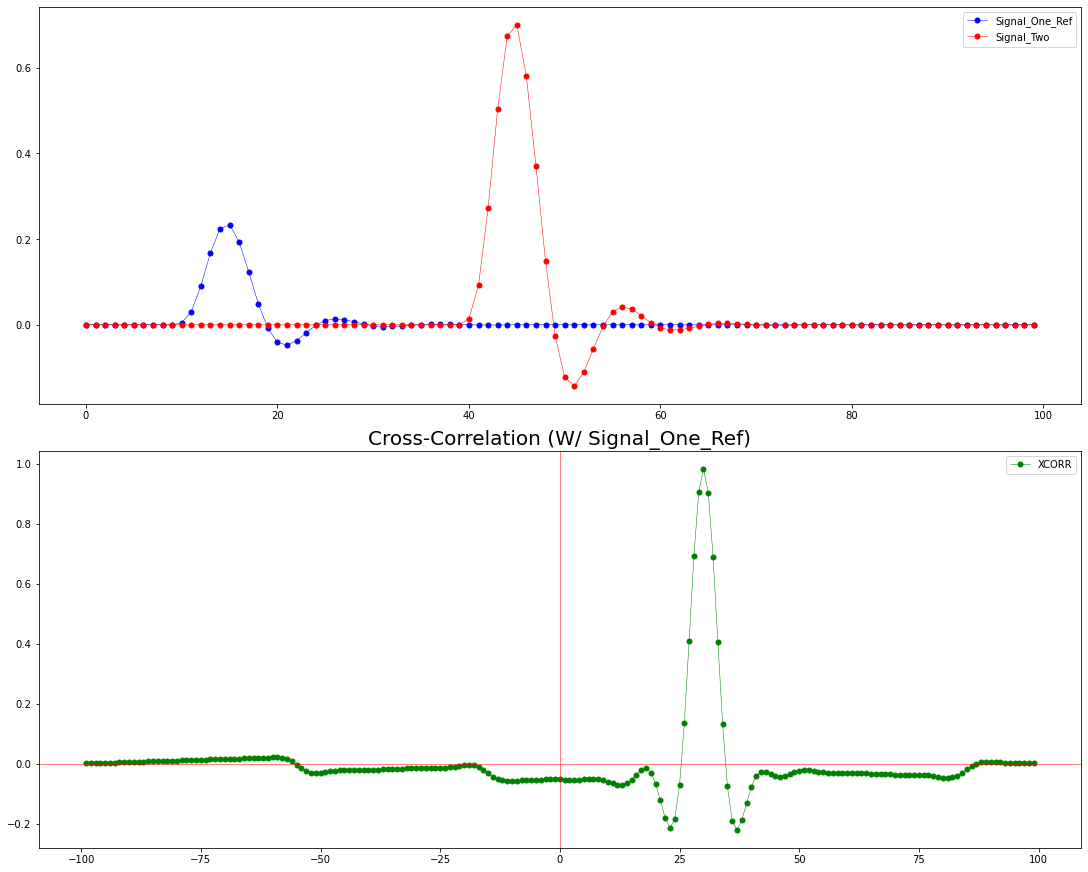

In [38]:
#https://stackoverflow.com/questions/63491991/how-to-use-the-ccf-method-in-the-statsmodels-library
##https://www.statology.org/cross-correlation-in-python/
#https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0


##https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html
#normalize time series so they have the same value range.  
##https://stackoverflow.com/questions/6284676/a-question-on-cross-correlation-correlation-coefficient
##https://online.stat.psu.edu/stat510/lesson/8/8.2



#define data 

Signal_One_Ref = series1
Signal_Two = series2

# Signal_One_Ref = marketing
# Signal_Two = revenue

# Signal_One_Ref = series1_set3
# Signal_Two = series2_set3


fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=False, constrained_layout=True)


ax[0].plot(Signal_One_Ref, c='b', lw=0.5, marker='o', markerfacecolor='blue', markersize=5 , label=f'Signal_One_Ref')
ax[0].plot(Signal_Two, c='r', lw=0.5, marker='o', markerfacecolor='red', markersize=5 , label=f'Signal_Two')
ax[0].legend()




#calculate cross correlation

backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
xx = list(range((-1*len(backwards)+1), len(forwards)))

ax[1].plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
ax[1].axhline(y=0, c='r', lw=0.5)
ax[1].axvline(x=0, c='r', lw=0.5)
ax[1].legend()
ax[1].set_title('Cross-Correlation (W/ Signal_One_Ref)', size = 20)
#ax[1].set_xlim(20,50)


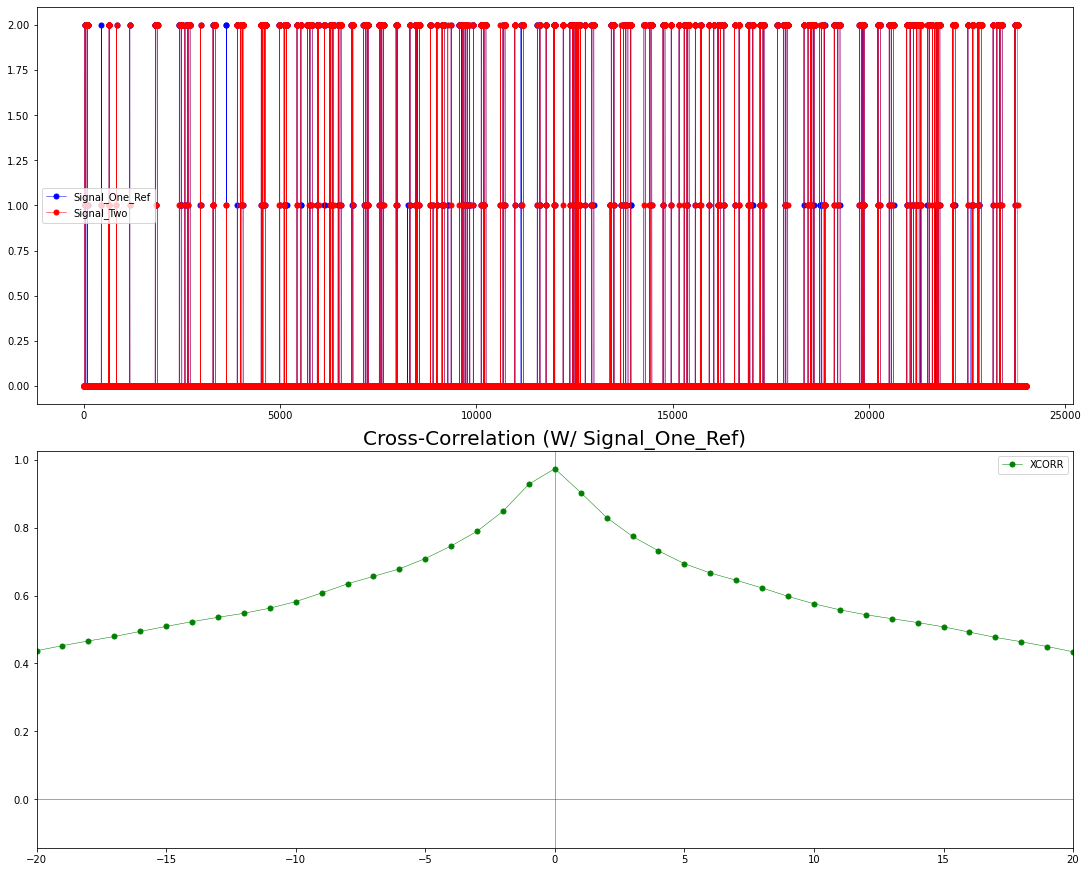

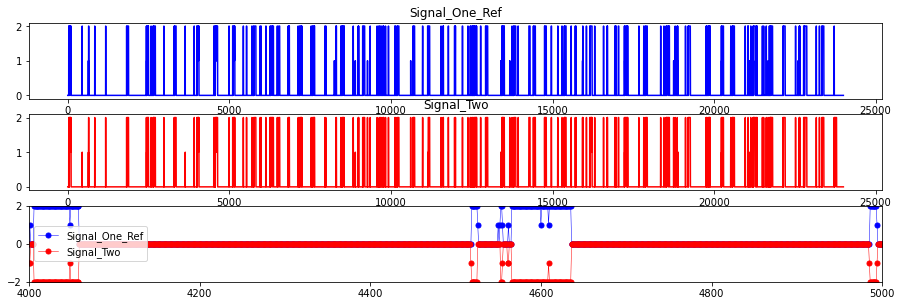

In [39]:
#https://stackoverflow.com/questions/63491991/how-to-use-the-ccf-method-in-the-statsmodels-library
##https://www.statology.org/cross-correlation-in-python/
#https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0


##https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html
#normalize time series so they have the same value range.  
##https://stackoverflow.com/questions/6284676/a-question-on-cross-correlation-correlation-coefficient
##https://online.stat.psu.edu/stat510/lesson/8/8.2




#define data 
# Specific Cell
# Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[18]][200: 600]     #. 3,4,14, 18
# Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][200: 600]

# IR


Signal_One_Ref = Bin_ALL_IR_Data_df[0: len(Bin_Data_ReScaled_df)]  ##binned from imaging setup 
Signal_Two = Bin_Motion_Data_df['Light_3'][0: len(Bin_Data_ReScaled_df)]  # binned from overhead camera

# Signal_One_Ref = Bin_ALL_IR_Data_df[0: 2400]  ##binned from imaging setup 
# Signal_Two = Bin_Motion_Data_df['Light_3'][0: 2400]  # binned from overhead camera

# Signal_One_Ref = marketing
# Signal_Two = revenue

# Signal_One_Ref = series1_set3
# Signal_Two = series2_set3


fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=False, constrained_layout=True)


ax[0].plot(Signal_One_Ref, c='b', lw=0.5, marker='o', markerfacecolor='blue', markersize=5 , label=f'Signal_One_Ref')
ax[0].plot(Signal_Two, c='r', lw=0.5, marker='o', markerfacecolor='red', markersize=5 , label=f'Signal_Two')
ax[0].legend()




#calculate cross correlation

backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
xx = list(range((-1*len(backwards)+1), len(forwards)))

ax[1].plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
ax[1].axhline(y=0, c='r', lw=0.5)
ax[1].axvline(x=0, c='r', lw=0.5)
ax[1].legend()
ax[1].set_title('Cross-Correlation (W/ Signal_One_Ref)', size = 20)
ax[1].set_xlim(-20,20)



#. Plot raw traces separately because the above overlapped signals are hard to read 
fig = plt_perievent_traces.figure()
plt_perievent_traces.subplots_adjust(bottom=0.1, right=2.1, top=1)

ax = fig.add_subplot(3,1 ,1)
plt_perievent_traces.plot(Signal_One_Ref, color ='b')
plt_perievent_traces.title('Signal_One_Ref')

ax = fig.add_subplot(3,1 ,2)
plt_perievent_traces.plot(Signal_Two, color ='r')
plt_perievent_traces.title('Signal_Two')


ax = fig.add_subplot(3,1 ,3)
plt_perievent_traces.plot(Signal_One_Ref, c='b', lw=0.5, marker='o', markerfacecolor='blue', markersize=5 , label=f'Signal_One_Ref')
plt_perievent_traces.plot(Signal_Two*(-1), c='r', lw=0.5, marker='o', markerfacecolor='red', markersize=5 , label=f'Signal_Two')
plt_perievent_traces.legend()
plt_perievent_traces.axis(ymin= -2, ymax=2)
plt_perievent_traces.axis(xmin= 4000, xmax=5000)

#plt_perievent_traces.xlim(0, len(Bin_Motion_Data_df))
#plt_perievent_traces.xlim(0, 500)  #Example Trial
#plt_perievent_traces.xlim(5000, 7000)  #Example Trial
plt_perievent_traces.show()


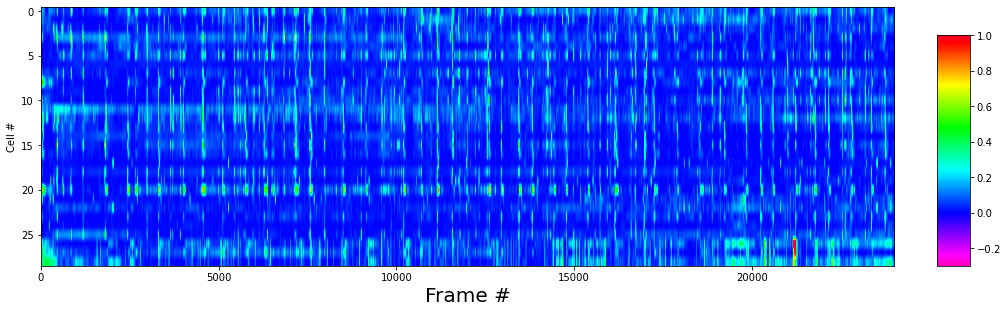

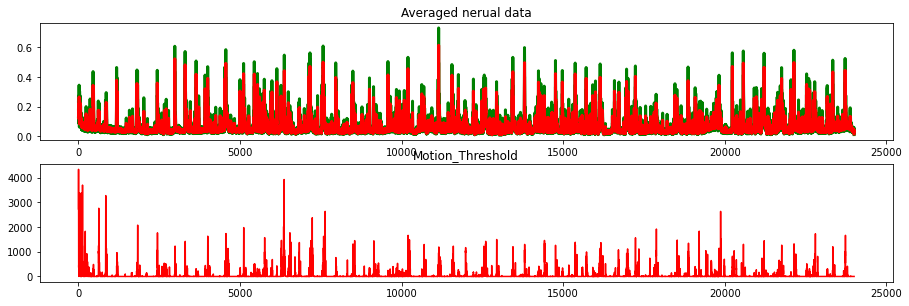

In [40]:
# Plot Scaled Traces,  Full Range (0 to 1), log scale
TransScaledTraces = np.transpose(Bin_Data_ReScaled_df.loc[0:len(ReScaled), CellList_raw])
#plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_yarg, aspect = 'auto')
plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_rainbow_r, aspect = 'auto')
plt_Heat_scaled.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_Heat_scaled.xlabel('Frame #', size = 20)
plt_Heat_scaled.ylabel(('Cell #'), fontdict=None, loc='center')
# Color axis
cax = plt_Heat_scaled.axes([2.2, 0.1, 0.075, 0.8])
#plt_Heat_scaled.yscale('log')
plt_Heat_scaled.clim(-0.3, 1)###############################################################  Set Range for Color
plt_Heat_scaled.colorbar(cax=cax)
plt_Heat_scaled.show()



Trace_Data_For_Analysis= Bin_Data_ReScaled_df.copy()

Mean_Bin_Data_df = Trace_Data_For_Analysis.iloc[:,0:NumofCell_raw].mean(axis=1)  # Calculates mean of bins across cell #***********   Test
SEM_Bin_Data_df = numpy.std(Trace_Data_For_Analysis, ddof=1, axis=1) / numpy.sqrt(NumofCell_raw)  # Stardard error of the mean 

fig = plt_perievent_traces.figure()

plt_perievent_traces.subplots_adjust(bottom=0.1, right=2.1, top=1)

ax = fig.add_subplot(2,1 ,1)


x = np.arange(0,len(Mean_Bin_Data_df)) 
plt_perievent_traces.plot((Mean_Bin_Data_df +SEM_Bin_Data_df ), color ='g', linewidth = 3)    ########### Plot Averages of wave Error Shading
plt_perievent_traces.plot((Mean_Bin_Data_df -SEM_Bin_Data_df ), color ='g', linewidth = 3)    ########### Plot Averages of wave Error Shading
ax.fill_between(x, (Mean_Bin_Data_df +SEM_Bin_Data_df ), (Mean_Bin_Data_df -SEM_Bin_Data_df ), color='green', alpha=1)

plt_perievent_traces.plot(Mean_Bin_Data_df, color ='r', linewidth = 3)    ########### Plot Averages of wave
plt_perievent_traces.title('Averaged nerual data')
#plt_perievent_traces.xlim(250,300)

ax = fig.add_subplot(2,1 ,2)
plt_perievent_traces.plot(Bin_Motion_Data_df['Motion_Thresholded'], color ='r')
plt_perievent_traces.title('Motion_Threshold')
#plt_perievent_traces.xlim(250,300)

plt_perievent_traces.show()

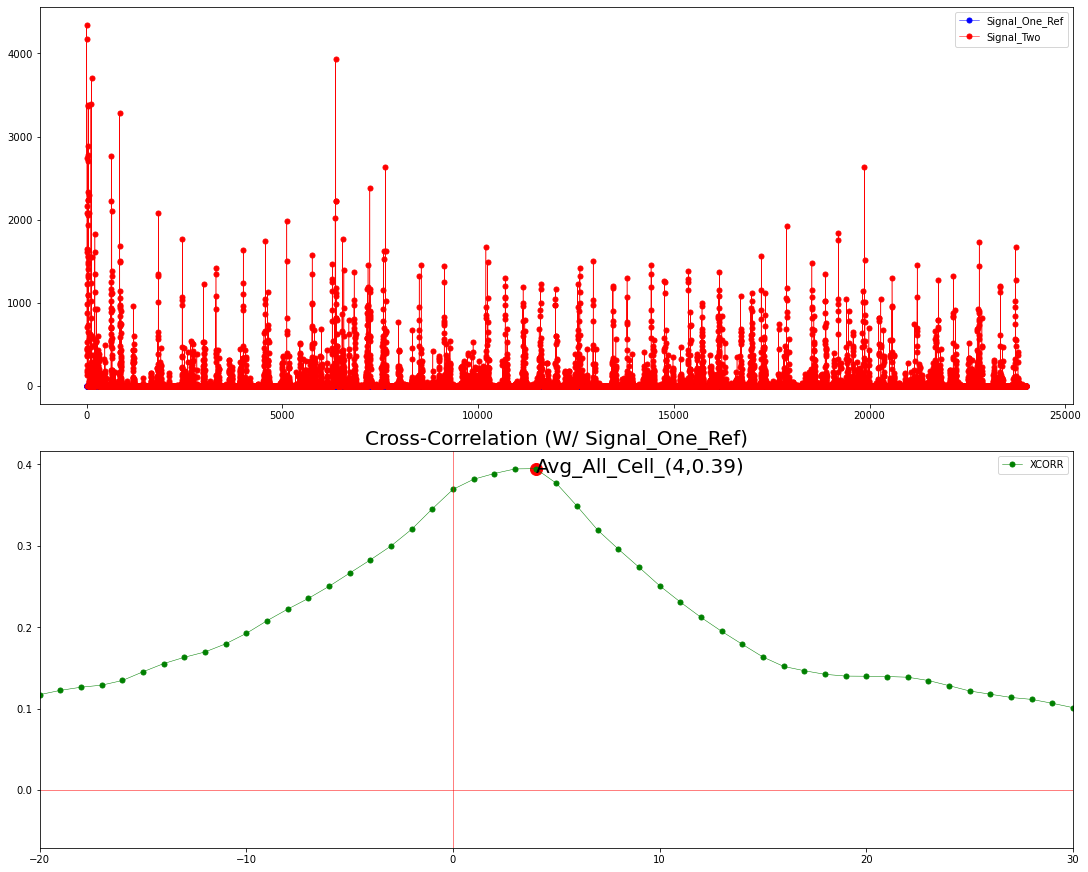

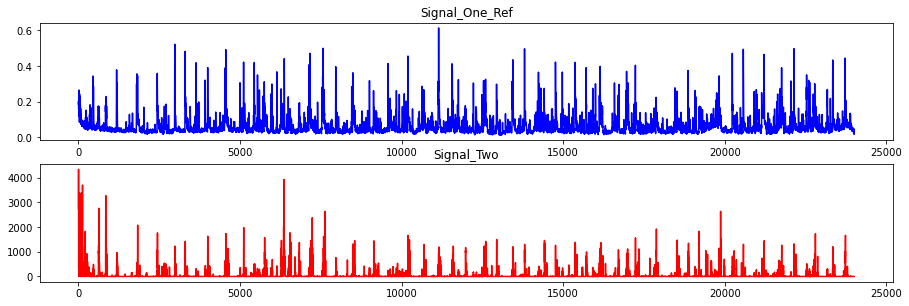

In [41]:
#https://stackoverflow.com/questions/63491991/how-to-use-the-ccf-method-in-the-statsmodels-library
##https://www.statology.org/cross-correlation-in-python/
#https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0


##https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html
#normalize time series so they have the same value range.  
##https://stackoverflow.com/questions/6284676/a-question-on-cross-correlation-correlation-coefficient
##https://online.stat.psu.edu/stat510/lesson/8/8.2




#define data 
#Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[3]][200: 600]
#Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[3]][200: 600]
# Signal_One_Ref = Mean_Bin_Data_df[200: 600]
# Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][200: 600]



Signal_One_Ref = Mean_Bin_Data_df[0: len(Bin_Data_ReScaled_df)]
Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]

# Signal_One_Ref = Mean_Bin_Data_df[0: 2400]
# Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]



fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=False, constrained_layout=True)


ax[0].plot(Signal_One_Ref, c='b', lw=0.5, marker='o', markerfacecolor='blue', markersize=5 , label=f'Signal_One_Ref')
ax[0].plot(Signal_Two, c='r', lw=0.5, marker='o', markerfacecolor='red', markersize=5 , label=f'Signal_Two')
ax[0].legend()



#calculate cross correlation

backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
Avg_Cell_ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
Avg_Cell_xx = list(range((-1*len(backwards)+1), len(forwards)))


# Calculate cross correlation metrics 
Avg_Cell_peak_amp = np.amax(Avg_Cell_ccf_output)
Position = numpy.where(Avg_Cell_ccf_output == numpy.amax(Avg_Cell_ccf_output))   #
Avg_Cell_zNormalized_Peak_amp = (Avg_Cell_peak_amp- np.mean(Avg_Cell_ccf_output))/np.std(Avg_Cell_ccf_output)
Avg_Cell_Peak_Latency = Position[0][0]-len(backwards)+1

ax[1].plot(Avg_Cell_Peak_Latency, Avg_Cell_peak_amp, 'ro', markersize=12)  # add markers to highlight maximum point
ax[1].plot(Avg_Cell_xx,Avg_Cell_ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
Avg_Cell_temp_x = np.round(Avg_Cell_Peak_Latency,2)
Avg_Cell_temp_y = np.round(Avg_Cell_peak_amp,2)
ax[1].annotate('Avg_All_Cell_'+ '('+ str(Avg_Cell_temp_x)+',' +str(Avg_Cell_temp_y) + ')', (Avg_Cell_temp_x,Avg_Cell_temp_y), fontsize = 20)




ax[1].axhline(y=0, c='r', lw=0.5)
ax[1].axvline(x=0, c='r', lw=0.5)
ax[1].legend()
ax[1].set_title('Cross-Correlation (W/ Signal_One_Ref)', size = 20)
ax[1].set_xlim(-20,30)


# ax.plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ro', markersize=12)  # add markers to highlight maximum point
# ax.plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
# temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
# temp_y = np.round(CrossCorrelateMatrics['Peak_Amplitude(r)'][i],2)
# ax.annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 20)







#. Plot raw traces separately because the above overlapped signals are hard to read 
fig = plt_perievent_traces.figure()
plt_perievent_traces.subplots_adjust(bottom=0.1, right=2.1, top=1)

ax = fig.add_subplot(2,1 ,1)
plt_perievent_traces.plot(Signal_One_Ref, color ='b')
plt_perievent_traces.title('Signal_One_Ref')

ax = fig.add_subplot(2,1 ,2)
plt_perievent_traces.plot(Signal_Two, color ='r')
plt_perievent_traces.title('Signal_Two')

#plt_perievent_traces.xlim(0, len(Bin_Motion_Data_df))
#plt_perievent_traces.xlim(0, 500)  #Example Trial
#plt_perievent_traces.xlim(5000, 7000)  #Example Trial
plt_perievent_traces.show()


In [42]:
#. Extract cross-correlation features from all cells (Individually)

CrossCorrelateMatrics_Column_Label = [ 'Cell', 'Peak_Amplitude(r)', 'Z_Normalized_Peak_Amplitude', 'NumOfMaxPeak', 'Peak_Latency', 'x_Position']
CrossCorrelateMatrics = defaultdict(list)

for i in range(len(CrossCorrelateMatrics_Column_Label)):
    CrossCorrelateMatrics[CrossCorrelateMatrics_Column_Label[i]].append(None) 

for i in range (NumofCell_raw):
    
    
    
    Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[i]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]
    
    #Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[i]][0: 2400]     #. 3,4,14, 18
    #Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]

    # Calculates cross correlations
    backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
    forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
    ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
    xx = list(range((-1*len(backwards)+1), len(forwards)))
    
    # Calculate cross correlation metrics 
    peak_amp = np.amax(ccf_output)
    Position = numpy.where(ccf_output == numpy.amax(ccf_output))   #
    zNormalized_Peak_amp = (peak_amp- np.mean(ccf_output))/np.std(ccf_output)
    
    
    # assign cross correaltion metrics 
    CrossCorrelateMatrics['Cell'].append(CellList_raw[i])
    CrossCorrelateMatrics['Peak_Amplitude(r)'].append(peak_amp)
    CrossCorrelateMatrics['Z_Normalized_Peak_Amplitude'].append([zNormalized_Peak_amp])
    CrossCorrelateMatrics['NumOfMaxPeak'].append(len(Position[0]))
    CrossCorrelateMatrics['Peak_Latency'].append([Position[0][0]-len(backwards)+1])
    CrossCorrelateMatrics['x_Position'].append([Position[0][0]])
    
# #  Remove 'None' place holder for Event_Count_TimeStamp, whihc is the first value
for i in range(len(CrossCorrelateMatrics_Column_Label)):
    del CrossCorrelateMatrics[CrossCorrelateMatrics_Column_Label[i]][0]

#print(CrossCorrelateMatrics)

CrossCorrelateMatrics_ReScaled = CrossCorrelateMatrics 

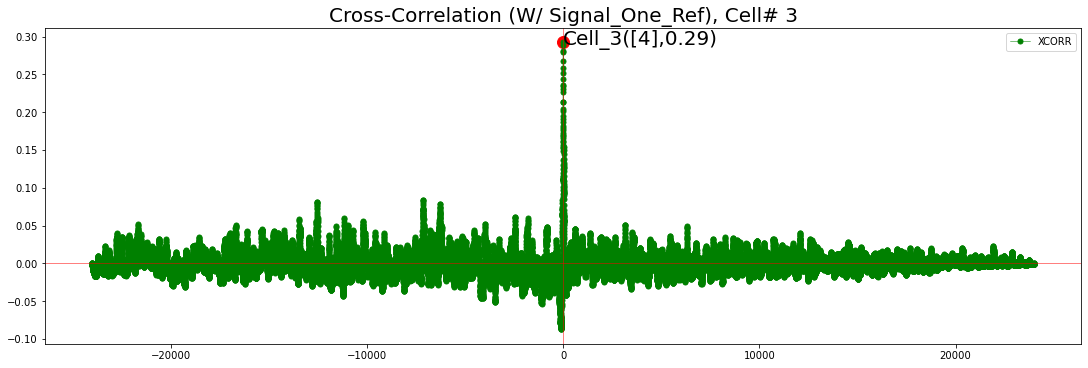

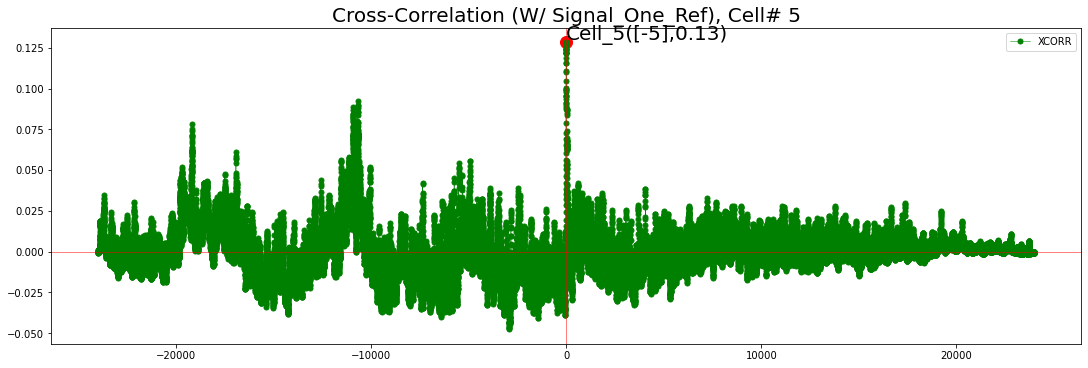

In [43]:
# Plot Cross correlation for all cells


#for i in range (NumofCell_raw):
for i in range(2):
    
    
    #fig, ax = plt.subplots(1, 1, figsize=(15, 12), sharex=False, constrained_layout=True)
    fig, ax = plt.subplots(1,1, figsize=(15, 5), sharex=False, constrained_layout=True)
    #calculate cross correlation
    # Loop Cross Correlation for all the Cells
    
    
    Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[i]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]

    #Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[i]][0: 2400]     #. 3,4,14, 18
    #Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]

    backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
    forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
    ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
    xx = list(range((-1*len(backwards)+1), len(forwards)))
    
    ax.plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ro', markersize=12)  # add markers to highlight maximum point
    ax.plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
    temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
    temp_y = np.round(CrossCorrelateMatrics['Peak_Amplitude(r)'][i],2)
    ax.annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 20)
    
    ax.axhline(y=0, c='r', lw=0.5)
    ax.axvline(x=0, c='r', lw=0.5)
    ax.legend()
    ax.set_title('Cross-Correlation (W/ Signal_One_Ref), Cell# '+ CellList_raw[i], size = 20)
    #ax.set_xlim(-10,20)
    



Text(0.5, 1.0, 'Z_Normalized_Correlation Coefficient (r) as a function of Lag Between Signals')

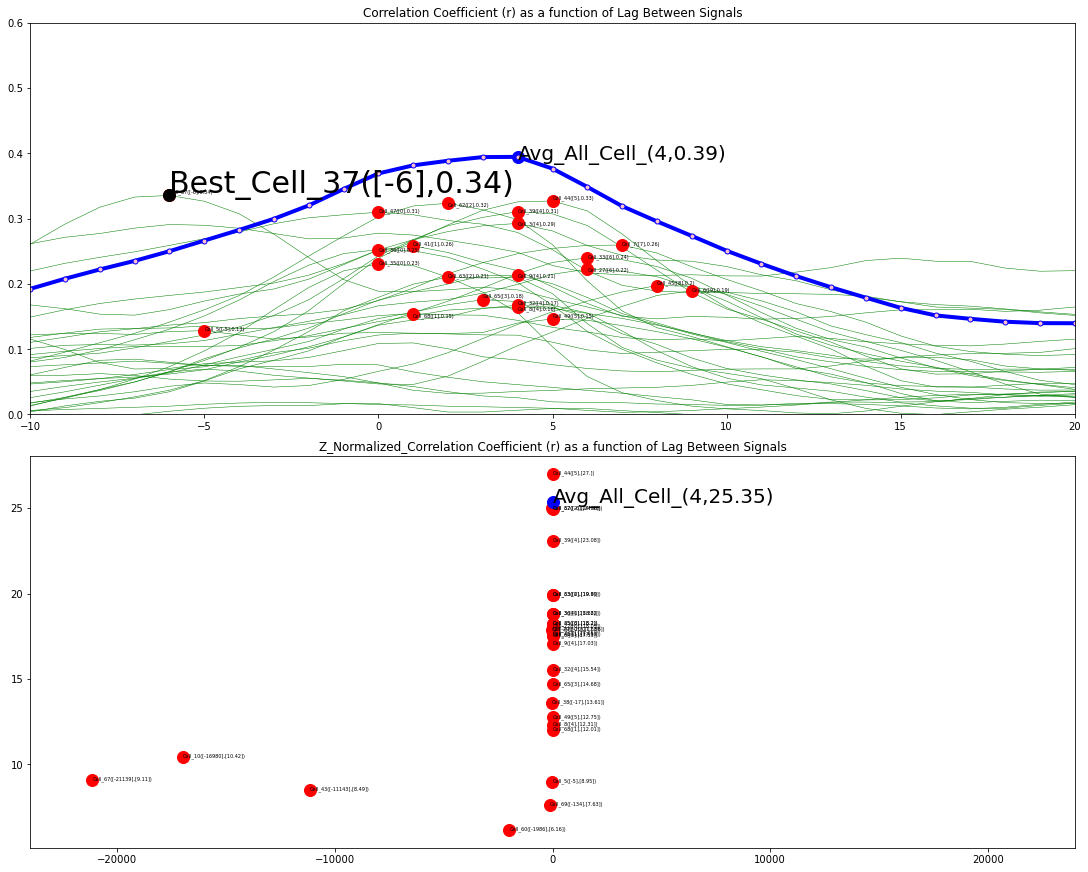

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=False, constrained_layout=True)

# plot cross correlation traces

for i in range (NumofCell_raw):
    
    Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[i]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]
    
    #Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[i]][0: 2400]     #. 3,4,14, 18
    #Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]

    backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
    forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
    ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
    xx = list(range((-1*len(backwards)+1), len(forwards)))
    ax[0].plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=0.005, label=f'XCORR')
    
    
# plot correlation coefficient(r) vs Lag (All Cells)
for i in range (NumofCell_raw):
    ax[0].plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ro', markersize=12)  # add markers to highlight maximum point
    temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
    temp_y = np.round(CrossCorrelateMatrics['Peak_Amplitude(r)'][i],2)
    ax[0].annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 5)
    
    # Annotate cell with the largest correaltion coefficient
    if(CrossCorrelateMatrics['Peak_Amplitude(r)'][i] == np.max(CrossCorrelateMatrics['Peak_Amplitude(r)'])):
        ax[0].plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ko', markersize=12) 
        ax[0].annotate('Best_Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 30)

# plot correlation coefficient(r) vs Lag (Averaged of All Cells)
ax[0].plot(Avg_Cell_Peak_Latency, Avg_Cell_peak_amp, 'bo', markersize=12)  # add markers to highlight maximum point
ax[0].plot(Avg_Cell_xx,Avg_Cell_ccf_output, c='b', lw=4, marker='o', markerfacecolor='pink', markersize=5, label=f'XCORR')
Avg_Cell_temp_x = np.round(Avg_Cell_Peak_Latency,2)
Avg_Cell_temp_y = np.round(Avg_Cell_peak_amp,2)
ax[0].annotate('Avg_All_Cell_'+ '('+ str(Avg_Cell_temp_x)+',' +str(Avg_Cell_temp_y) + ')', (Avg_Cell_temp_x,Avg_Cell_temp_y), fontsize = 20)
        

ax[0].set_xlim(np.min(xx),np.max(xx))
ax[0].set_ylim(0,0.6)
ax[0].set_xlim(-10,20)
ax[0].set_title('Correlation Coefficient (r) as a function of Lag Between Signals')

# plot z-normalize correlation coefficient(r) vs Lag (All Cells)
for i in range (NumofCell_raw):
    ax[1].plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Z_Normalized_Peak_Amplitude'][i], 'ro', markersize=12)  # add markers to highlight maximum point
    temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
    temp_y = np.round(CrossCorrelateMatrics['Z_Normalized_Peak_Amplitude'][i],2)
    ax[1].annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 5)

# plot z-normalize correlation coefficient(r) vs Lag (Averaged of All Cells)
ax[1].plot(Avg_Cell_Peak_Latency, Avg_Cell_zNormalized_Peak_amp, 'bo', markersize=12)  # add markers to highlight maximum point
temp_x = np.round(Avg_Cell_Peak_Latency,2)
temp_y = np.round(Avg_Cell_zNormalized_Peak_amp,2)
ax[1].annotate('Avg_All_Cell_'+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 20)

ax[1].set_xlim(np.min(xx),np.max(xx))
#ax[1].set_xlim(-10,20)
ax[1].set_title('Z_Normalized_Correlation Coefficient (r) as a function of Lag Between Signals')





In [45]:
# Simple correlation

#https://realpython.com/numpy-scipy-pandas-correlation-python/
import scipy.stats

x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])

Pearson_r, p_value = scipy.stats.pearsonr(x, y)

print(x)
print(y)
print(Pearson_r)
print(p_value)

[10 11 12 13 14 15 16 17 18 19]
[ 2  1  4  5  8 12 18 25 96 48]
0.7586402890911869
0.010964341301680832


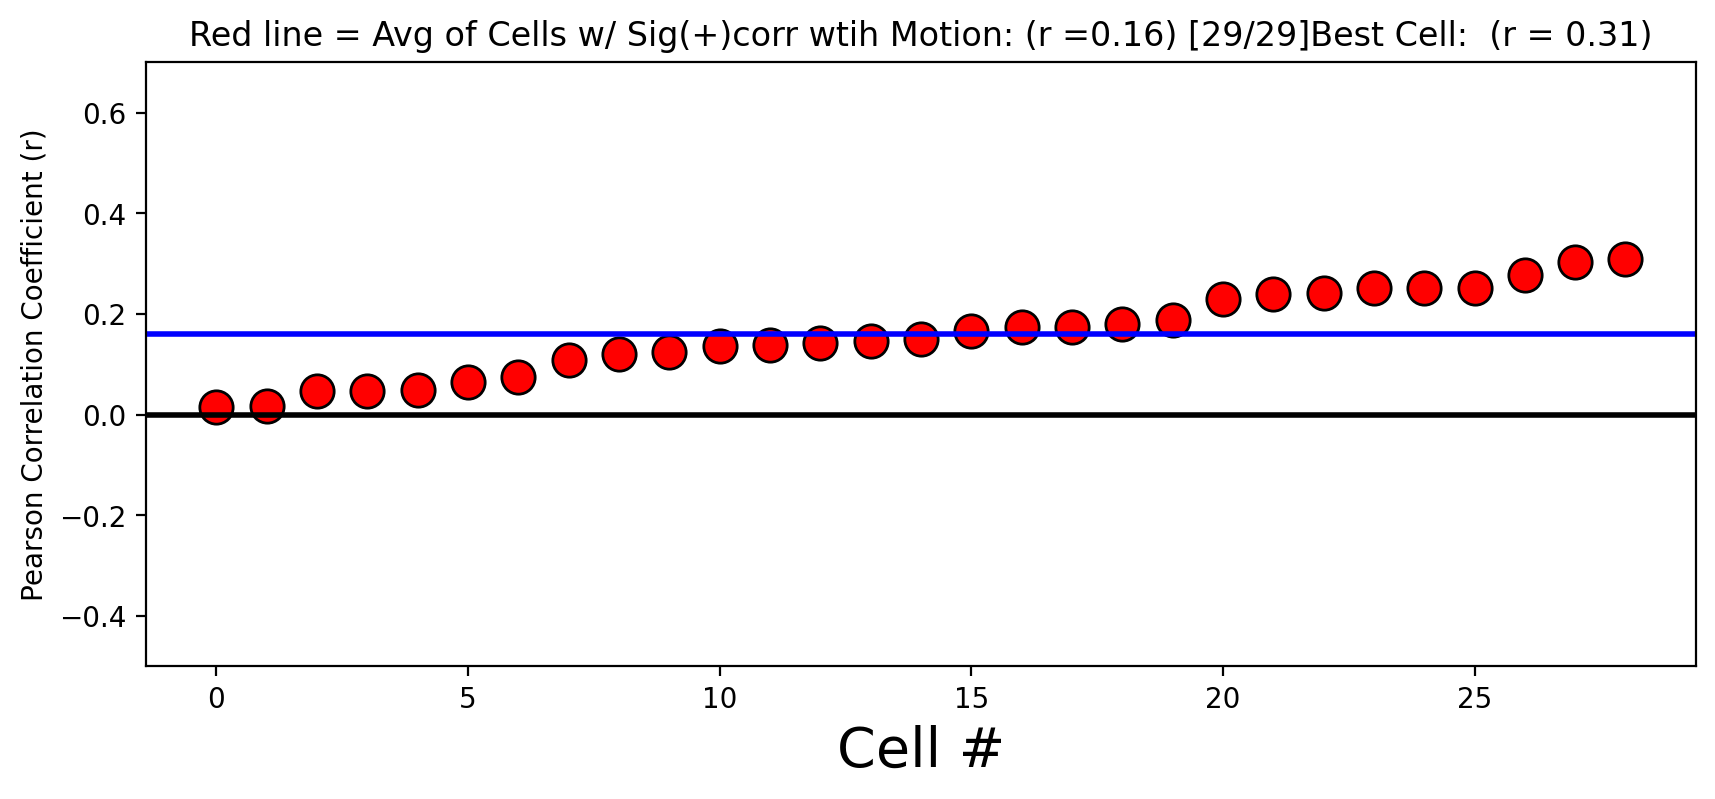

Motion Bin:  2
Cell Bin:  2


In [46]:
#####################################################################################################
#. Re-order cell list to asending orders of pearsons correlation coefficient (row 1) or p-value (row 2)

order_setting = 1   #. 1 for organizing by perason's correlation coefficient (r)

#######################
All_Correlation_sum = 0   # for calculating the average correlation of all cells regarldess significance 
Sig_Correlation_sum = 0   # for calculating the average correlation of only signfiicantly positive cells 

Sig_P_value_count = 0
Non_Sig_P_value_count = 0

Cell_Pearson_Correlation =  defaultdict(list)

for ii in range(NumofCell_raw):
    
    #Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[ii]][0: len(Bin_Data_Binary_df)]
    Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[ii]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]
    
    Pearson_r, p_value = scipy.stats.pearsonr(Signal_One_Ref, Signal_Two)
    

    Cell_Pearson_Correlation[CellList_raw[ii]].append(Pearson_r)
    Cell_Pearson_Correlation[CellList_raw[ii]].append(p_value)
    
    
    All_Correlation_sum= All_Correlation_sum + Pearson_r
    
    # only for significant and postively correlated (w/ behavior) cells.  
    if((p_value < 0.05)& (Pearson_r > 0)):
        Sig_P_value_count = Sig_P_value_count+1
        Sig_Correlation_sum= Sig_Correlation_sum + Pearson_r
    else:
        Non_Sig_P_value_count = Non_Sig_P_value_count+1



ReOrdered_Cell_Pearson_Correlation = dict(sorted(Cell_Pearson_Correlation.items(), key=lambda item: item[order_setting]))

CellList_ReOrdered = list(ReOrdered_Cell_Pearson_Correlation.keys())

Cell_Pearson_Correlation['Avg_Correlation_All'].append(All_Correlation_sum/NumofCell_raw) #average correlation of all cells regarldess significance 

if(Sig_P_value_count>0):
    Cell_Pearson_Correlation['Avg_Correlation_Sig'].append(Sig_Correlation_sum/Sig_P_value_count) #average correlation of only signfiicant cells 
else:
    Cell_Pearson_Correlation['Avg_Correlation_Sig'].append(0) #No significant cells, not correlated   
#######################################################################################
# Plotting 

fig = plt_raw.figure(figsize =(10, 4), dpi = 200.0)
x_values = list(range(0,NumofCell_deconv))


y_Correlation =[]
y_P_value =[]

for ii in range(NumofCell_raw):

    y_Correlation.append(Cell_Pearson_Correlation[CellList_ReOrdered[ii]][0])  # Asending order
    y_P_value.append(Cell_Pearson_Correlation[CellList_ReOrdered[ii]][1])  # Asending order

for ii in range(NumofCell_raw): 
    if(y_P_value[ii]<0.05):   #color code based on significance
        plt_raw.plot(x_values[ii], y_Correlation[ii], color = 'red', marker='o', markerfacecolor='red', markeredgecolor='black' , markersize=12)
    else:
        plt_raw.plot(x_values[ii], y_Correlation[ii], color = 'grey', marker='o', markerfacecolor='grey' ,markeredgecolor='black', markersize=12)
#plt_raw.axhline(y=Cell_Pearson_Correlation['Avg_Correlation_All'][0], c = 'pink', lw=2)
plt_raw.axhline(y=Cell_Pearson_Correlation['Avg_Correlation_Sig'][0], c = 'blue', lw=2)

plt_raw.axhline(y=0, c = 'black', lw=2)


#plt_raw.legend(loc ="upper left", fontsize = 15)
#plt_raw.subplots_adjust(bottom=0.1, right=2, top=2)
plt_raw.ylabel('Pearson Correlation Coefficient (r)', size = 10)
plt_raw.xlabel('Cell #', size = 20)
plt_raw.title('Red line = Avg of Cells w/ Sig(+)corr wtih Motion: (r =' + str(round(Cell_Pearson_Correlation['Avg_Correlation_Sig'][0], 3)) + ') '
              + '[' + str(Sig_P_value_count)  + '/'+ str(NumofCell_raw) +
              ']' +  'Best Cell:  (r = '+ str(round(y_Correlation[NumofCell_deconv -1],3 )) + ')')
#plt_raw.xlim(0,5)
plt_raw.ylim(-0.5,0.7)


#filename =  File_Name.split(".")[0] +'_'+ 'Correlation_By_Cell' + '.jpg'
#savefilename = os.path.join(Save_Path, filename)
#plt_raw.savefig(savefilename)
plt_raw.show()
#plt_perievent_traces.close()


# print(Cell_Pearson_Correlation['Avg_Correlation_All'][0] )
# print(Cell_Pearson_Correlation['Avg_Correlation_Sig'][0])
print('Motion Bin: ', Motion_Bin)
print('Cell Bin: ', Bin)


In [47]:

Temp_Corr_R =str(round((Cell_Pearson_Correlation[CellList_raw[2]][0]),3))
print(Temp_Corr_R)

Temp_Corr_P_Value =str(round((Cell_Pearson_Correlation[CellList_raw[2]][1]),3))
print(Temp_Corr_P_Value)


Cell_Pearson_Correlation

0.047
0.0


defaultdict(list,
            {'3': [0.2519624609516933, 0.0],
             '5': [0.1255585925215022, 6.326866290186582e-85],
             '6': [0.0467524652211385, 4.2737359257355503e-13],
             '7': [0.1744401443321767, 2.6901616099549818e-163],
             '8': [0.14232219144613675, 8.233493480080023e-109],
             '9': [0.17519171918209728, 1.035966869036117e-164],
             '10': [0.04821600024572743, 7.796849888388575e-14],
             '27': [0.16642926268686617, 1.277837970866366e-148],
             '29': [0.2778290787435396, 0.0],
             '32': [0.13673074120840573, 1.6814992343851494e-100],
             '33': [0.13764687191862368, 7.72209677185455e-102],
             '35': [0.23098109815756918, 4.174787165322167e-288],
             '36': [0.25262809084774646, 0.0],
             '37': [0.18877533746195183, 2.1600758255007998e-191],
             '38': [0.10880251341097492, 4.112871418948042e-64],
             '39': [0.24290715460235415, 2.4733e-319],
      

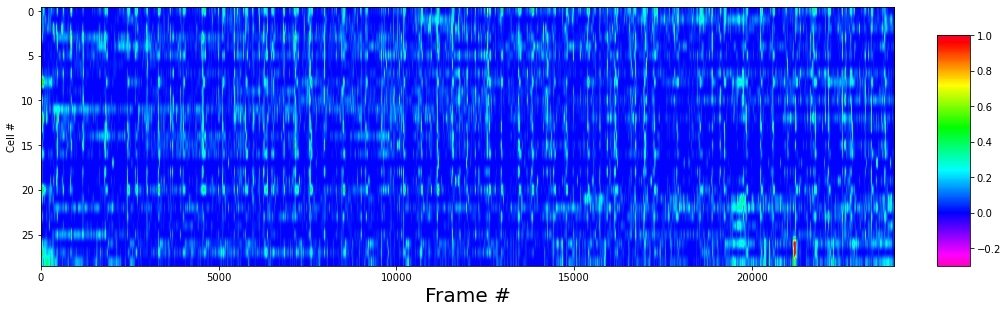

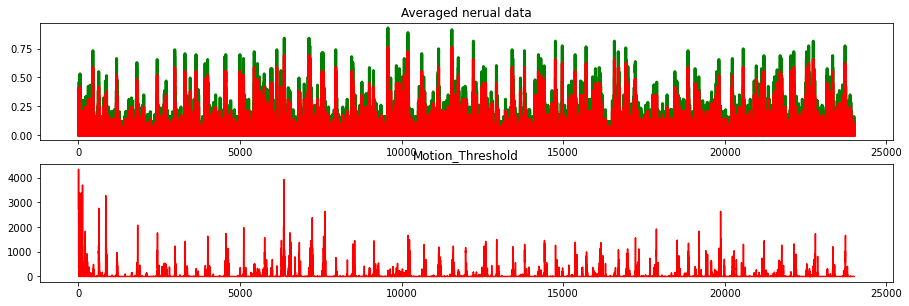

In [48]:
# Plot Scaled Traces,  Full Range (0 to 1), log scale
TransScaledTraces = np.transpose(Bin_Data_Binary_df.loc[0:len(Binary), CellList_deconv])
#plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_yarg, aspect = 'auto')
plt_Heat_scaled.imshow(TransScaledTraces, cmap=plt_Heat_scaled.cm.gist_rainbow_r, aspect = 'auto')
plt_Heat_scaled.subplots_adjust(bottom=0.1, right=2.1, top=1)
plt_Heat_scaled.xlabel('Frame #', size = 20)
plt_Heat_scaled.ylabel(('Cell #'), fontdict=None, loc='center')
# Color axis
cax = plt_Heat_scaled.axes([2.2, 0.1, 0.075, 0.8])
#plt_Heat_scaled.yscale('log')
plt_Heat_scaled.clim(-0.3, 1)###############################################################  Set Range for Color
plt_Heat_scaled.colorbar(cax=cax)
plt_Heat_scaled.show()



Trace_Data_For_Analysis= Bin_Data_Binary_df.copy()

Mean_Bin_Data_df = Trace_Data_For_Analysis.iloc[:,0:NumofCell_deconv].mean(axis=1)  # Calculates mean of bins across cell #***********   Test
SEM_Bin_Data_df = numpy.std(Trace_Data_For_Analysis, ddof=1, axis=1) / numpy.sqrt(NumofCell_deconv)  # Stardard error of the mean 

fig = plt_perievent_traces.figure()

plt_perievent_traces.subplots_adjust(bottom=0.1, right=2.1, top=1)

ax = fig.add_subplot(2,1 ,1)


x = np.arange(0,len(Mean_Bin_Data_df)) 
plt_perievent_traces.plot((Mean_Bin_Data_df +SEM_Bin_Data_df ), color ='g', linewidth = 3)    ########### Plot Averages of wave Error Shading
plt_perievent_traces.plot((Mean_Bin_Data_df -SEM_Bin_Data_df ), color ='g', linewidth = 3)    ########### Plot Averages of wave Error Shading
ax.fill_between(x, (Mean_Bin_Data_df +SEM_Bin_Data_df ), (Mean_Bin_Data_df -SEM_Bin_Data_df ), color='green', alpha=1)

plt_perievent_traces.plot(Mean_Bin_Data_df, color ='r', linewidth = 3)    ########### Plot Averages of wave
plt_perievent_traces.title('Averaged nerual data')
#plt_perievent_traces.xlim(250,300)

ax = fig.add_subplot(2,1 ,2)
plt_perievent_traces.plot(Bin_Motion_Data_df['Motion_Thresholded'], color ='r')
plt_perievent_traces.title('Motion_Threshold')
#plt_perievent_traces.xlim(250,300)

plt_perievent_traces.show()

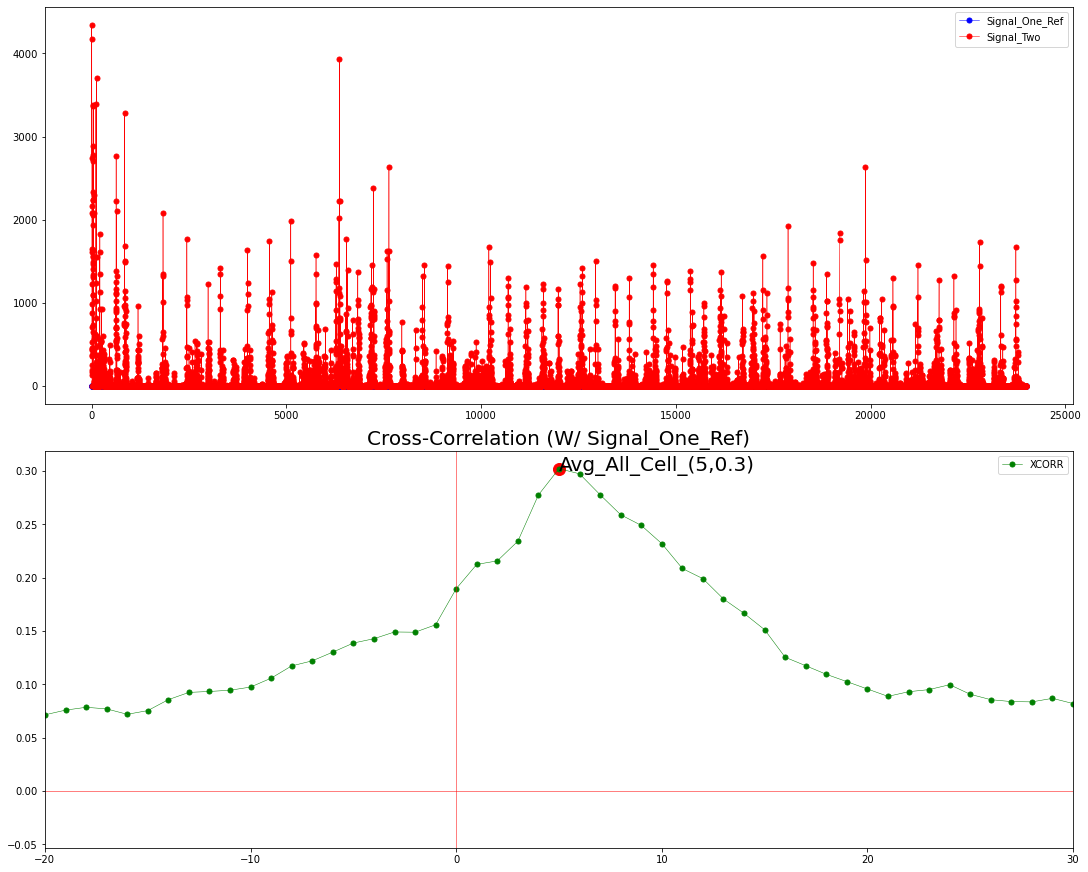

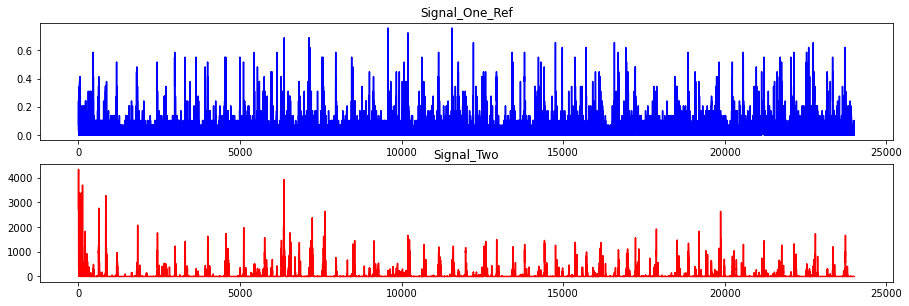

In [49]:
#https://stackoverflow.com/questions/63491991/how-to-use-the-ccf-method-in-the-statsmodels-library
##https://www.statology.org/cross-correlation-in-python/
#https://towardsdatascience.com/computing-cross-correlation-between-geophysical-time-series-488642be7bf0


##https://anomaly.io/understand-auto-cross-correlation-normalized-shift/index.html
#normalize time series so they have the same value range.  
##https://stackoverflow.com/questions/6284676/a-question-on-cross-correlation-correlation-coefficient
##https://online.stat.psu.edu/stat510/lesson/8/8.2




#define data 
#Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[3]][200: 600]
#Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[3]][200: 600]
# Signal_One_Ref = Mean_Bin_Data_df[200: 600]
# Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][200: 600]




Signal_One_Ref = Mean_Bin_Data_df[0: len(Bin_Data_ReScaled_df)]
Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]

# Signal_One_Ref = Mean_Bin_Data_df[0: 2400]
# Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]



fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=False, constrained_layout=True)


ax[0].plot(Signal_One_Ref, c='b', lw=0.5, marker='o', markerfacecolor='blue', markersize=5 , label=f'Signal_One_Ref')
ax[0].plot(Signal_Two, c='r', lw=0.5, marker='o', markerfacecolor='red', markersize=5 , label=f'Signal_Two')
ax[0].legend()



#calculate cross correlation

backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
Avg_Cell_ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
Avg_Cell_xx = list(range((-1*len(backwards)+1), len(forwards)))


# Calculate cross correlation metrics 
Avg_Cell_peak_amp = np.amax(Avg_Cell_ccf_output)
Position = numpy.where(Avg_Cell_ccf_output == numpy.amax(Avg_Cell_ccf_output))   #
Avg_Cell_zNormalized_Peak_amp = (Avg_Cell_peak_amp- np.mean(Avg_Cell_ccf_output))/np.std(Avg_Cell_ccf_output)
Avg_Cell_Peak_Latency = Position[0][0]-len(backwards)+1

ax[1].plot(Avg_Cell_Peak_Latency, Avg_Cell_peak_amp, 'ro', markersize=12)  # add markers to highlight maximum point
ax[1].plot(Avg_Cell_xx,Avg_Cell_ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
Avg_Cell_temp_x = np.round(Avg_Cell_Peak_Latency,2)
Avg_Cell_temp_y = np.round(Avg_Cell_peak_amp,2)
ax[1].annotate('Avg_All_Cell_'+ '('+ str(Avg_Cell_temp_x)+',' +str(Avg_Cell_temp_y) + ')', (Avg_Cell_temp_x,Avg_Cell_temp_y), fontsize = 20)




ax[1].axhline(y=0, c='r', lw=0.5)
ax[1].axvline(x=0, c='r', lw=0.5)
ax[1].legend()
ax[1].set_title('Cross-Correlation (W/ Signal_One_Ref)', size = 20)
ax[1].set_xlim(-20,30)


# ax.plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ro', markersize=12)  # add markers to highlight maximum point
# ax.plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
# temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
# temp_y = np.round(CrossCorrelateMatrics['Peak_Amplitude(r)'][i],2)
# ax.annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 20)







#. Plot raw traces separately because the above overlapped signals are hard to read 
fig = plt_perievent_traces.figure()
plt_perievent_traces.subplots_adjust(bottom=0.1, right=2.1, top=1)

ax = fig.add_subplot(2,1 ,1)
plt_perievent_traces.plot(Signal_One_Ref, color ='b')
plt_perievent_traces.title('Signal_One_Ref')

ax = fig.add_subplot(2,1 ,2)
plt_perievent_traces.plot(Signal_Two, color ='r')
plt_perievent_traces.title('Signal_Two')

#plt_perievent_traces.xlim(0, len(Bin_Motion_Data_df))
#plt_perievent_traces.xlim(0, 500)  #Example Trial
#plt_perievent_traces.xlim(5000, 7000)  #Example Trial
plt_perievent_traces.show()


In [50]:
#. Extract cross-correlation features from all cells (Individually)

CrossCorrelateMatrics_Column_Label = [ 'Cell', 'Peak_Amplitude(r)', 'Z_Normalized_Peak_Amplitude', 'NumOfMaxPeak', 'Peak_Latency', 'x_Position']
CrossCorrelateMatrics = defaultdict(list)

for i in range(len(CrossCorrelateMatrics_Column_Label)):
    CrossCorrelateMatrics[CrossCorrelateMatrics_Column_Label[i]].append(None) 

for i in range (NumofCell_deconv):
    
    
    
    Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[i]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]
    
#     Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[i]][0: 2400]     #. 3,4,14, 18
#     Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]

    # Calculates cross correlations
    backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
    forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
    ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
    xx = list(range((-1*len(backwards)+1), len(forwards)))
    
    # Calculate cross correlation metrics 
    peak_amp = np.amax(ccf_output)
    Position = numpy.where(ccf_output == numpy.amax(ccf_output))   #
    zNormalized_Peak_amp = (peak_amp- np.mean(ccf_output))/np.std(ccf_output)
    
    
    # assign cross correaltion metrics 
    CrossCorrelateMatrics['Cell'].append(CellList_deconv[i])
    CrossCorrelateMatrics['Peak_Amplitude(r)'].append(peak_amp)
    CrossCorrelateMatrics['Z_Normalized_Peak_Amplitude'].append([zNormalized_Peak_amp])
    CrossCorrelateMatrics['NumOfMaxPeak'].append(len(Position[0]))
    CrossCorrelateMatrics['Peak_Latency'].append([Position[0][0]-len(backwards)+1])
    CrossCorrelateMatrics['x_Position'].append([Position[0][0]])
    
# #  Remove 'None' place holder for Event_Count_TimeStamp, whihc is the first value
for i in range(len(CrossCorrelateMatrics_Column_Label)):
    del CrossCorrelateMatrics[CrossCorrelateMatrics_Column_Label[i]][0]

#print(CrossCorrelateMatrics)
CrossCorrelateMatrics_Binary = CrossCorrelateMatrics 

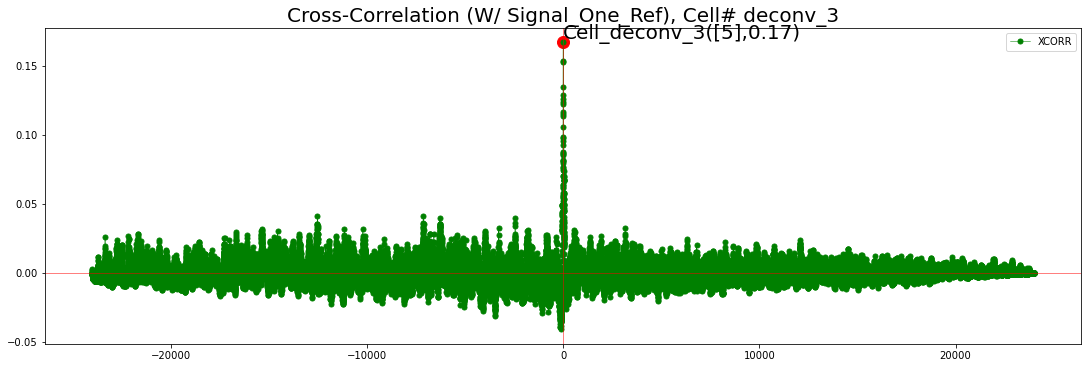

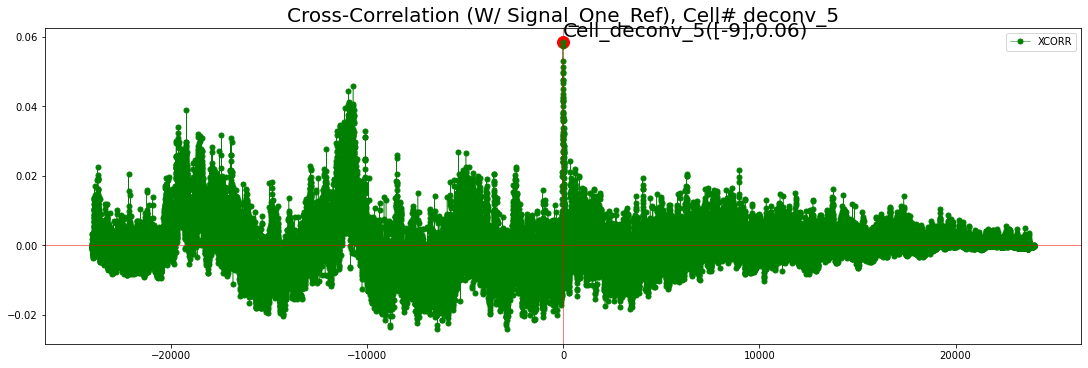

In [51]:
# Plot Cross correlation for all cells


#for i in range (NumofCell_deconv):
for i in range (2):
    
    #fig, ax = plt.subplots(1, 1, figsize=(15, 12), sharex=False, constrained_layout=True)
    fig, ax = plt.subplots(1,1, figsize=(15, 5), sharex=False, constrained_layout=True)
    #calculate cross correlation
    # Loop Cross Correlation for all the Cells

    
    Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[i]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]
    
#     Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[i]][0: 2400]     #. 3,4,14, 18
#     Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]

    backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
    forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
    ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
    xx = list(range((-1*len(backwards)+1), len(forwards)))
    
    ax.plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ro', markersize=12)  # add markers to highlight maximum point
    ax.plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=5, label=f'XCORR')
    temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
    temp_y = np.round(CrossCorrelateMatrics['Peak_Amplitude(r)'][i],2)
    ax.annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 20)
    
    ax.axhline(y=0, c='r', lw=0.5)
    ax.axvline(x=0, c='r', lw=0.5)
    ax.legend()
    ax.set_title('Cross-Correlation (W/ Signal_One_Ref), Cell# '+ CellList_deconv[i], size = 20)
    #ax.set_xlim(-10,20)
    



Text(0.5, 1.0, 'Z_Normalized_Correlation Coefficient (r) as a function of Lag Between Signals')

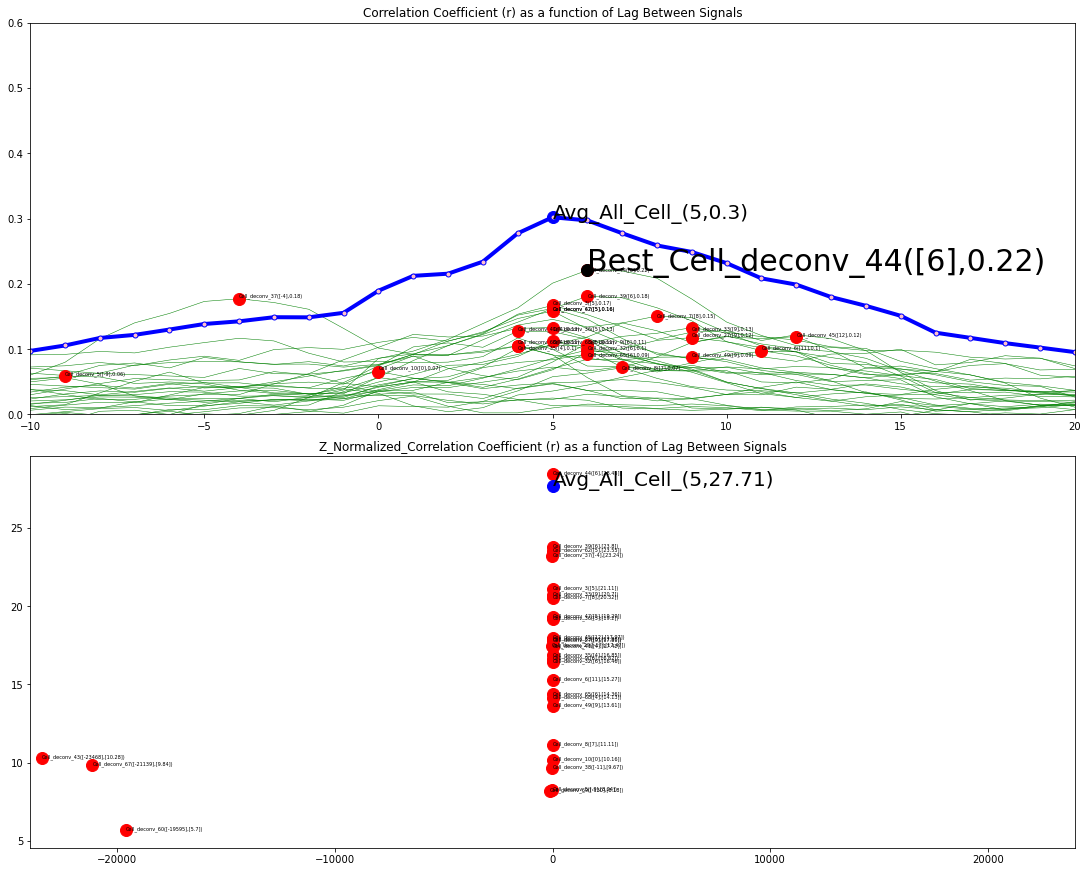

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12), sharex=False, constrained_layout=True)

# plot cross correlation traces

for i in range (NumofCell_deconv):
    
    
    
    Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[i]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]
    
#     Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[i]][0: 2400]     #. 3,4,14, 18
#     Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: 2400]

    backwards = sm.tsa.stattools.ccf(Signal_Two[::-1], Signal_One_Ref[::-1], adjusted=False, fft=False)[::-1]
    forwards = sm.tsa.stattools.ccf(Signal_Two, Signal_One_Ref,  adjusted=False, fft=False)
    ccf_output = np.r_[backwards[:-1], forwards]   #. -1 is to remove the repeated 0 for forward and backward analysis
    xx = list(range((-1*len(backwards)+1), len(forwards)))
    ax[0].plot(xx,ccf_output, c='g', lw=0.5, marker='o', markerfacecolor='green', markersize=0.005, label=f'XCORR')
    
    
# plot correlation coefficient(r) vs Lag (All Cells)
for i in range (NumofCell_deconv):
    ax[0].plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ro', markersize=12)  # add markers to highlight maximum point
    temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
    temp_y = np.round(CrossCorrelateMatrics['Peak_Amplitude(r)'][i],2)
    ax[0].annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 5)
    
    # Annotate cell with the largest correaltion coefficient
    if(CrossCorrelateMatrics['Peak_Amplitude(r)'][i] == np.max(CrossCorrelateMatrics['Peak_Amplitude(r)'])):
        ax[0].plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Peak_Amplitude(r)'][i], 'ko', markersize=12) 
        ax[0].annotate('Best_Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 30)

# plot correlation coefficient(r) vs Lag (Averaged of All Cells)
ax[0].plot(Avg_Cell_Peak_Latency, Avg_Cell_peak_amp, 'bo', markersize=12)  # add markers to highlight maximum point
ax[0].plot(Avg_Cell_xx,Avg_Cell_ccf_output, c='b', lw=4, marker='o', markerfacecolor='pink', markersize=5, label=f'XCORR')
Avg_Cell_temp_x = np.round(Avg_Cell_Peak_Latency,2)
Avg_Cell_temp_y = np.round(Avg_Cell_peak_amp,2)
ax[0].annotate('Avg_All_Cell_'+ '('+ str(Avg_Cell_temp_x)+',' +str(Avg_Cell_temp_y) + ')', (Avg_Cell_temp_x,Avg_Cell_temp_y), fontsize = 20)
        

ax[0].set_xlim(np.min(xx),np.max(xx))
ax[0].set_ylim(0,0.6)
ax[0].set_xlim(-10,20)
ax[0].set_title('Correlation Coefficient (r) as a function of Lag Between Signals')

# plot z-normalize correlation coefficient(r) vs Lag (All Cells)
for i in range (NumofCell_deconv):
    ax[1].plot(CrossCorrelateMatrics['Peak_Latency'][i], CrossCorrelateMatrics['Z_Normalized_Peak_Amplitude'][i], 'ro', markersize=12)  # add markers to highlight maximum point
    temp_x = np.round(CrossCorrelateMatrics['Peak_Latency'][i],2)
    temp_y = np.round(CrossCorrelateMatrics['Z_Normalized_Peak_Amplitude'][i],2)
    ax[1].annotate('Cell_'+ str(CrossCorrelateMatrics['Cell'][i])+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 5)

# plot z-normalize correlation coefficient(r) vs Lag (Averaged of All Cells)
ax[1].plot(Avg_Cell_Peak_Latency, Avg_Cell_zNormalized_Peak_amp, 'bo', markersize=12)  # add markers to highlight maximum point
temp_x = np.round(Avg_Cell_Peak_Latency,2)
temp_y = np.round(Avg_Cell_zNormalized_Peak_amp,2)
ax[1].annotate('Avg_All_Cell_'+ '('+ str(temp_x)+',' +str(temp_y) + ')', (temp_x,temp_y), fontsize = 20)

ax[1].set_xlim(np.min(xx),np.max(xx))
#ax[1].set_xlim(-10,20)
ax[1].set_title('Z_Normalized_Correlation Coefficient (r) as a function of Lag Between Signals')





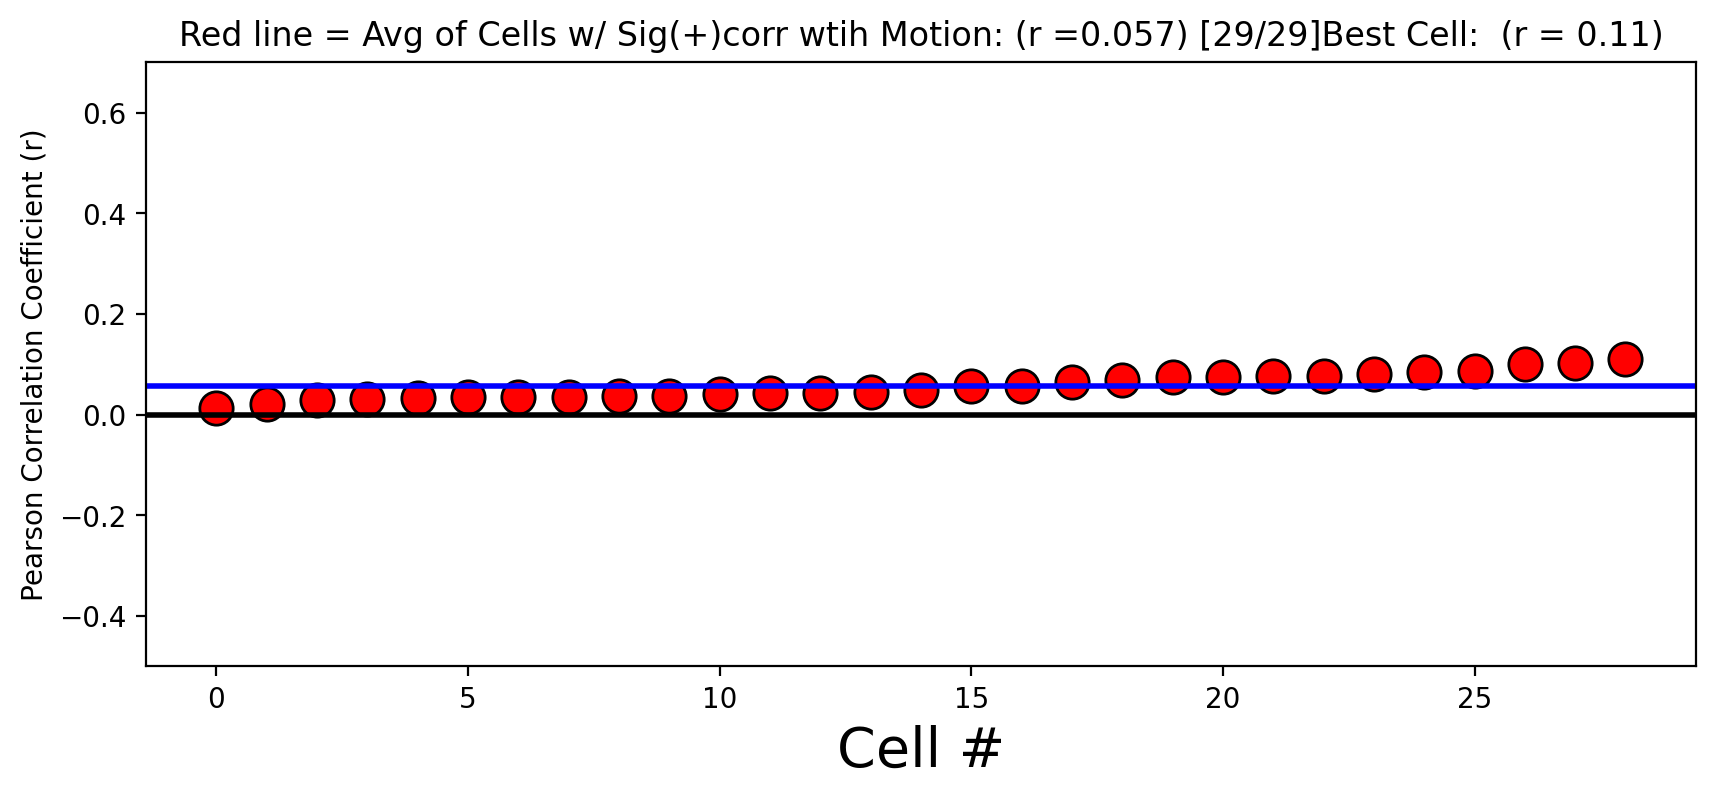

Motion Bin:  2
Cell Bin:  2


In [53]:
#####################################################################################################
#. Re-order cell list to asending orders of pearsons correlation coefficient (row 1) or p-value (row 2)

order_setting = 1   #. 1 for organizing by perason's correlation coefficient (r)

#######################
All_Correlation_sum = 0   # for calculating the average correlation of all cells regarldess significance 
Sig_Correlation_sum = 0   # for calculating the average correlation of only signfiicantly positive cells 

Sig_P_value_count = 0
Non_Sig_P_value_count = 0

Cell_Pearson_Correlation =  defaultdict(list)

for ii in range(NumofCell_deconv):
    
    Signal_One_Ref = Bin_Data_Binary_df[CellList_deconv[ii]][0: len(Bin_Data_Binary_df)]
    #Signal_One_Ref = Bin_Data_ReScaled_df[CellList_raw[ii]][0: len(Bin_Data_ReScaled_df)]     #. 3,4,14, 18
    Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]
    
    Pearson_r, p_value = scipy.stats.pearsonr(Signal_One_Ref, Signal_Two)
    

    Cell_Pearson_Correlation[CellList_raw[ii]].append(Pearson_r)
    Cell_Pearson_Correlation[CellList_raw[ii]].append(p_value)
    
    
    All_Correlation_sum= All_Correlation_sum + Pearson_r
    
    # only for significant and postively correlated (w/ behavior) cells.  
    if((p_value < 0.05)& (Pearson_r > 0)):
        Sig_P_value_count = Sig_P_value_count+1
        Sig_Correlation_sum= Sig_Correlation_sum + Pearson_r
    else:
        Non_Sig_P_value_count = Non_Sig_P_value_count+1



ReOrdered_Cell_Pearson_Correlation = dict(sorted(Cell_Pearson_Correlation.items(), key=lambda item: item[order_setting]))

CellList_ReOrdered = list(ReOrdered_Cell_Pearson_Correlation.keys())

Cell_Pearson_Correlation['Avg_Correlation_All'].append(All_Correlation_sum/NumofCell_raw) #average correlation of all cells regarldess significance 

if(Sig_P_value_count>0):
    Cell_Pearson_Correlation['Avg_Correlation_Sig'].append(Sig_Correlation_sum/Sig_P_value_count) #average correlation of only signfiicant cells 
else:
    Cell_Pearson_Correlation['Avg_Correlation_Sig'].append(0) #No significant cells, not correlated   
#######################################################################################
# Plotting 

fig = plt_raw.figure(figsize =(10, 4), dpi = 200.0)
x_values = list(range(0,NumofCell_deconv))


y_Correlation =[]
y_P_value =[]

for ii in range(NumofCell_deconv):

    y_Correlation.append(Cell_Pearson_Correlation[CellList_ReOrdered[ii]][0])  # Asending order
    y_P_value.append(Cell_Pearson_Correlation[CellList_ReOrdered[ii]][1])  # Asending order

for ii in range(NumofCell_deconv): 
    if(y_P_value[ii]<0.05):   #color code based on significance
        plt_raw.plot(x_values[ii], y_Correlation[ii], color = 'red', marker='o', markerfacecolor='red', markeredgecolor='black' , markersize=12)
    else:
        plt_raw.plot(x_values[ii], y_Correlation[ii], color = 'grey', marker='o', markerfacecolor='grey' ,markeredgecolor='black', markersize=12)
#plt_raw.axhline(y=Cell_Pearson_Correlation['Avg_Correlation_All'][0], c = 'pink', lw=2)
plt_raw.axhline(y=Cell_Pearson_Correlation['Avg_Correlation_Sig'][0], c = 'blue', lw=2)

plt_raw.axhline(y=0, c = 'black', lw=2)


#plt_raw.legend(loc ="upper left", fontsize = 15)
#plt_raw.subplots_adjust(bottom=0.1, right=2, top=2)
plt_raw.ylabel('Pearson Correlation Coefficient (r)', size = 10)
plt_raw.xlabel('Cell #', size = 20)
plt_raw.title('Red line = Avg of Cells w/ Sig(+)corr wtih Motion: (r =' + str(round(Cell_Pearson_Correlation['Avg_Correlation_Sig'][0], 3)) + ') '
              + '[' + str(Sig_P_value_count)  + '/'+ str(NumofCell_raw) +
              ']' +  'Best Cell:  (r = '+ str(round(y_Correlation[NumofCell_deconv -1],3 )) + ')')
#plt_raw.xlim(0,5)
plt_raw.ylim(-0.5,0.7)


#filename =  File_Name.split(".")[0] +'_'+ 'Correlation_By_Cell' + '.jpg'
#savefilename = os.path.join(Save_Path, filename)
#plt_raw.savefig(savefilename)
plt_raw.show()
#plt_perievent_traces.close()


# print(Cell_Pearson_Correlation['Avg_Correlation_All'][0] )
# print(Cell_Pearson_Correlation['Avg_Correlation_Sig'][0])
print('Motion Bin: ', Motion_Bin)
print('Cell Bin: ', Bin)


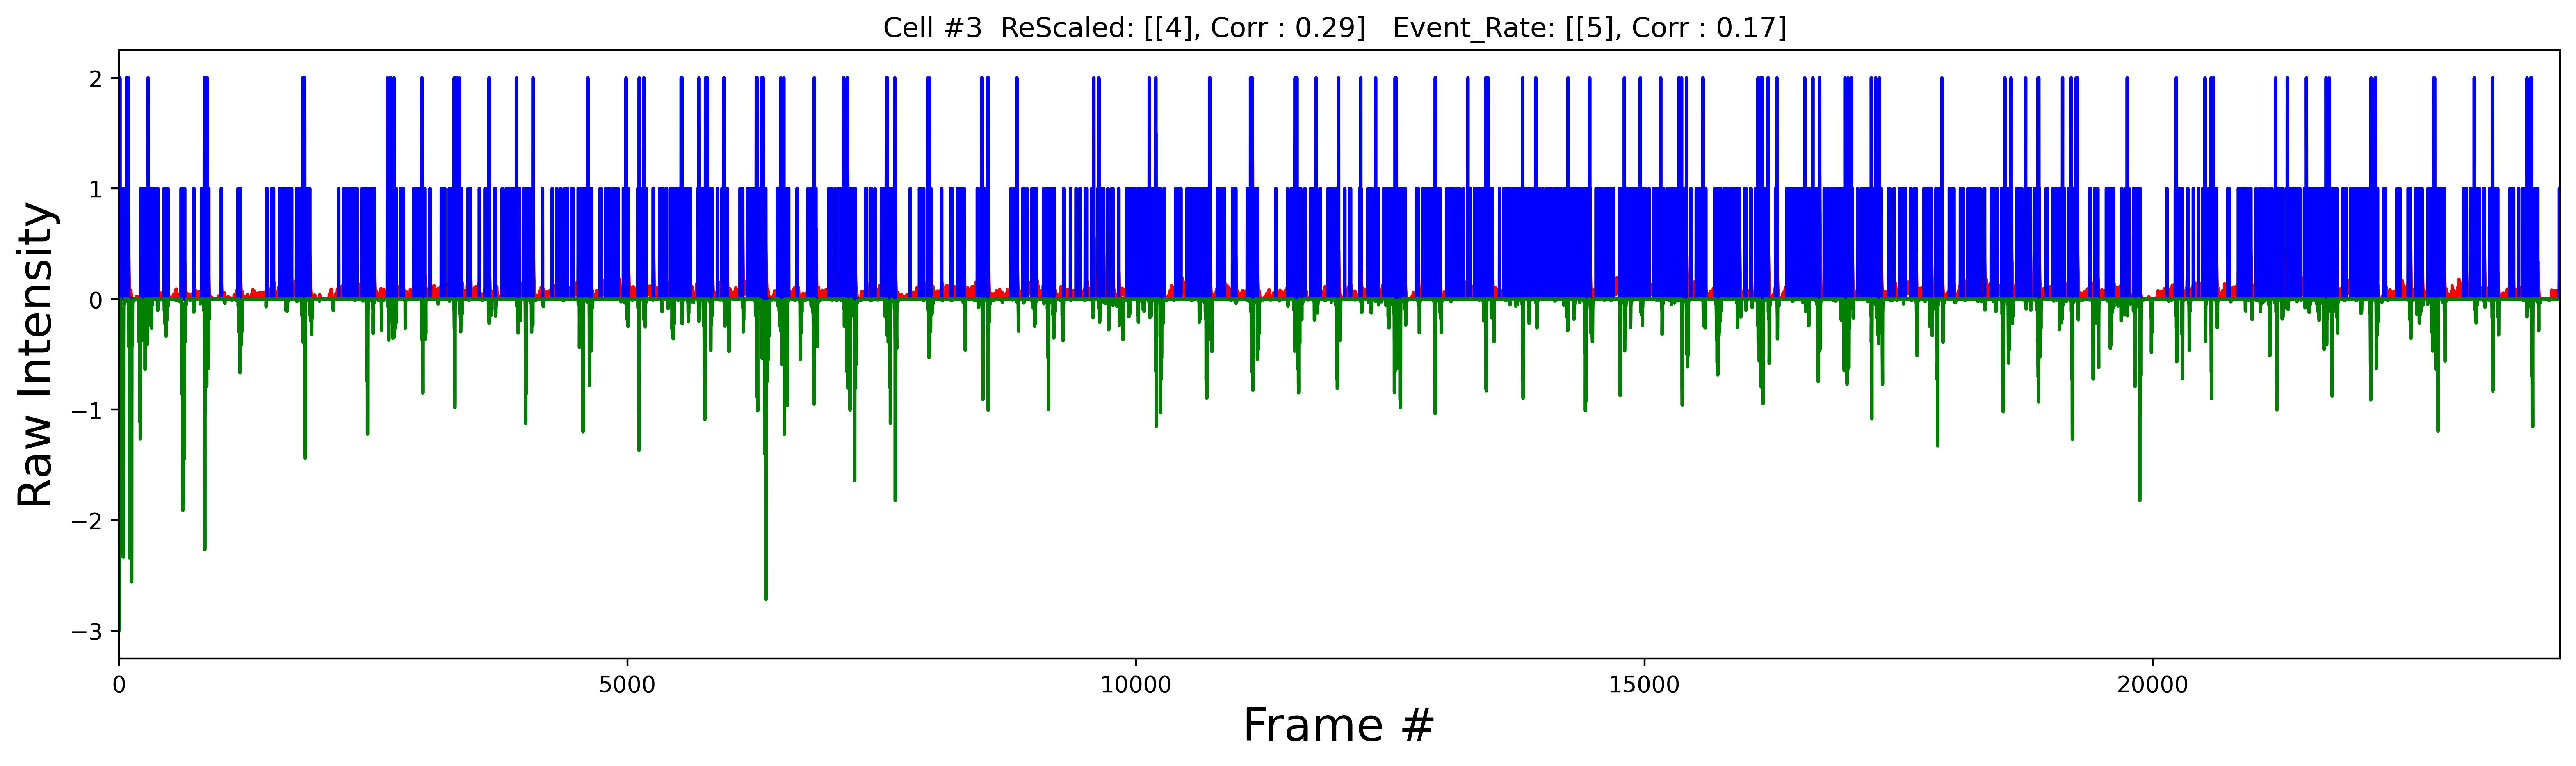

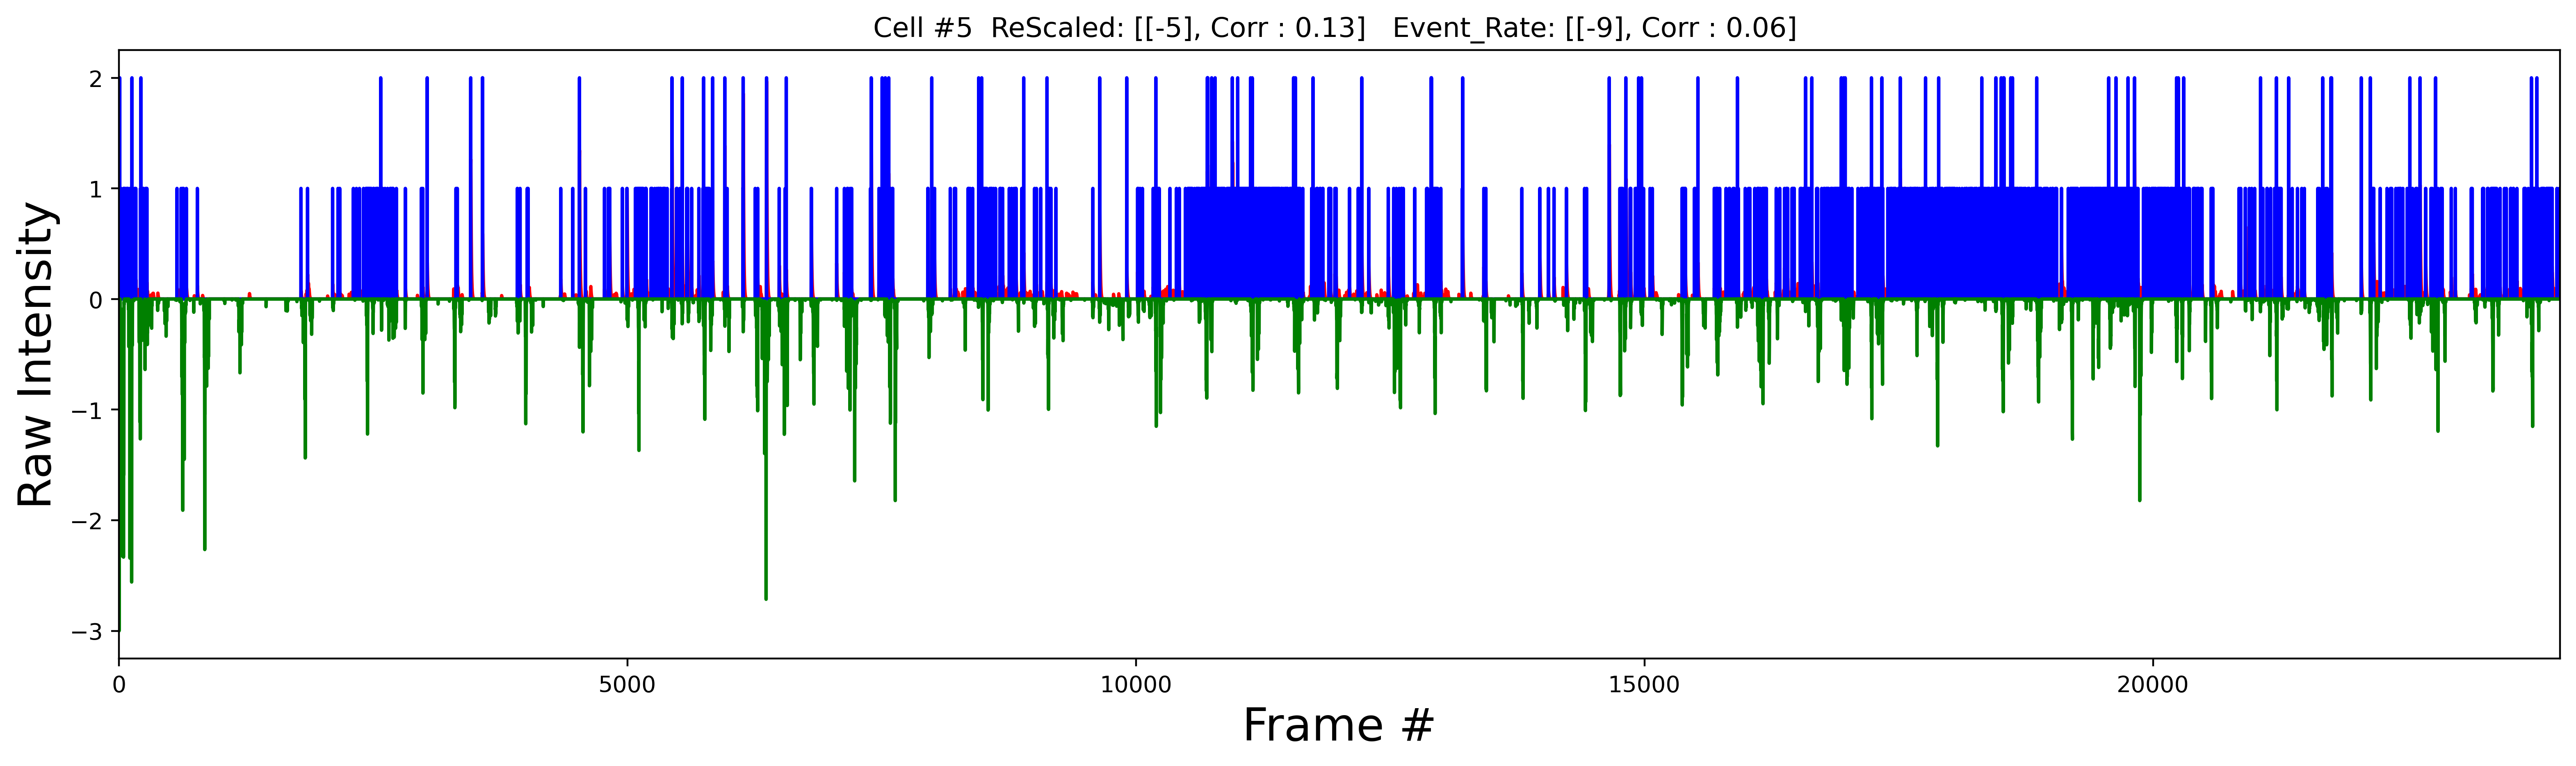

In [54]:
# CrossCorrelateMatrics_ReScaled['Peak_Latency'][i], CrossCorrelateMatrics_ReScaled['Peak_Amplitude(r)'][i]
# CrossCorrelateMatrics_Binary['Peak_Latency'][i], CrossCorrelateMatrics_Binary['Peak_Amplitude(r)'][i]

# Plot all cells against locomotion
#for i in range(NumofCell_raw):
for i in range(2):
    fig = plt_perievent_traces.figure(figsize =(19.2, 10.8), dpi = 400.0) 
    ax = fig.add_subplot(2,1 ,1)
    plt_perievent_traces.plot(Bin_Data_ReScaled_df[CellList_raw[i]][0: len(Bin_Data_ReScaled_df)] , color ='r')# binned from overhead camera
    plt_perievent_traces.plot(Bin_Data_Binary_df[CellList_deconv[i]][0: len(Bin_Data_ReScaled_df)], color ='b')  ## binned from imaging setup 
    plt_perievent_traces.plot(Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]*(-3)/(np.max(Bin_Motion_Data_df['Motion_Thresholded'])), color ='g')
    
    plt_perievent_traces.ylabel('Raw Intensity', size = 20)
    plt_perievent_traces.xlabel('Frame #', size = 20)
    plt_perievent_traces.xlim(0,len(Bin_Data_ReScaled_df))
    plt_perievent_traces.title(('Cell #' + CellList_raw[i]) +
                               '  ReScaled: [' + str(CrossCorrelateMatrics_ReScaled['Peak_Latency'][i])+ ', Corr : ' + str(round(CrossCorrelateMatrics_ReScaled['Peak_Amplitude(r)'][i],2))+'] '+
                               '  Event_Rate: [' + str(CrossCorrelateMatrics_Binary['Peak_Latency'][i])+ ', Corr : ' + str(round(CrossCorrelateMatrics_Binary['Peak_Amplitude(r)'][i],2))+'] '
                               ,fontdict=None, loc='center')
    plt_perievent_traces.show()
    



In [55]:
# CrossCorrelateMatrics

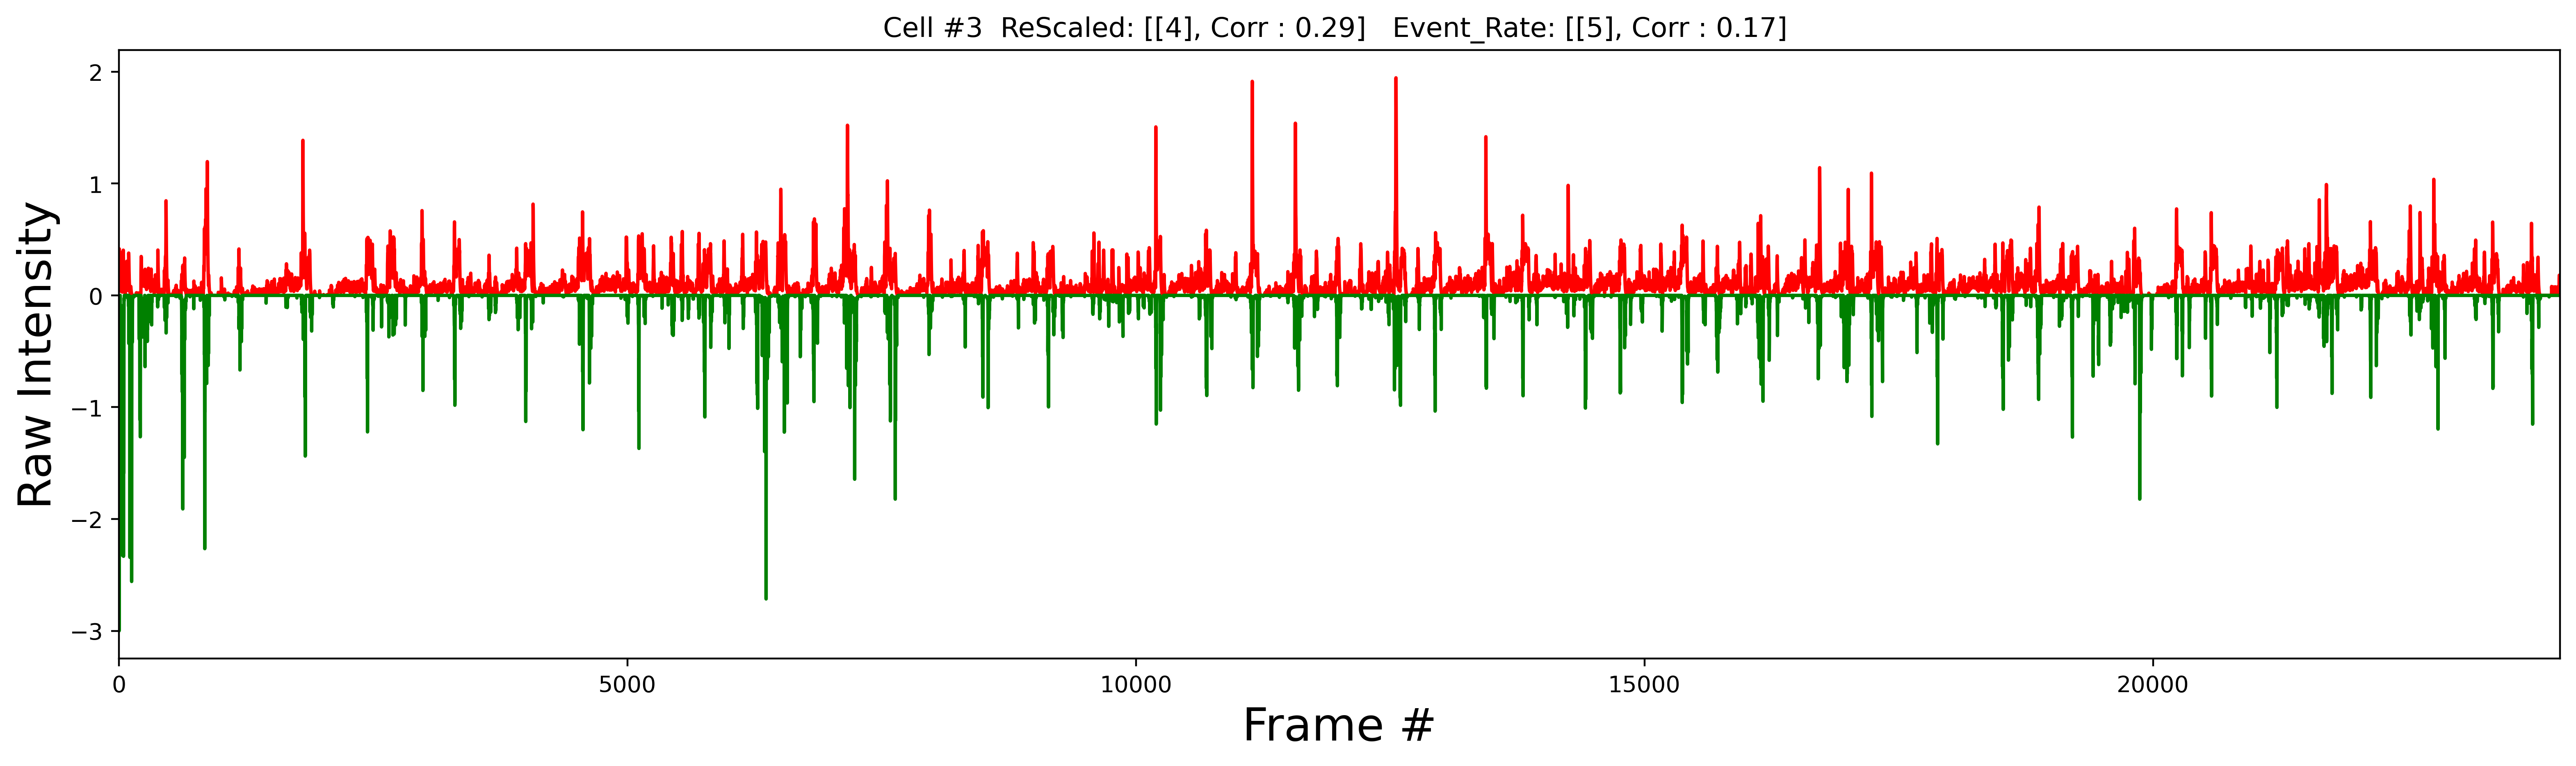

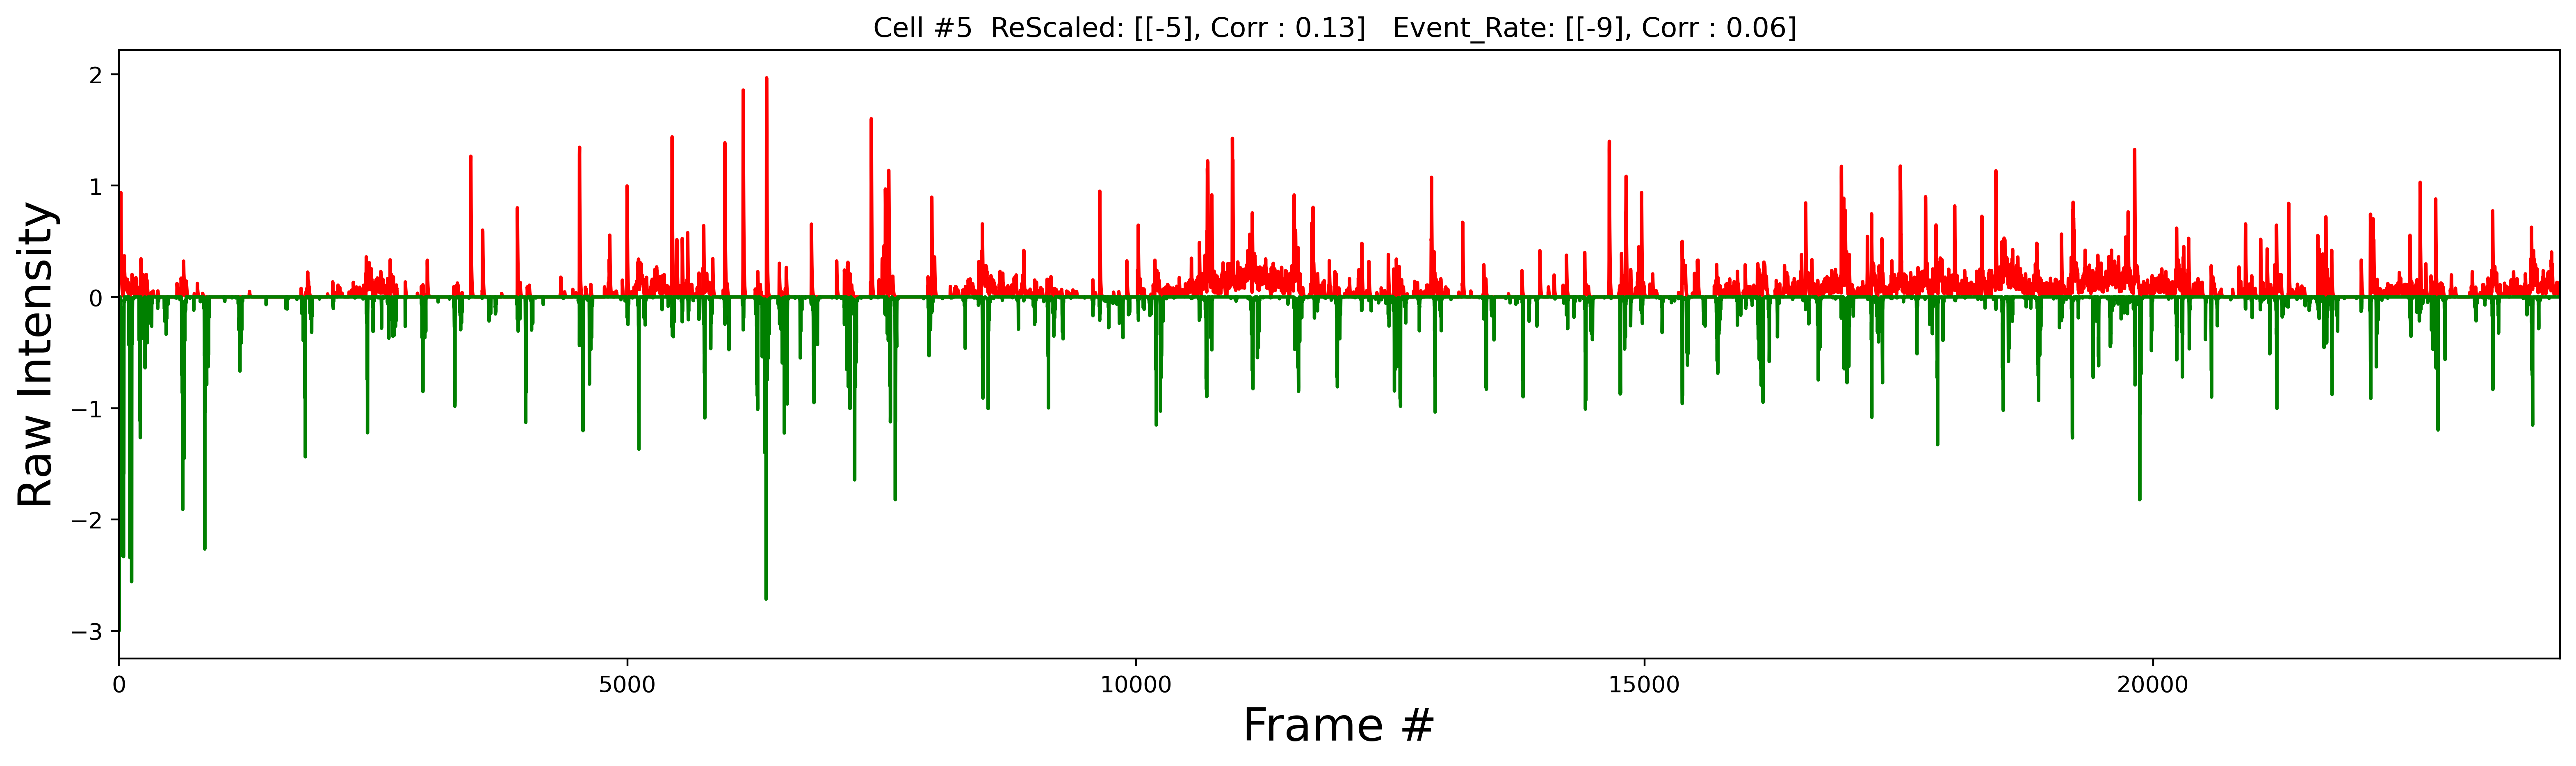

In [56]:
# CrossCorrelateMatrics_ReScaled['Peak_Latency'][i], CrossCorrelateMatrics_ReScaled['Peak_Amplitude(r)'][i]
# CrossCorrelateMatrics_Binary['Peak_Latency'][i], CrossCorrelateMatrics_Binary['Peak_Amplitude(r)'][i]

# Plot all cells against locomotion
#for i in range(NumofCell_raw):
for i in range(2):
    fig = plt_perievent_traces.figure(figsize =(19.2, 10.8), dpi = 400.0) 
    ax = fig.add_subplot(2,1 ,1)
    plt_perievent_traces.plot(Bin_Data_ReScaled_df[CellList_raw[i]][0: len(Bin_Data_ReScaled_df)] , color ='r')# binned from overhead camera
    #plt_perievent_traces.plot(Bin_Data_Binary_df[CellList_deconv[i]][0: len(Bin_Data_ReScaled_df)], color ='b')  ## binned from imaging setup 
    plt_perievent_traces.plot(Bin_Motion_Data_df['Motion_Thresholded'][0: len(Bin_Data_ReScaled_df)]*(-3)/(np.max(Bin_Motion_Data_df['Motion_Thresholded'])), color ='g')
    
    plt_perievent_traces.ylabel('Raw Intensity', size = 20)
    plt_perievent_traces.xlabel('Frame #', size = 20)
    plt_perievent_traces.xlim(0,len(Bin_Data_ReScaled_df))
    plt_perievent_traces.title(('Cell #' + CellList_raw[i]) +
                               '  ReScaled: [' + str(CrossCorrelateMatrics_ReScaled['Peak_Latency'][i])+ ', Corr : ' + str(round(CrossCorrelateMatrics_ReScaled['Peak_Amplitude(r)'][i],2))+'] '+
                               '  Event_Rate: [' + str(CrossCorrelateMatrics_Binary['Peak_Latency'][i])+ ', Corr : ' + str(round(CrossCorrelateMatrics_Binary['Peak_Amplitude(r)'][i],2))+'] '
                               ,fontdict=None, loc='center')
    plt_perievent_traces.show()
    



In [57]:
#https://www.statology.org/granger-causality-test-in-python/

#define URL where dataset is located
url = "https://raw.githubusercontent.com/Statology/Miscellaneous/main/chicken_egg.txt"
#read in dataset as pandas DataFrame
df = pd.read_csv(url, sep="  ")
df.head()




/Users/kang/opt/anaconda3/envs/Ca_Imaging/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


year  chicken   egg
0  1930   468491  3581
1  1931   449743  3532
2  1932   436815  3327
3  1933   444523  3255
4  1934   433937  3156

In [58]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(df[['chicken', 'egg']], maxlag=[3])


print("The F test statistic turns out to be 5.405 and the corresponding p-value is 0.0030.")


Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=18.7946 , p=0.0003  , df=3
likelihood ratio test: chi2=16.0003 , p=0.0011  , df=3
parameter F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3
The F test statistic turns out to be 5.405 and the corresponding p-value is 0.0030.


In [59]:
Signal_One_Ref = Mean_Bin_Data_df[1500: 2000]
Signal_Two = Bin_Motion_Data_df['Motion_Thresholded'][1500: 2000]


#https://online.stat.psu.edu/stat510/lesson/8/8.2
#https://www.statology.org/granger-causality-test-in-python/
#https://rishi-a.github.io/2020/05/25/granger-causality.html
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.grangercausalitytests.html
